<h1>Forest Cover Type Prediction</h1>

In [184]:
!pip install vaderSentiment
!pip install textblob
!pip install scikit-plot
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import sys
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

<h2>Data Collection</h2>

In [185]:
forest_data=pd.read_csv("case.csv")

In [186]:
forest_data

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          1       2596      51      3                               258   
1          2       2590      56      2                               212   
2          3       2804     139      9                               268   
3          4       2785     155     18                               242   
4          5       2595      45      2                               153   
...      ...        ...     ...    ...                               ...   
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   0                              510   
1                                  -6                              390   
2                                  65                             3180   
3                                 118                             3090   
4                                  -1                              391   
...                               ...                              ...   
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0                221             232            148  ...            0   
1                220             235            151  ...            0   
2                234             238            135  ...            0   
3                238             238            122  ...            0   
4                220             234            150  ...            0   
...              ...             ...            ...  ...          ...   
15115            170             251            214  ...            0   
15116            249             221             91  ...            0   
15117            250             220             83  ...            0   
15118            229             237            119  ...            0   
15119            189             244            164  ...            0   

       Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0                0            0            0            0            0   
1                0            0            0            0            0   
2                0            0            0            0            0   
3                0            0            0            0            0   
4                0            0            0            0            0   
...            ...          ...          ...          ...          ...   
15115            0            0            0            0            0   
15116            0            0            0            0            0   
15117            0            0            0            0            0   
15118            0            0            0            0            0   
15119            0            0            0            0            0   

       Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0                0            0            0           5  
1                0            0            0           5  
2                0            0            0           2  
3                0            0            0           2  
4                0            0            0           5  
...            ...          ...          ...         ...  
15115            0           

<h1>Analysing the collected data</h1>

In [187]:
forest_data.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [188]:
forest_data.index

RangeIndex(start=0, stop=15120, step=1)

In [189]:
rows,columns=forest_data.shape

In [190]:
print("We can observe that the forest cover type dataset has ",rows," no: of observations and ",columns-1," no: of features to predict this dataset")

We can observe that the forest cover type dataset has  15120  no: of observations and  55  no: of features to predict this dataset


In [191]:
forest_data.describe()

Id     Elevation        Aspect         Slope  \
count  15120.00000  15120.000000  15120.000000  15120.000000   
mean    7560.50000   2749.322553    156.676653     16.501587   
std     4364.91237    417.678187    110.085801      8.453927   
min        1.00000   1863.000000      0.000000      0.000000   
25%     3780.75000   2376.000000     65.000000     10.000000   
50%     7560.50000   2752.000000    126.000000     15.000000   
75%    11340.25000   3104.000000    261.000000     22.000000   
max    15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  ...   Soil_Type32   Soil_Type33   Soil_Type34  \
count   15120.000000  ...  15120.000000  15120.000000  15120.000000   
mean      135.091997  ...      0.045635      0.040741      0.001455   
std        45.895189  ...      0.208699      0.197696      0.038118   
min         0.000000  ...      0.000000      0.000000      0.000000   
25%       106.000000  ...      0.000000      0.000000      0.000000   
50%       138.000000  ...      0.000000      0.000000      0.000000   
75%       167.000000  ...      0.000000      0.000000      0.000000   
max       248.000000  ...      1.000000      1.000000      1.000000   

        Soil_Type35   Soil_Type36   Soil_Type37   Soil_Type38   Soil_Type39  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.006746      0.000661      0.002249      0.048148      0.043452   
std        0.081859      0.025710      0.047368      0.214086      0.203880   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        Soil_Type40    Cover_Type  
count  15120.000000  15120.000000  
mean       0.030357      4.000000  
std        0.171574      2.000066  
min        0.000000      1.000000  
25%        0.000000      2.000000  
50%        0.000000      4.000000  
75%        0.000000      6.000000  
max        1.000000      7.000000  

[8 rows x 56 columns]

In [192]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

<h2>Data Explanation</h2>

The forest cover prediction dataset has 54 features and 1 target variable which is called 'Cover type'. Out for the 54, 10 are numerical and 44 are categorical(40-Soil Types + 4 Wilderess Areas)

| Feature Name | Names |
| ------------ | ----- |
| Wilderness_Area1 | Rawah Wilderness Area |
| Wilderness_Area2 | Neota Wilderness Area |
| Wilderness_Area3 | Comanche Wilderness Area |
| Wilderness_Area4 | Cache La Poudre Wilderness Area |
| Soil_Type1 | Cathedral family - Rock outcrop complex, extremely stony |
| Soil_Type2 | Vanet - Ratake families complex, very stony |
| Soil_Type3 | Haploborolis - Rock outcrop complex, rubbly |
| Soil_Type4 | Ratake family - Rock outcrop complex, rubbly |
| Soil_Type5 | Vanet family - Rock outcrop complex, rubbly |
| Soil_Type6 | Vanet - Wetmore families - Rock outcrop complex, stony |
| Soil_Type7 | Gothic family |
| Soil_Type8 | Supervisor - Limber families complex |
| Soil_Type9 | Troutville family, very stony |
| Soil_Type10 | Bullwark - Catamount families - Rock outcrop complex, rubbly |
| Soil_Type11 | Bullwark - Catamount families - Rock land complex, rubbly |
| Soil_Type12 | Legault family - Rock land complex, stony |
| Soil_Type13 | Catamount family - Rock land - Bullwark family complex, rubbly |
| Soil_Type14 | Pachic Argiborolis - Aquolis complex |
| Soil_Type15 | _unspecified in the USFS Soil and ELU Survey_ |
| Soil_Type16 | Cryaquolis - Cryoborolis complex |
| Soil_Type17 | Gateview family - Cryaquolis complex |
| Soil_Type18 | Rogert family, very stony |
| Soil_Type19 | Typic Cryaquolis - Borohemists complex |
| Soil_Type20 | Typic Cryaquepts - Typic Cryaquolls complex |
| Soil_Type21 | Typic Cryaquolls - Leighcan family, till substratum complex |
| Soil_Type22 | Leighcan family, till substratum, extremely bouldery |
| Soil_Type23 | Leighcan family, till substratum, - Typic Cryaquolls complex. |
| Soil_Type24 | Leighcan family, extremely stony |
| Soil_Type25 | Leighcan family, warm, extremely stony |
| Soil_Type26 | Granile - Catamount families complex, very stony |
| Soil_Type27 | Leighcan family, warm - Rock outcrop complex, extremely stony |
| Soil_Type28 | Leighcan family - Rock outcrop complex, extremely stony |
| Soil_Type29 | Como - Legault families complex, extremely stony |
| Soil_Type30 | Como family - Rock land - Legault family complex, extremely stony |
| Soil_Type31 | Leighcan - Catamount families complex, extremely stony |
| Soil_Type32 | Catamount family - Rock outcrop - Leighcan family complex, extremely stony |
| Soil_Type33 | Leighcan - Catamount families - Rock outcrop complex, extremely stony |
| Soil_Type34 | Cryorthents - Rock land complex, extremely stony |
| Soil_Type35 | Cryumbrepts - Rock outcrop - Cryaquepts complex |
| Soil_Type36 | Bross family - Rock land - Cryumbrepts complex, extremely stony |
| Soil_Type37 | Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony |
| Soil_Type38 | Leighcan - Moran families - Cryaquolls complex, extremely stony |
| Soil_Type39 | Moran family - Cryorthents - Leighcan family complex, extremely stony |
| Soil_Type40 | Moran family - Cryorthents - Rock land complex, extremely stony |


Types of forest covers

| Key | Name |
| --- | ---- |
| 1 | Spruce / Fir |
| 2 | Lodgepole Pine |
| 3 | Ponderosa Pine |
| 4 | Cottonwood / Willow |
| 5 | Aspen |
| 6 | Douglas-fir |
| 7 | Krummholz |

<h3>Splitting data as numerical and categorical</h3>

In [193]:
numerical= forest_data[['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points','Cover_Type']]
categorical=forest_data[['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
       'Cover_Type']]

<h2>Data Visualisation</h2>

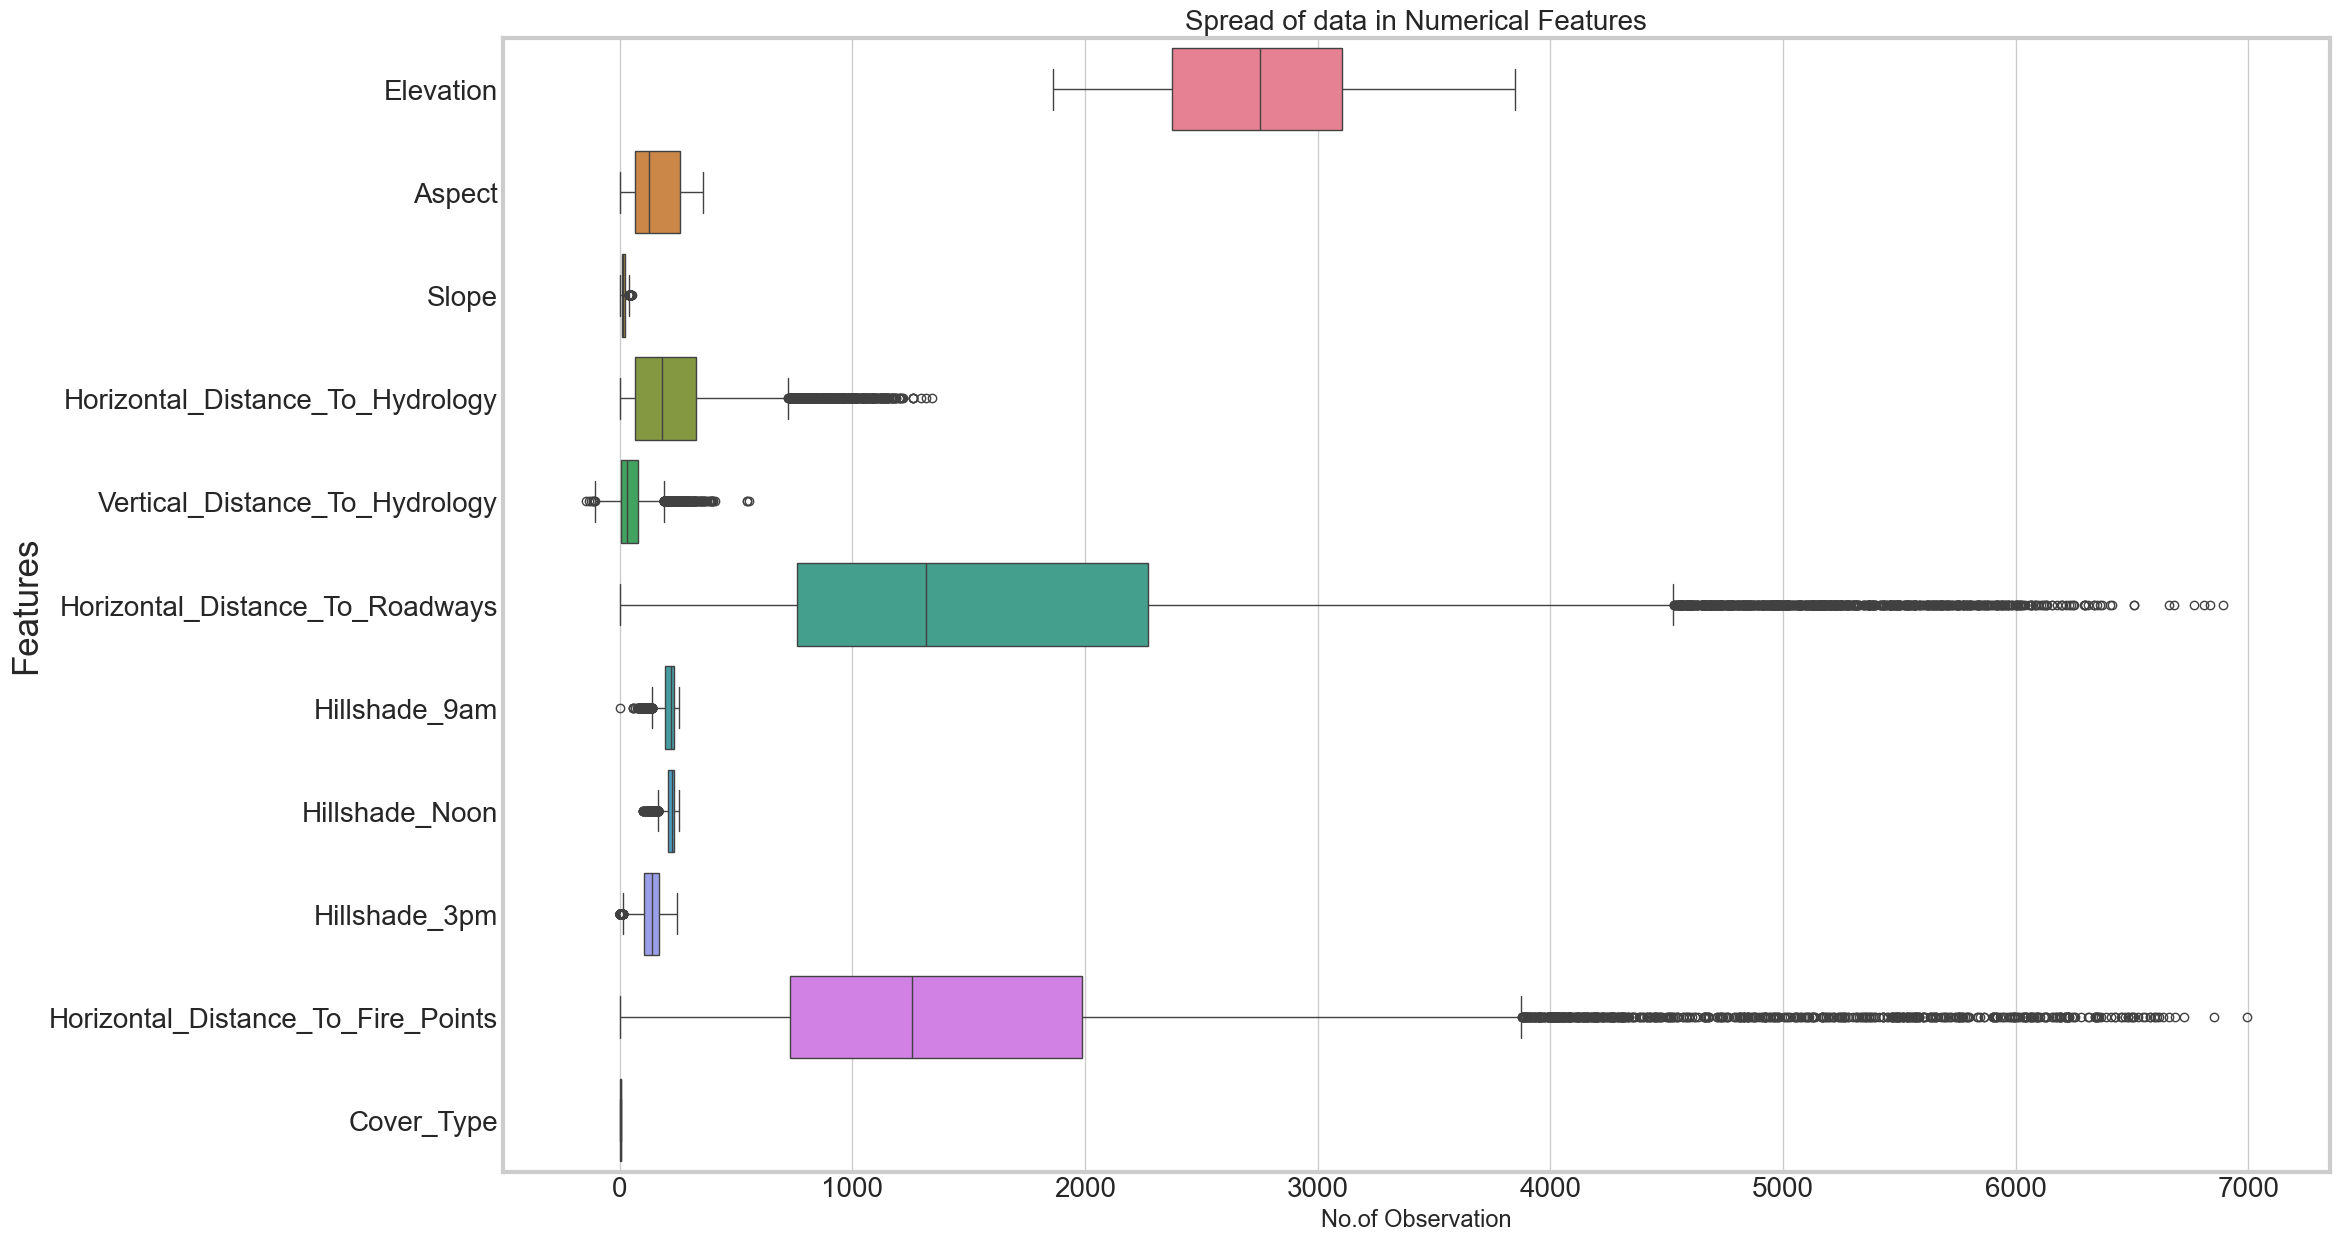

In [194]:

sns.set_style("whitegrid")

plt.subplots(figsize=(21, 14))

sns.boxplot(numerical, orient='h')

plt.title('Spread of data in Numerical Features', size = 20)

plt.xlabel('No.of Observation', size = 17)

plt.ylabel('Features', size = 25)

plt.xticks(size = 20)

plt.yticks(size = 20)

plt.show()

<h2>Visulaization numerical features using box plot</h2>

<h2> Visualization for categorical data</h2>
<h3> Visualization for Wilderness area</h3>

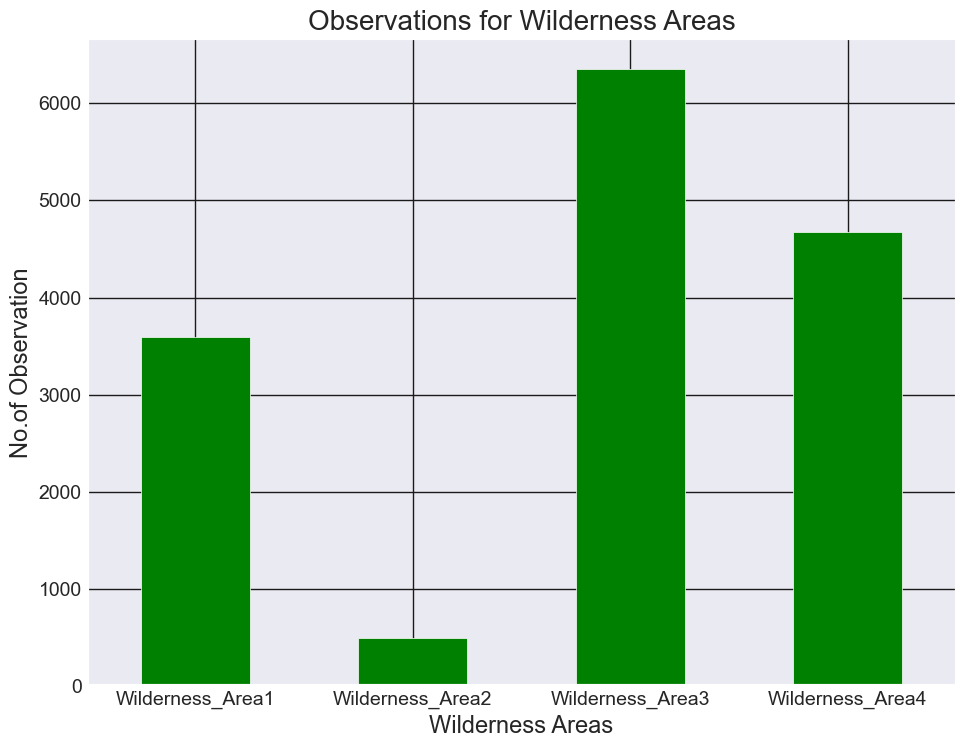

In [195]:
Wilderness_data, Soil_data = categorical.iloc[:,:4], categorical.iloc[:,4:]
sns.set_style("darkgrid", {'grid.color': '.1'})
Wilderness_data.sum().plot(kind='bar', figsize=(10, 8), color='green')
plt.title('Observations for Wilderness Areas', size = 20)
plt.xlabel('Wilderness Areas', size = 17)
plt.ylabel('No.of Observation', size = 17)
plt.xticks(rotation = 'horizontal', size = 14)
plt.yticks(size = 14)
plt.show()

<h3>Visualization for soil types</h3>

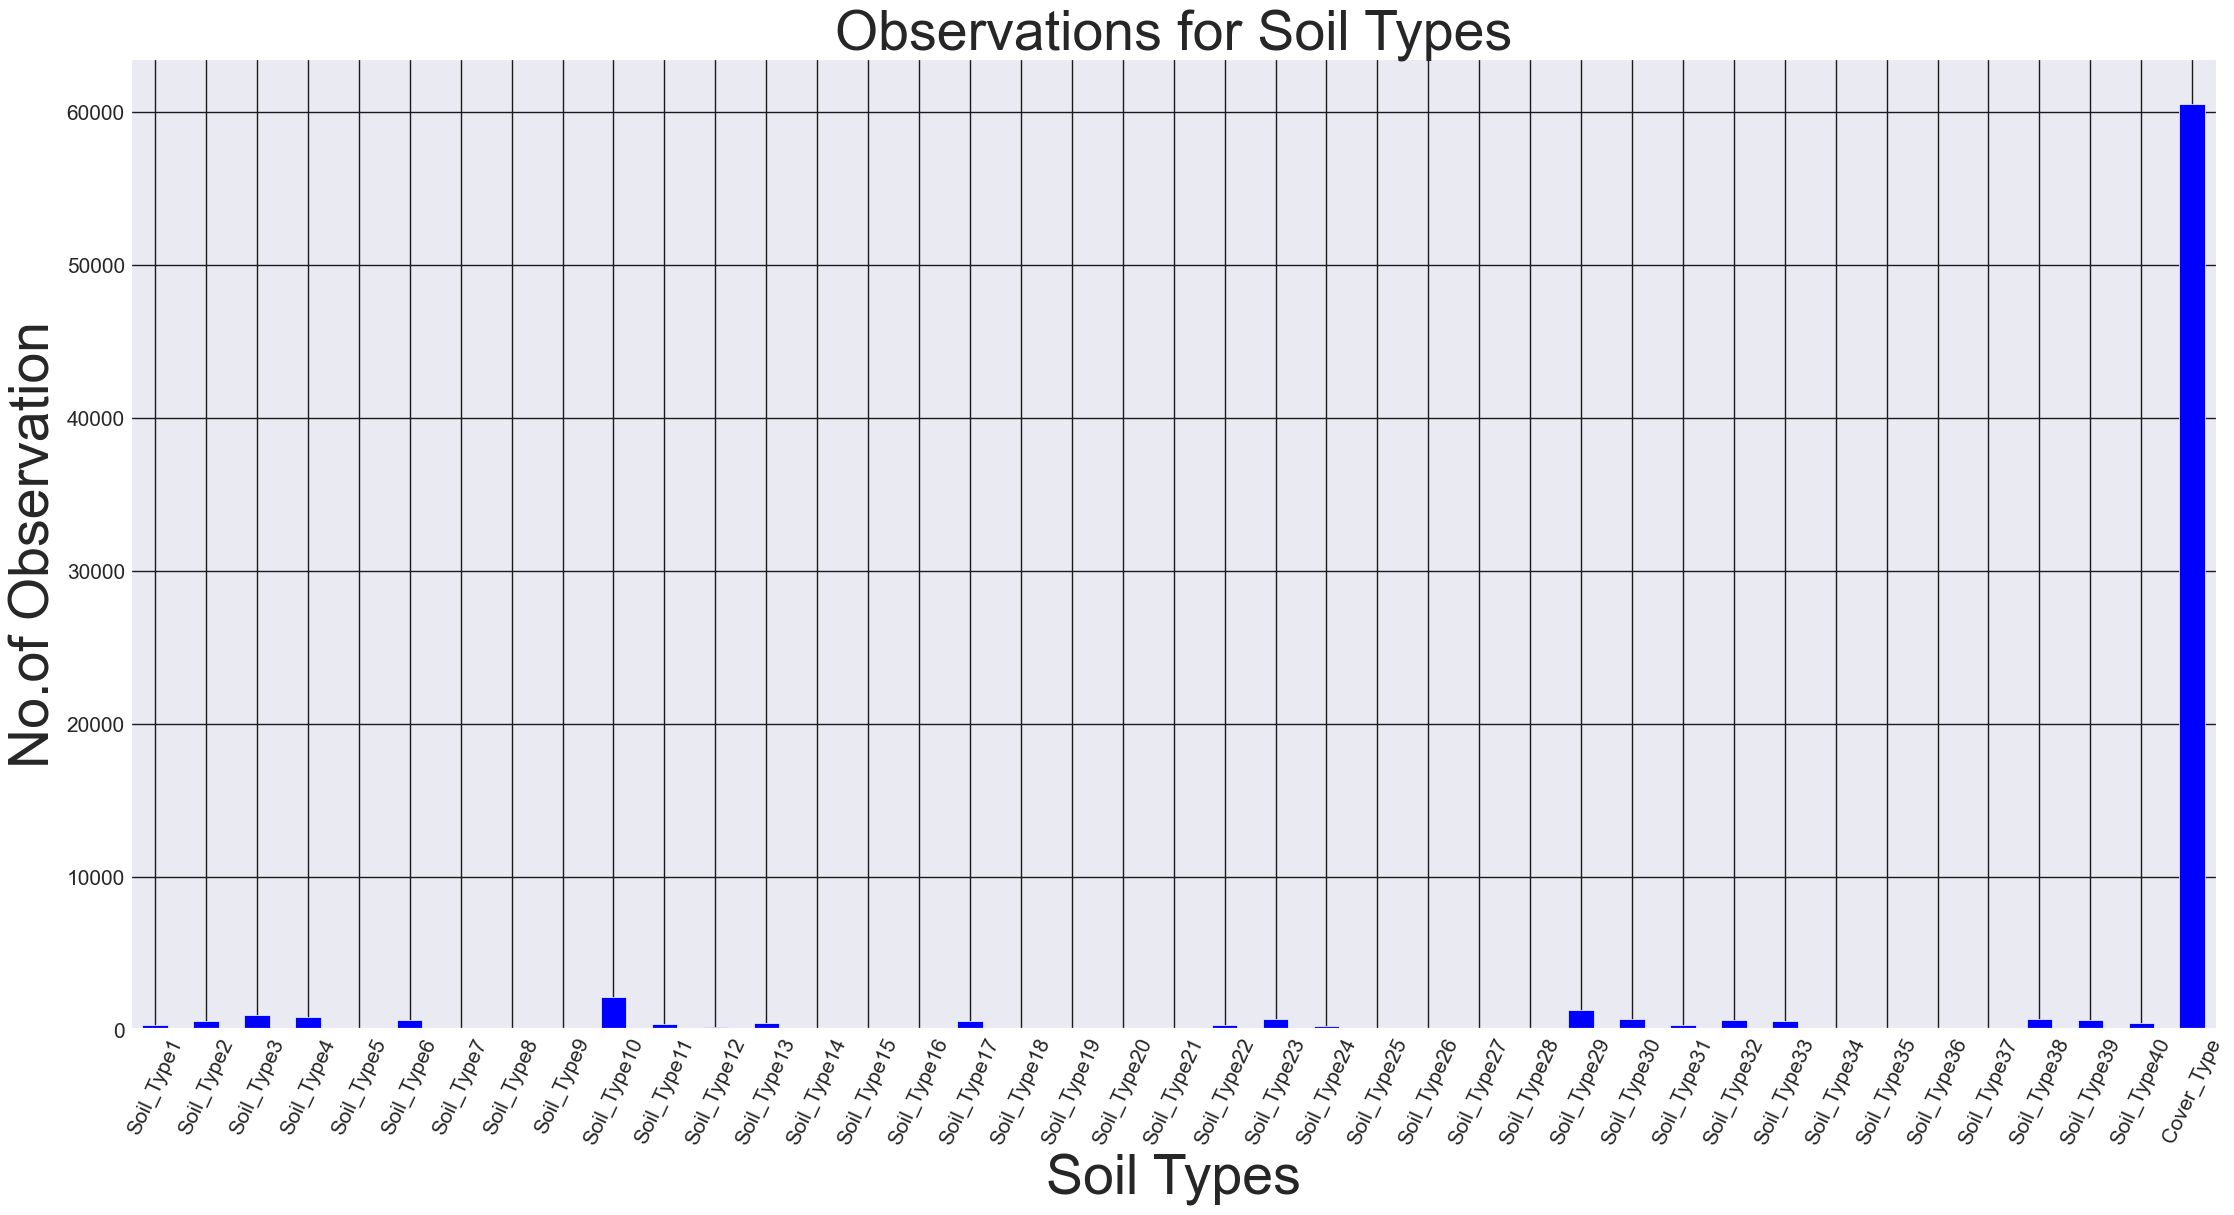

In [196]:

Soil_data.sum().plot(kind='bar', figsize=(24, 12), color='blue')
plt.title('Observations for Soil Types', size = 40)
plt.xlabel('Soil Types', size = 40)
plt.ylabel('No.of Observation', size = 40)
plt.xticks(rotation = 65, size = 15)
plt.yticks(size = 15)


plt.show()

<h2>Box Plots with respect to the target variable</h2>

<h3>Numerical data</h3> 

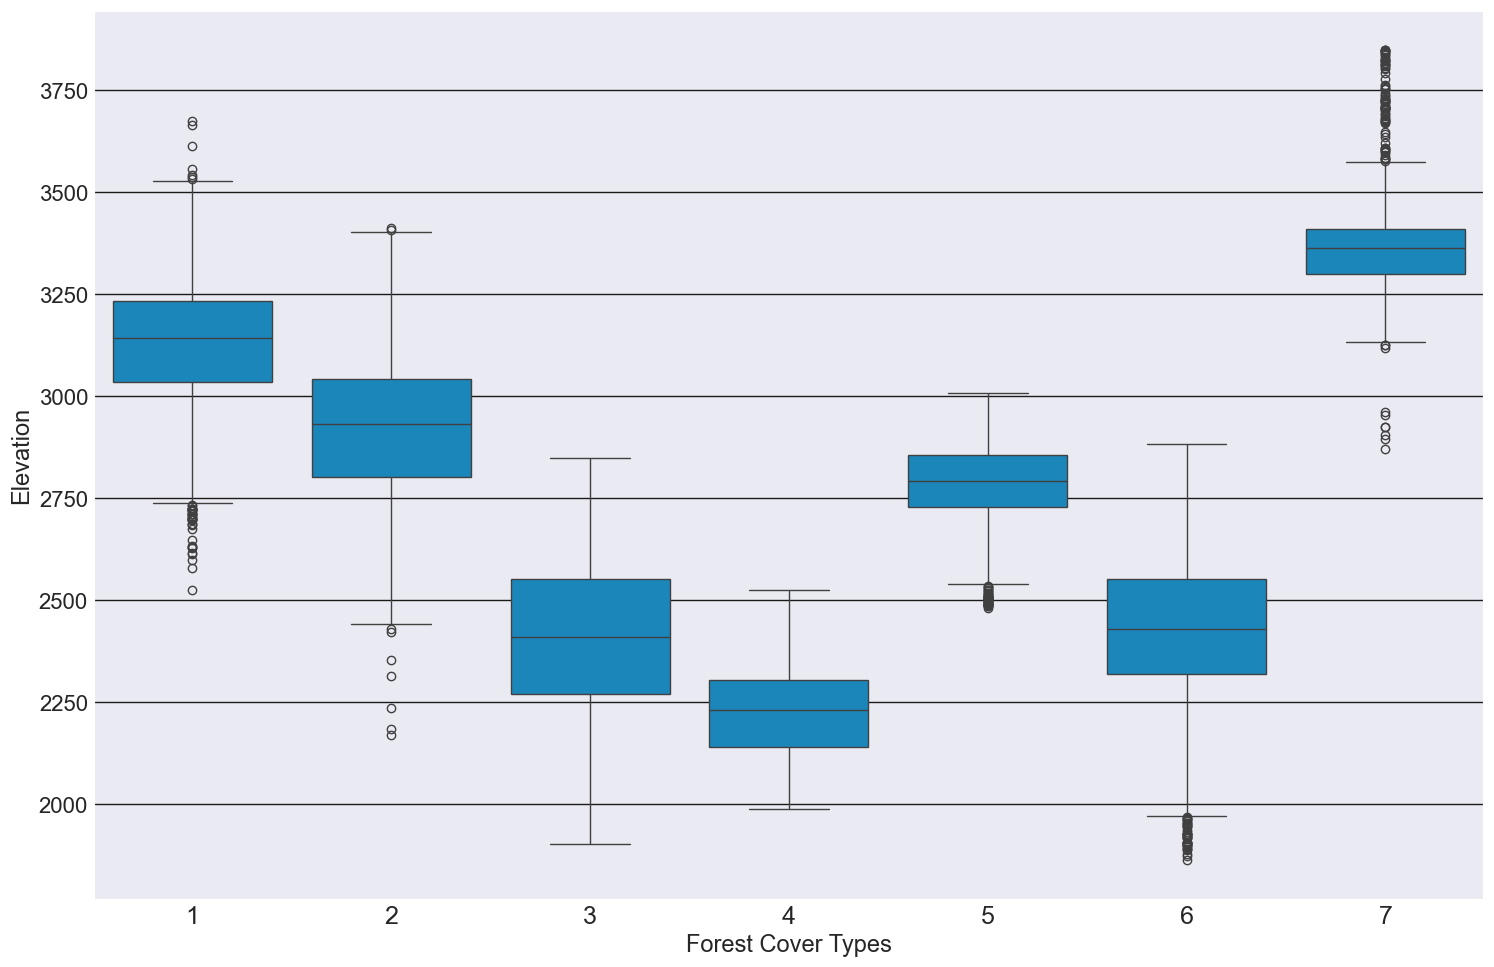

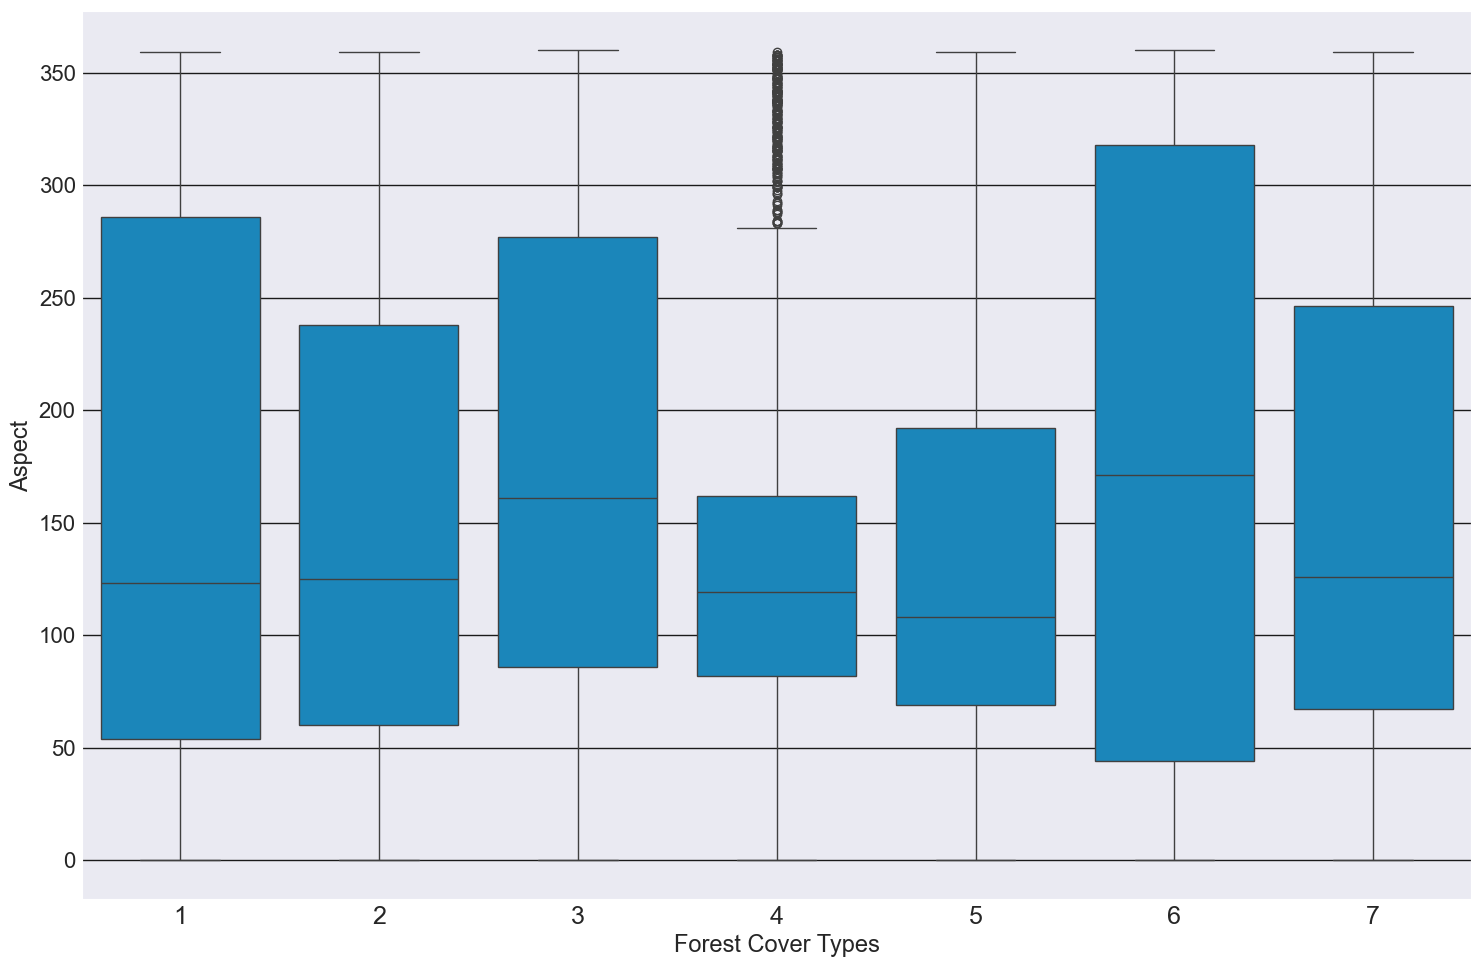

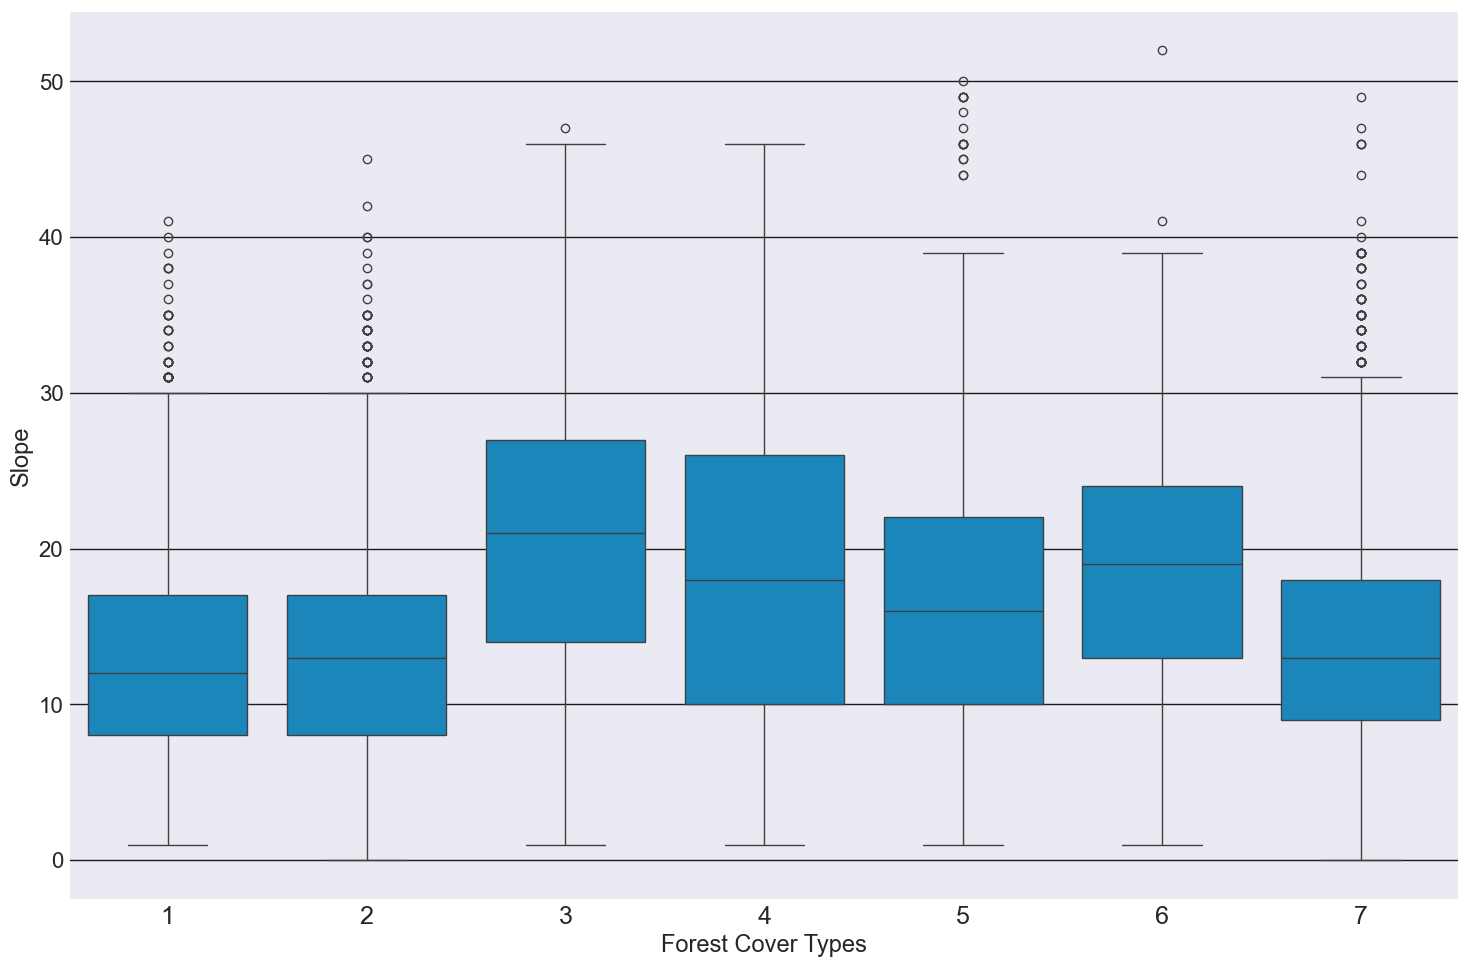

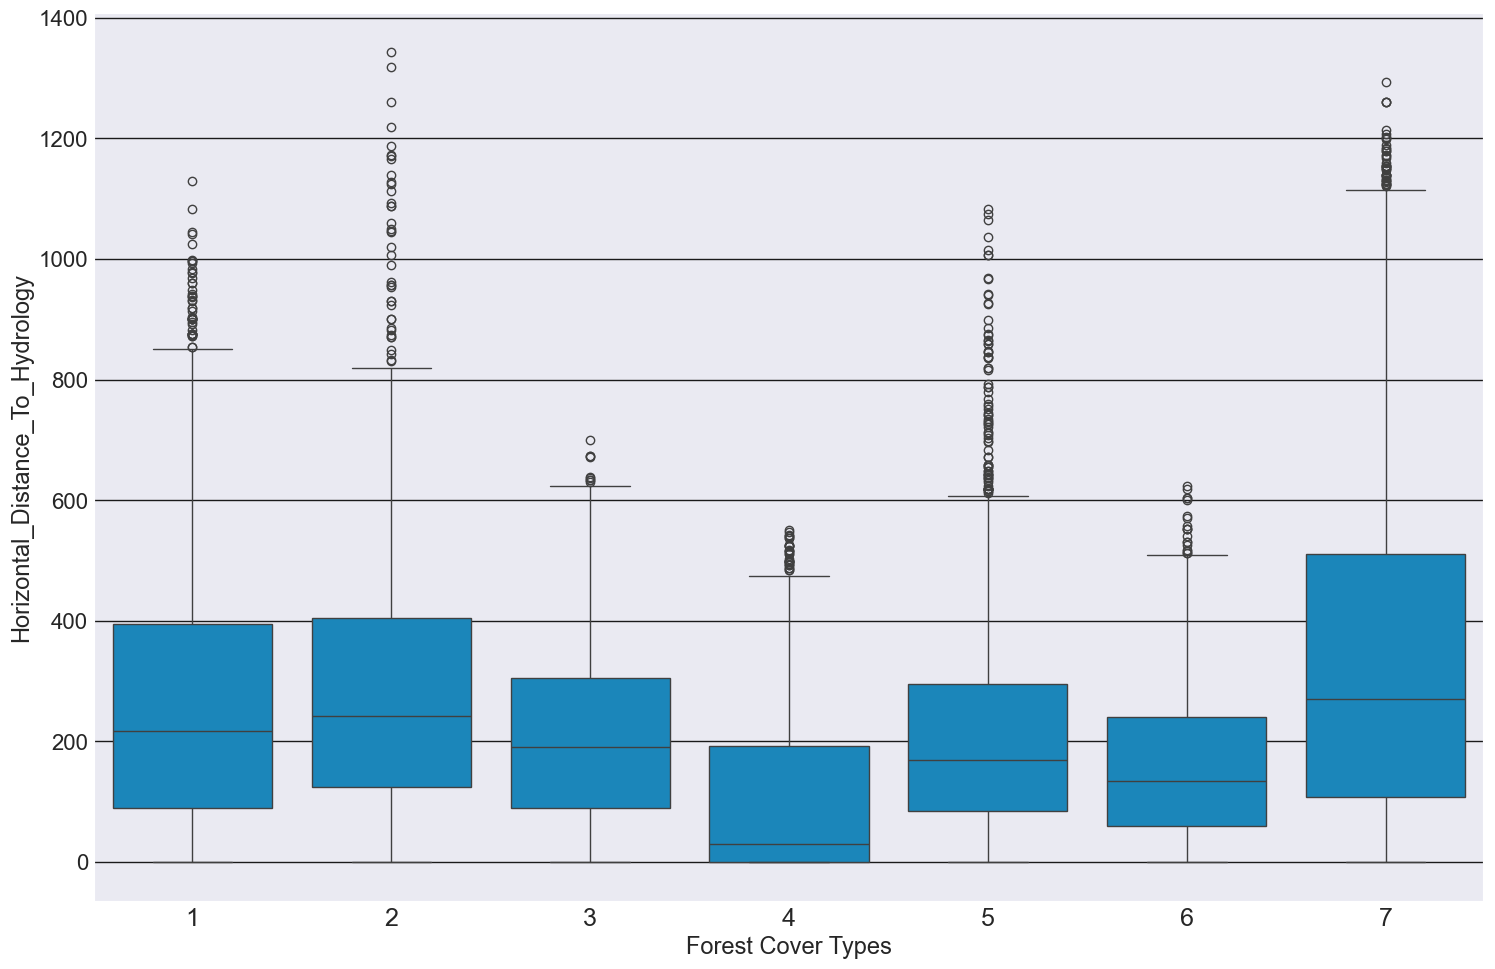

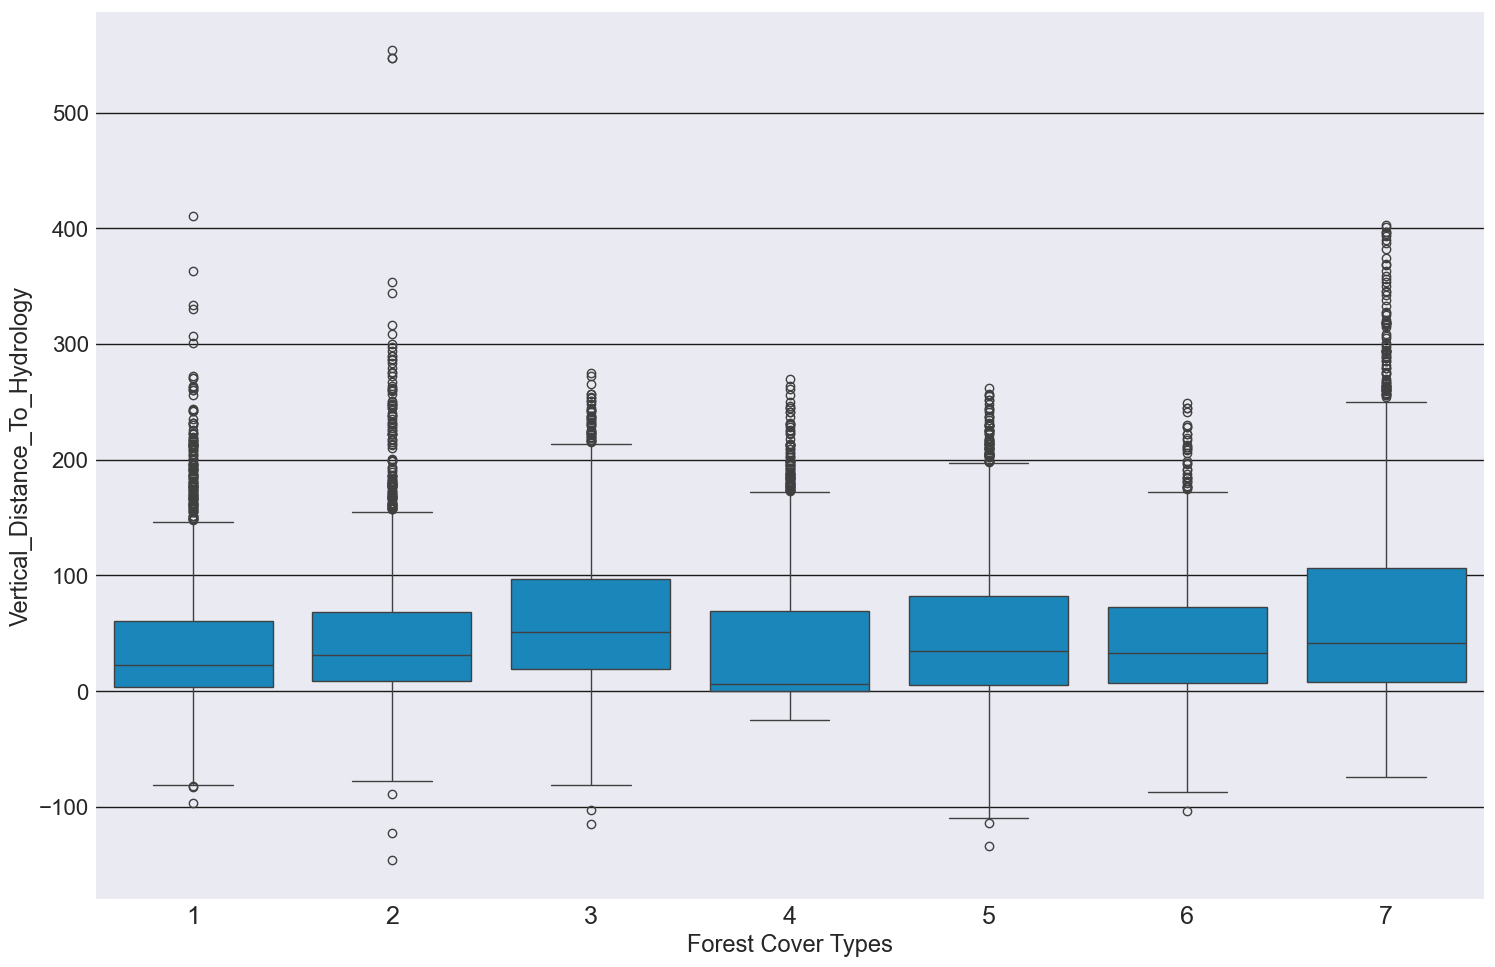

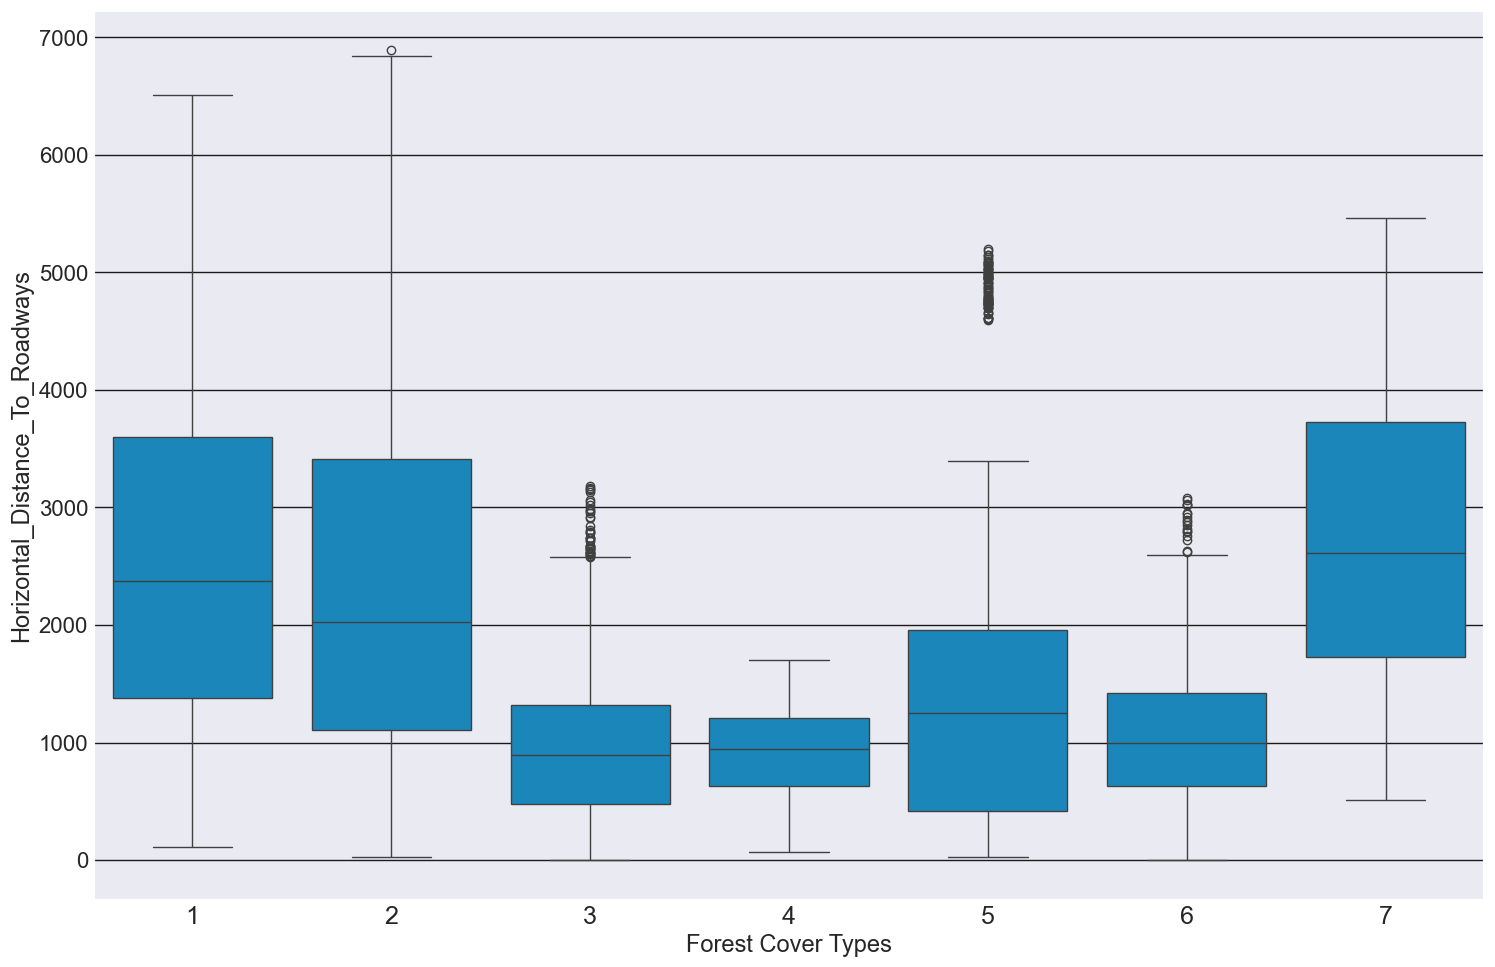

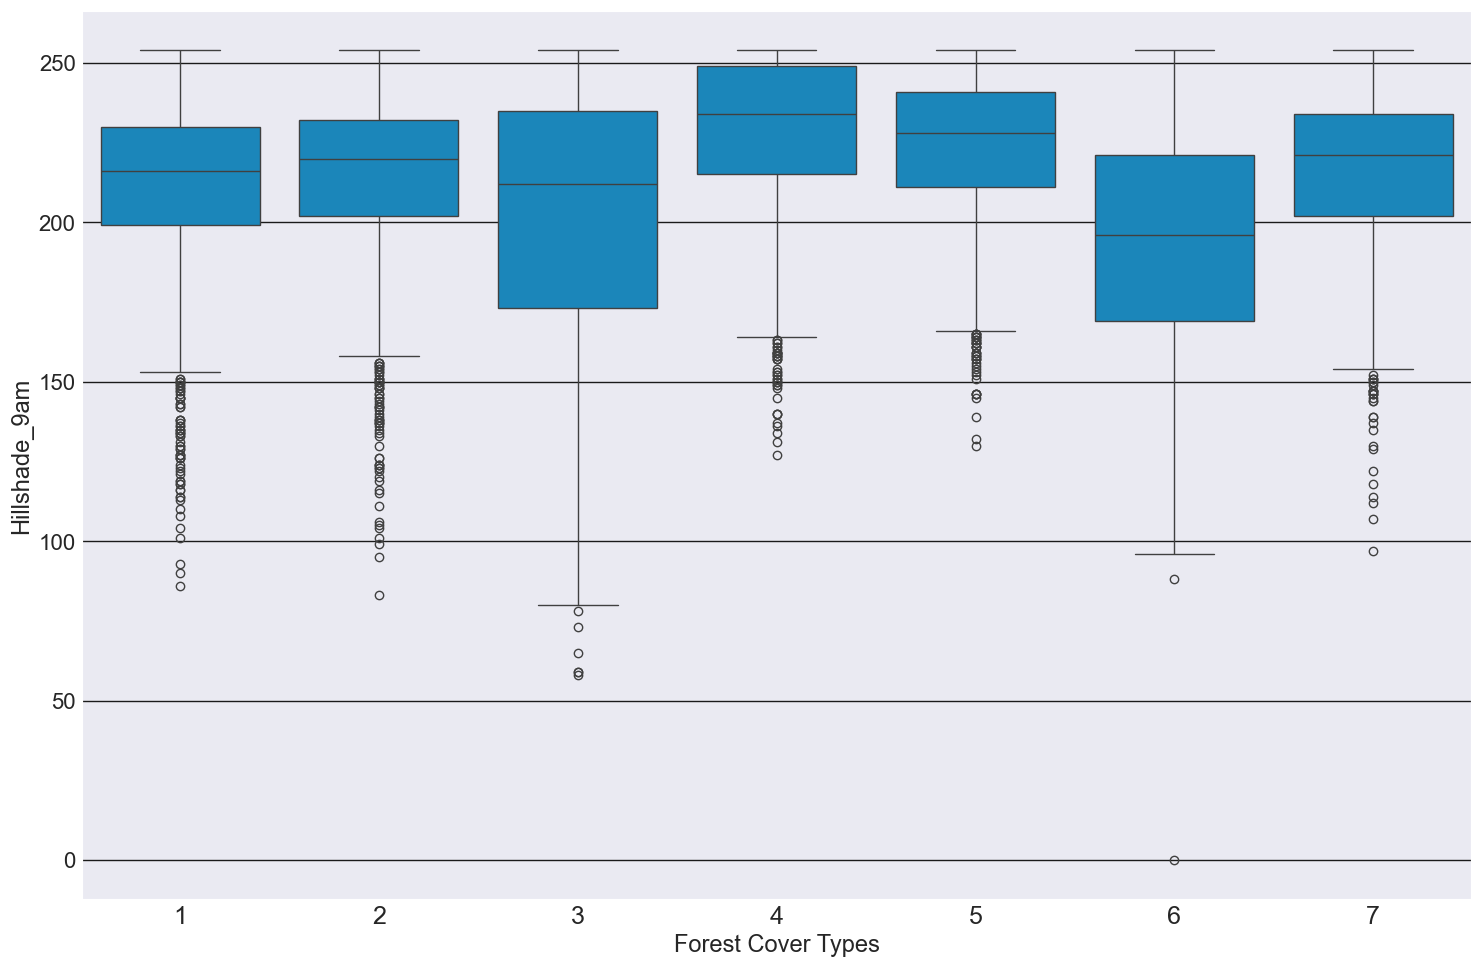

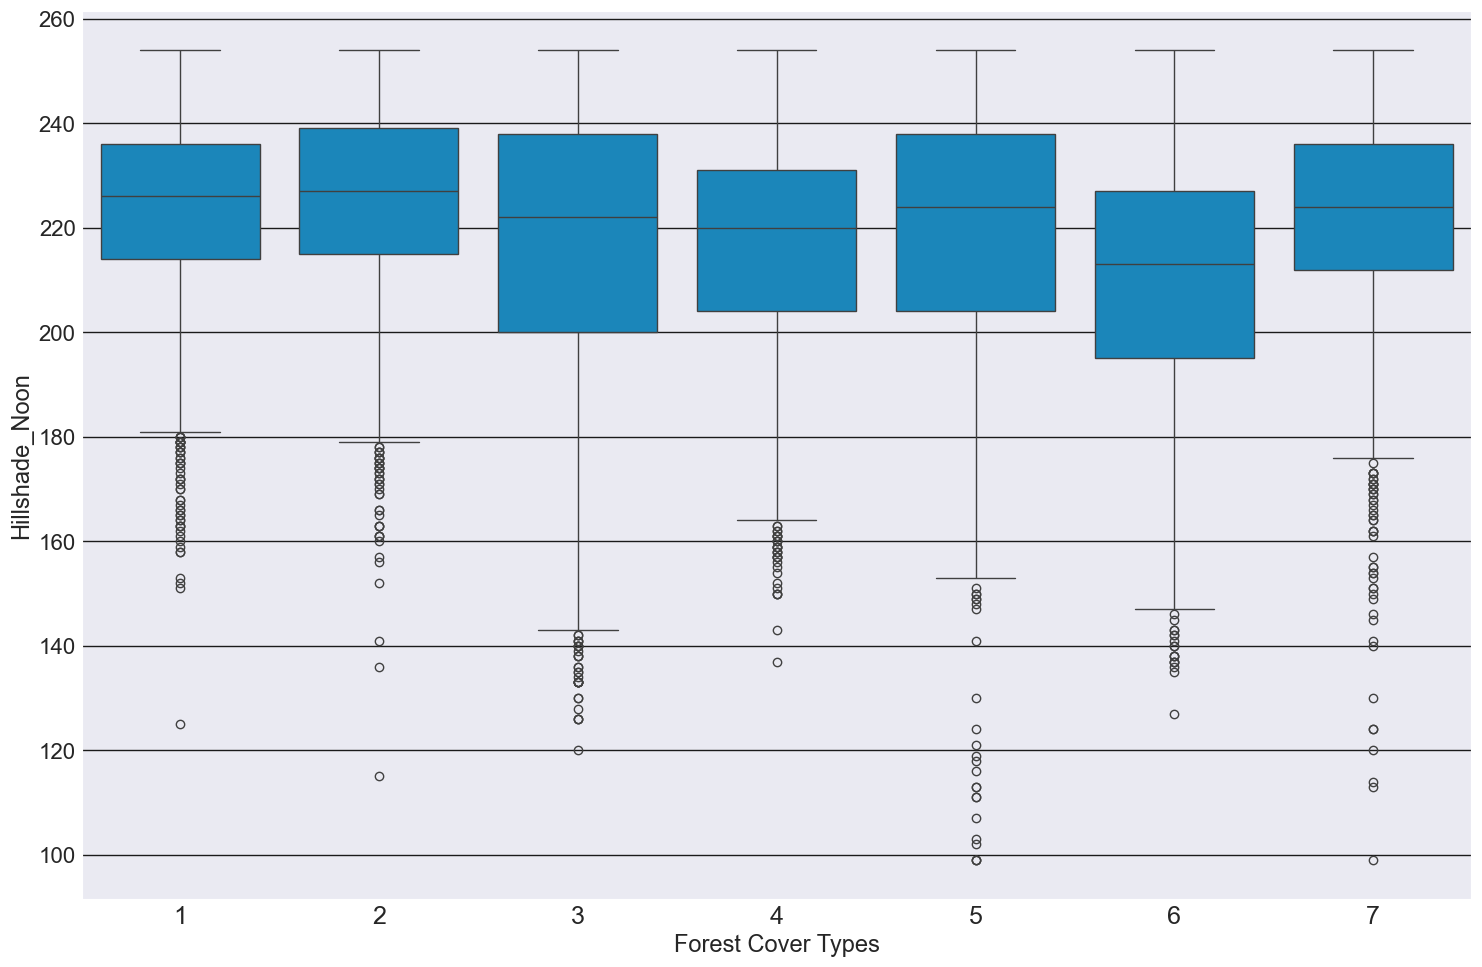

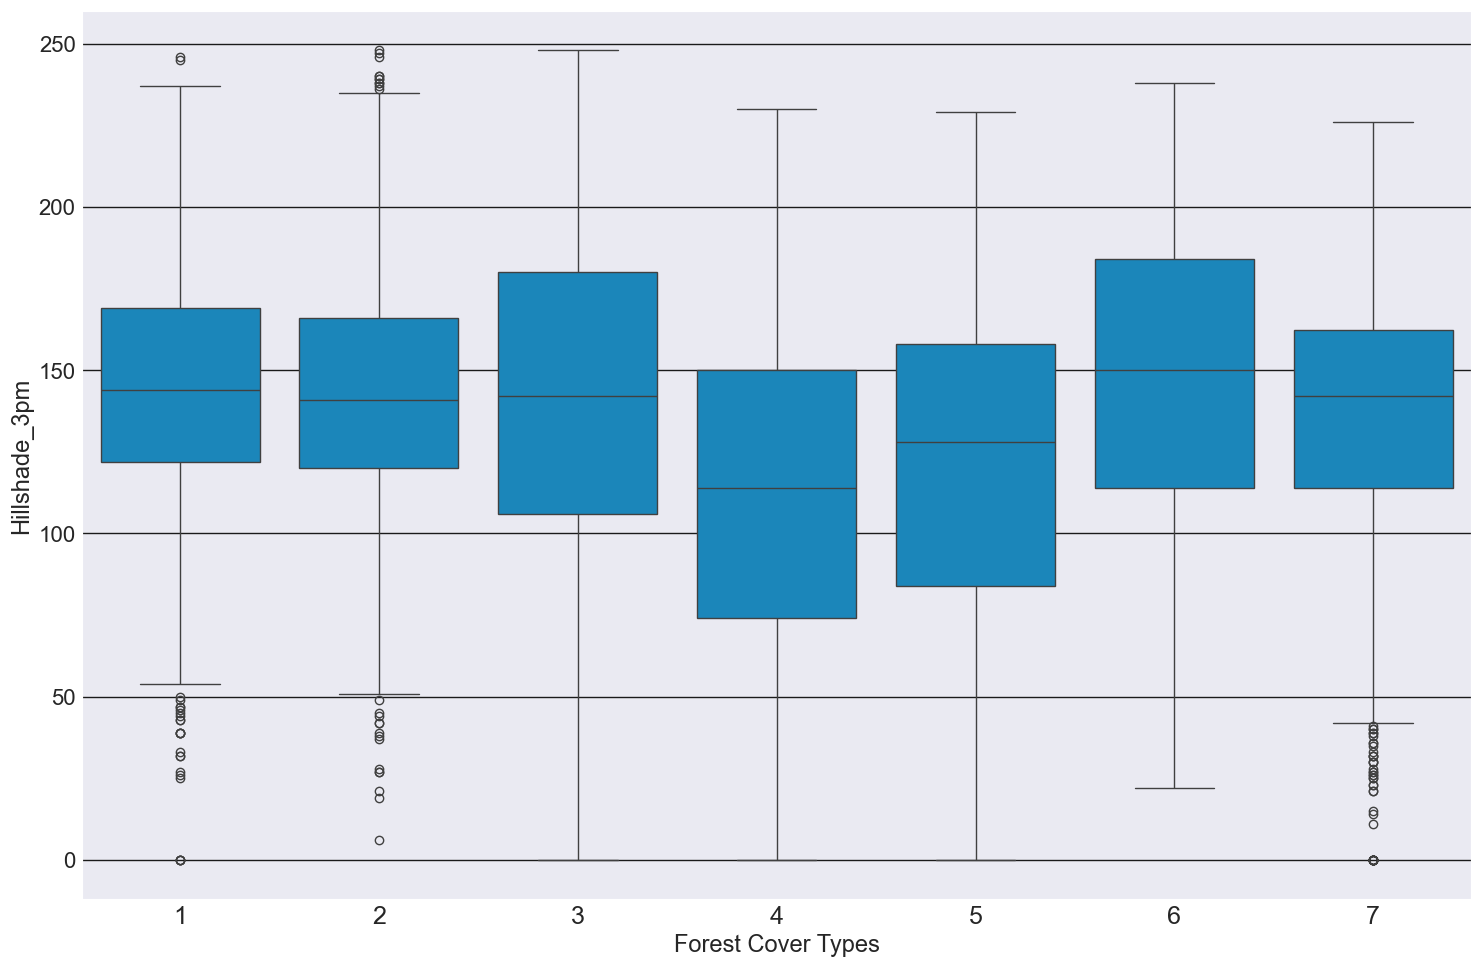

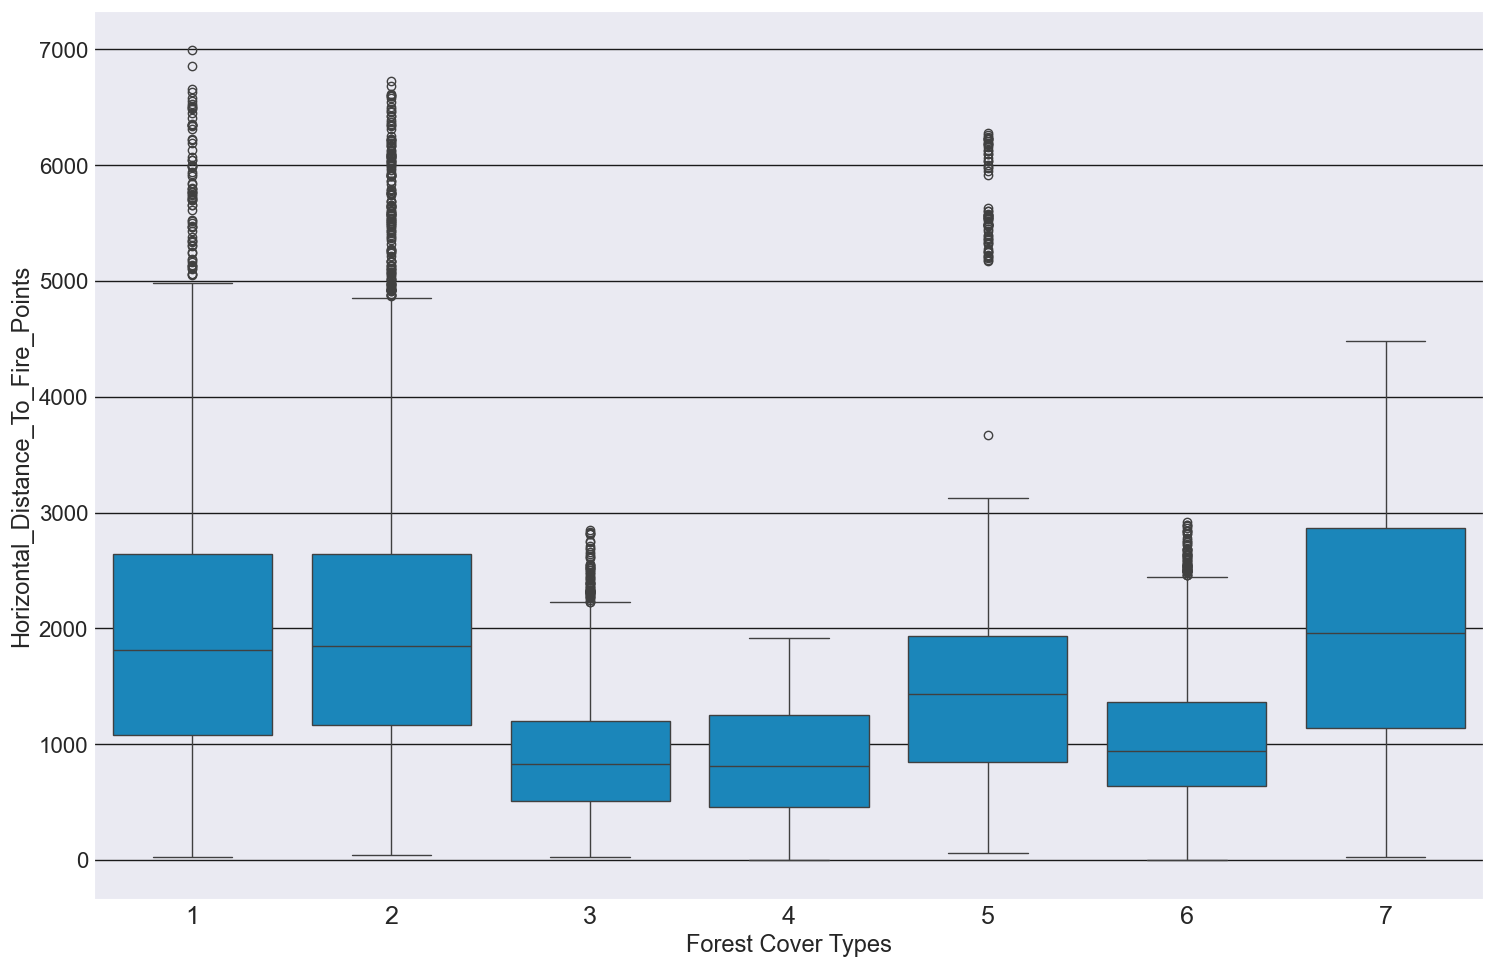

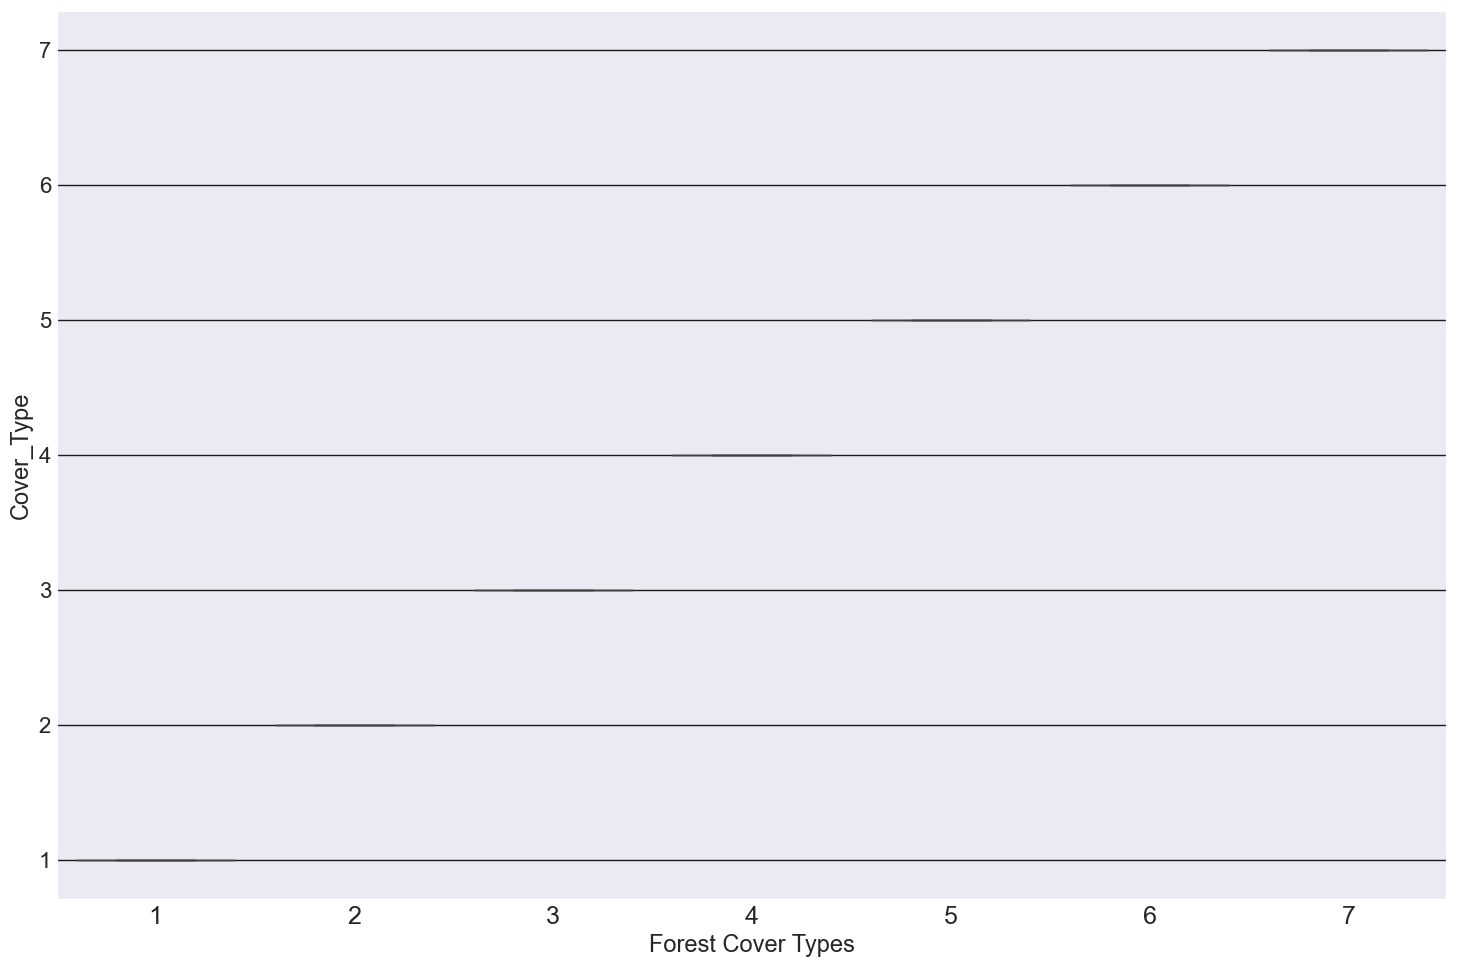

In [197]:
target = forest_data['Cover_Type']
features = numerical.columns
for i in range(0, len(features)):
    plt.subplots(figsize=(16, 11))
    sns.boxplot(numerical, x=target, y = features[i])
    plt.xticks(size = 18)
    plt.yticks(size = 16)
    plt.xlabel('Forest Cover Types', size = 17)
    plt.ylabel(features[i], size = 17)
    plt.show()

<h3>Categorical Data</h3>

<b>Widerness Areas</b>

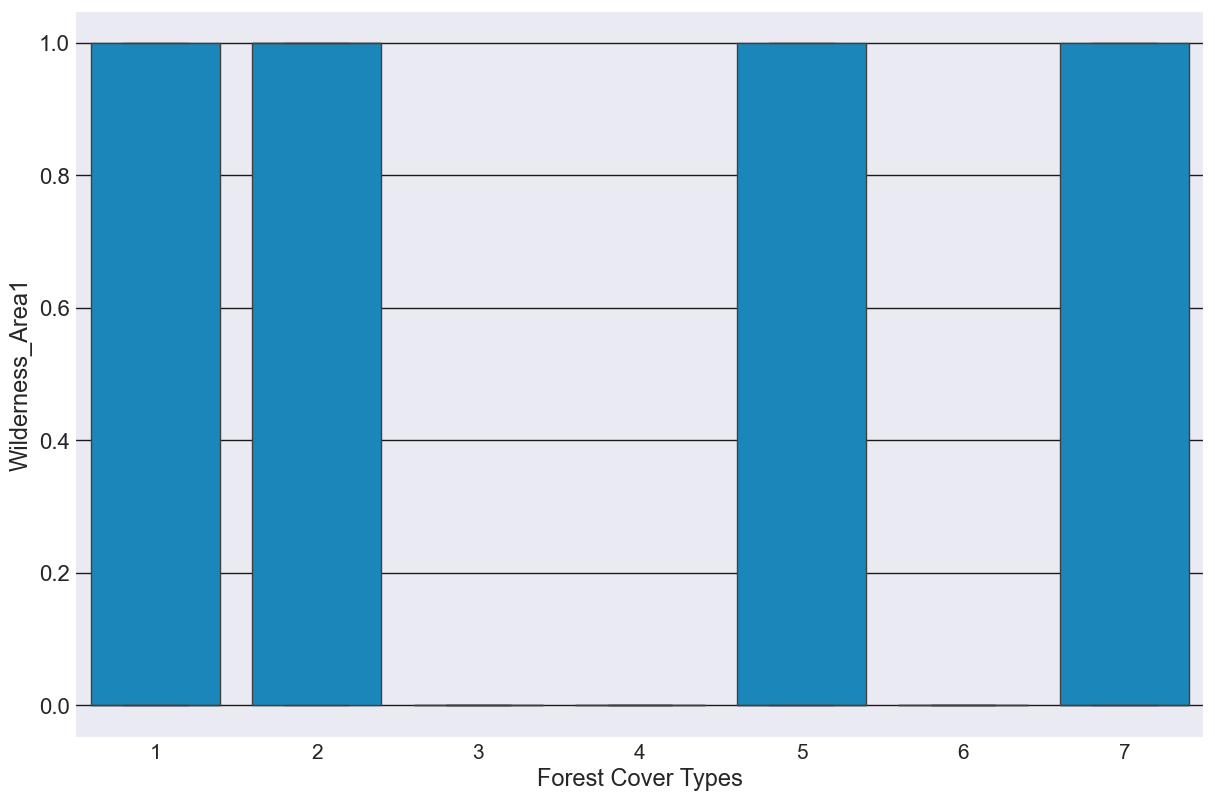

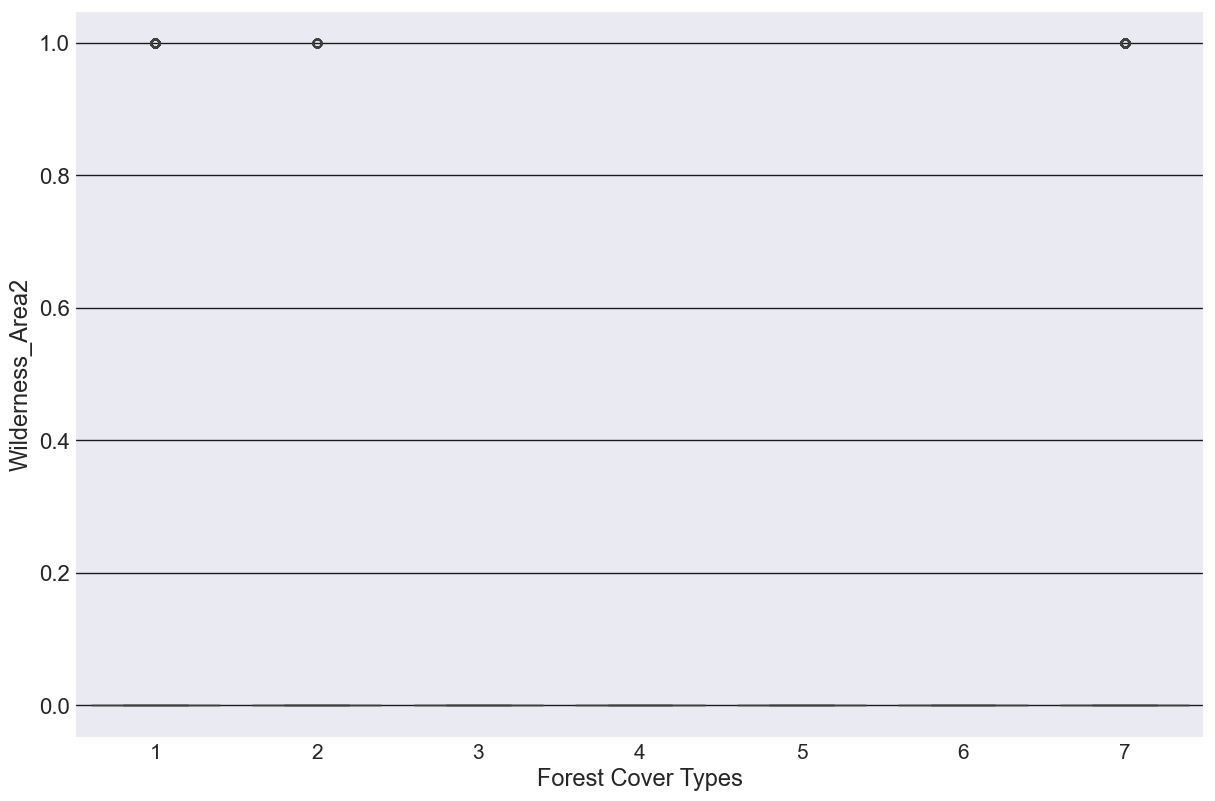

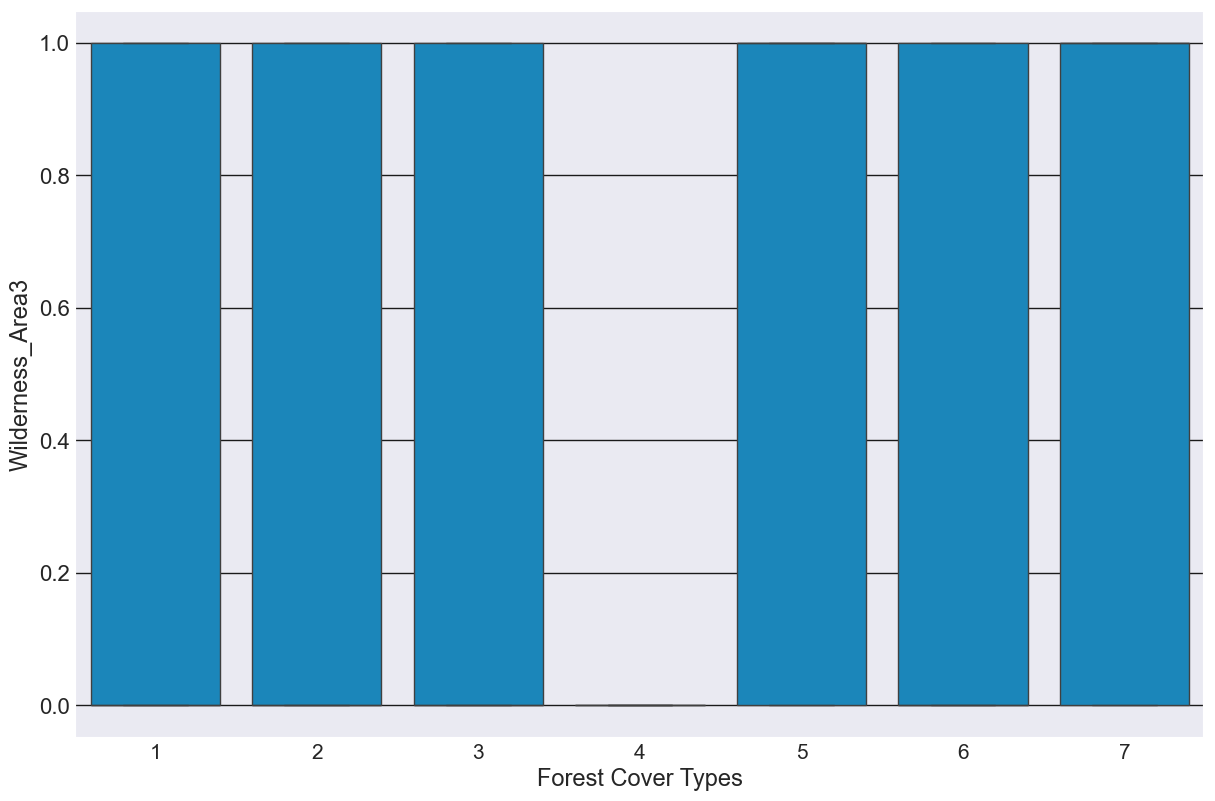

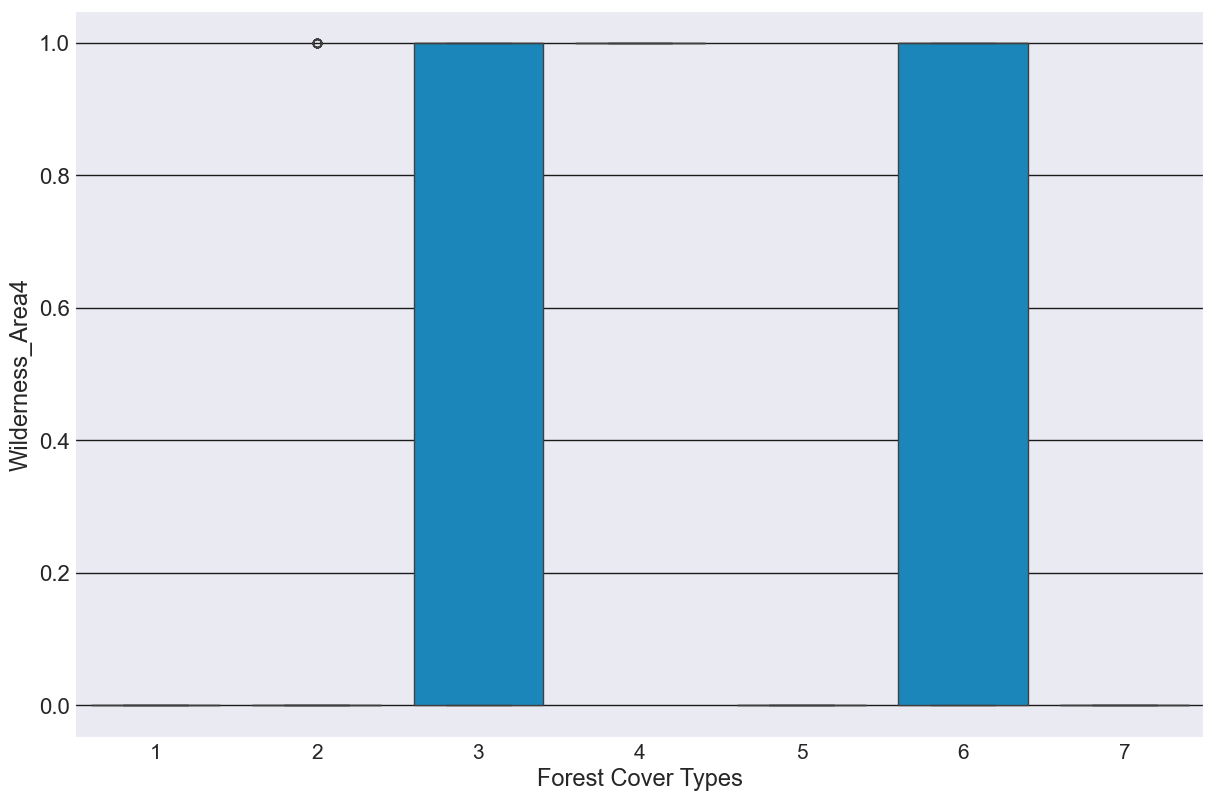

In [198]:
target = forest_data['Cover_Type']
features = Wilderness_data.columns

for i in range(0, len(features)):
    plt.subplots(figsize=(13, 9))
    sns.boxplot(Wilderness_data, x=target, y = features[i])
    plt.xticks(size = 15)
    plt.yticks(size = 16)
    plt.xlabel('Forest Cover Types', size = 17)
    plt.ylabel(features[i], size = 17)
    plt.show()

<b>Soil Types</b>

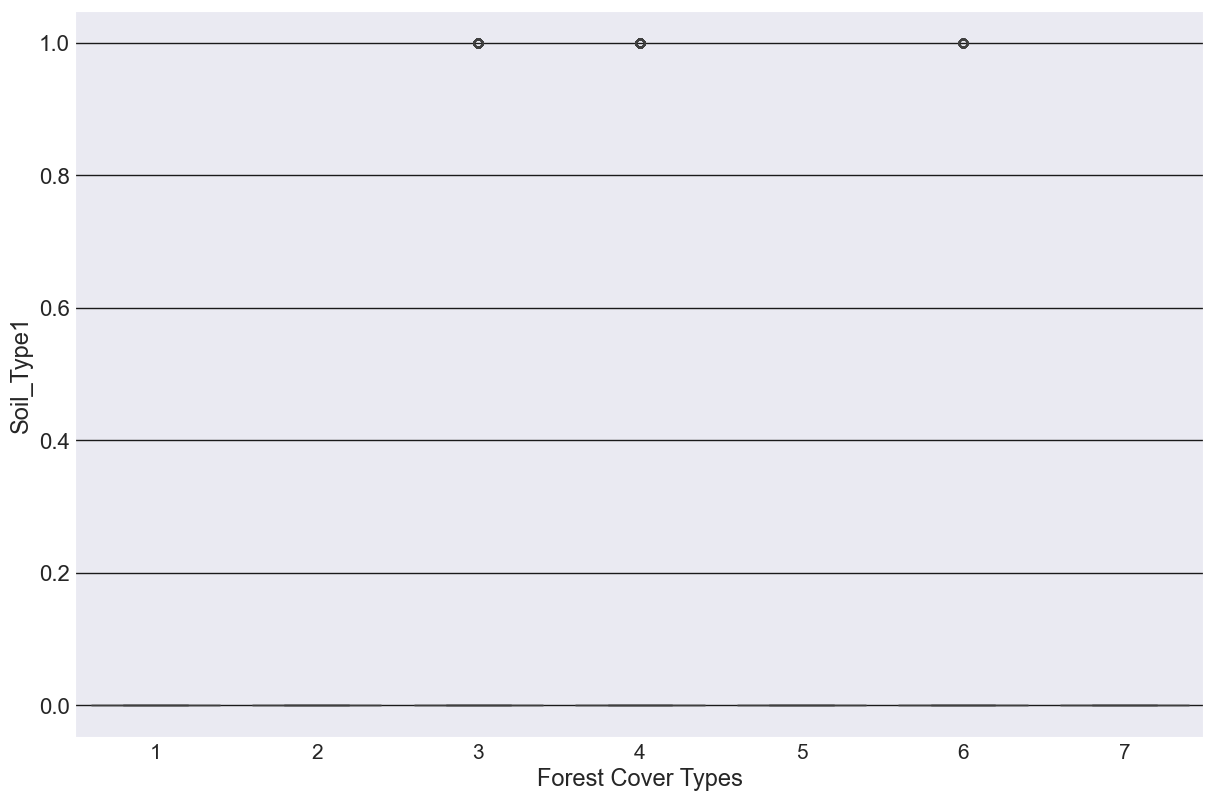

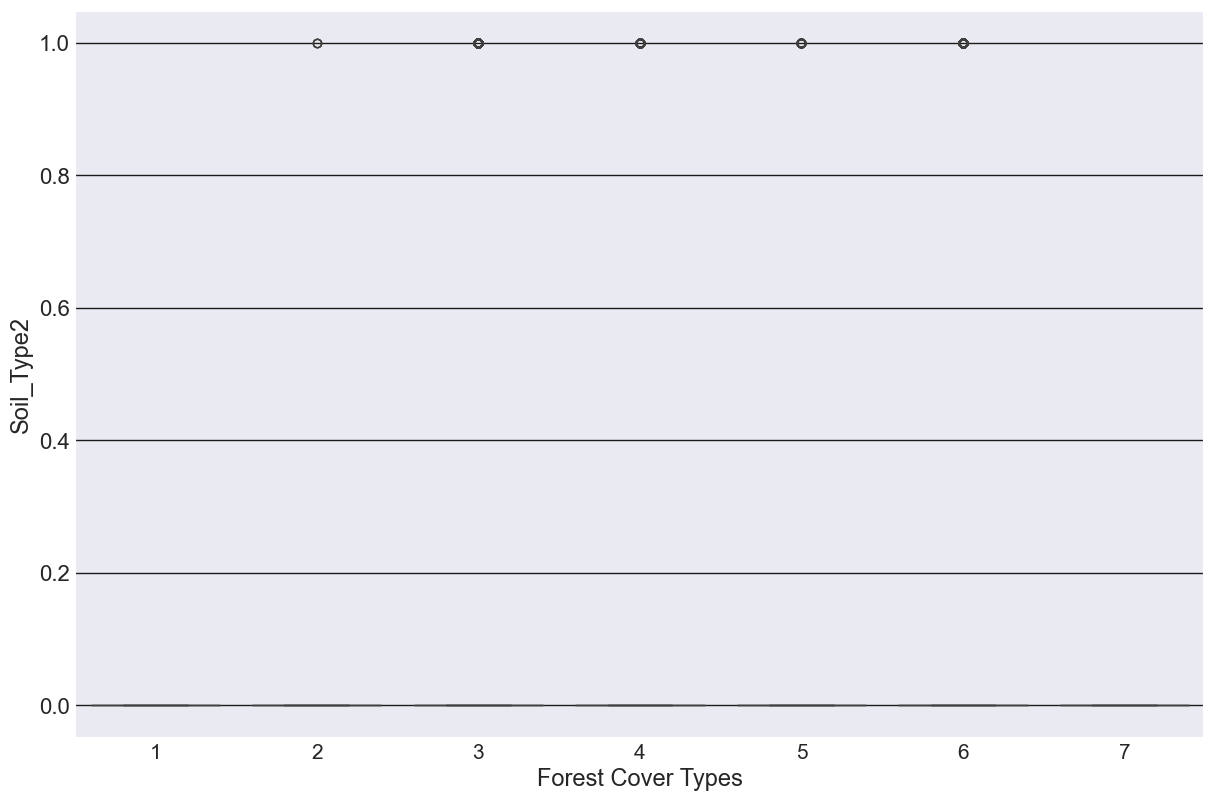

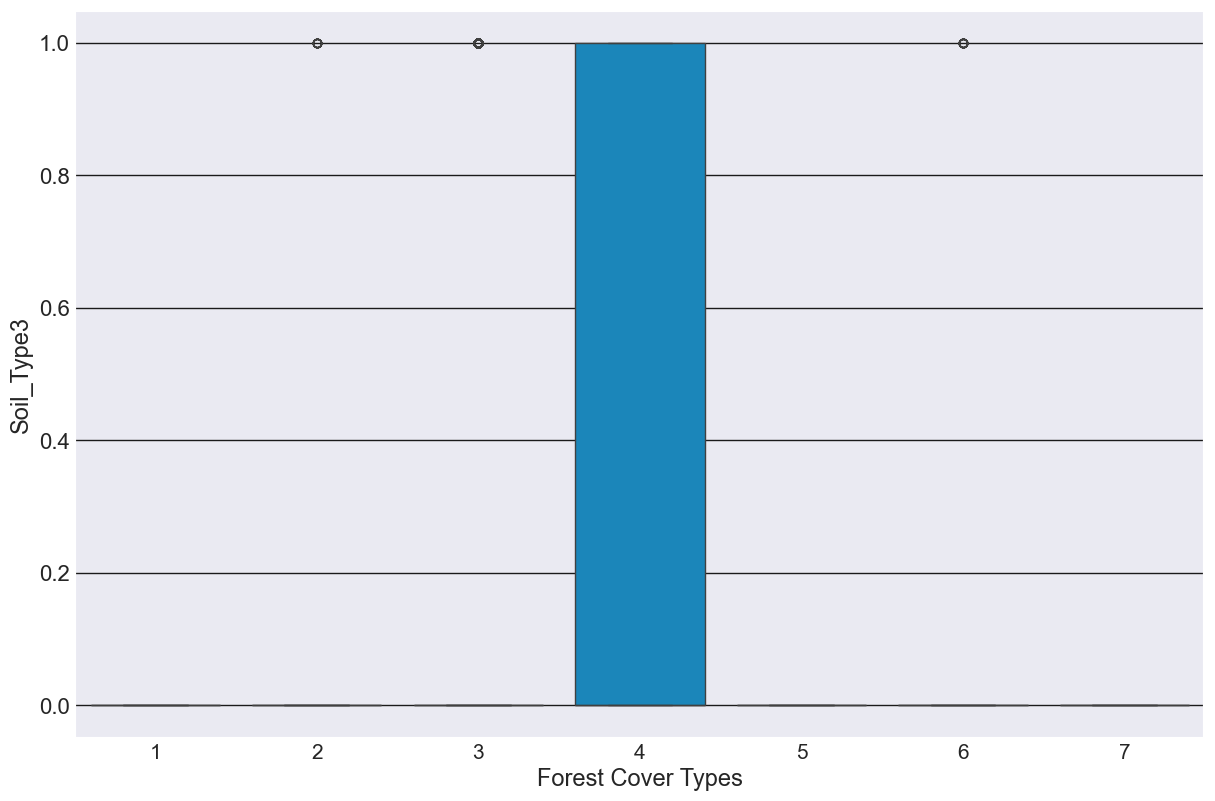

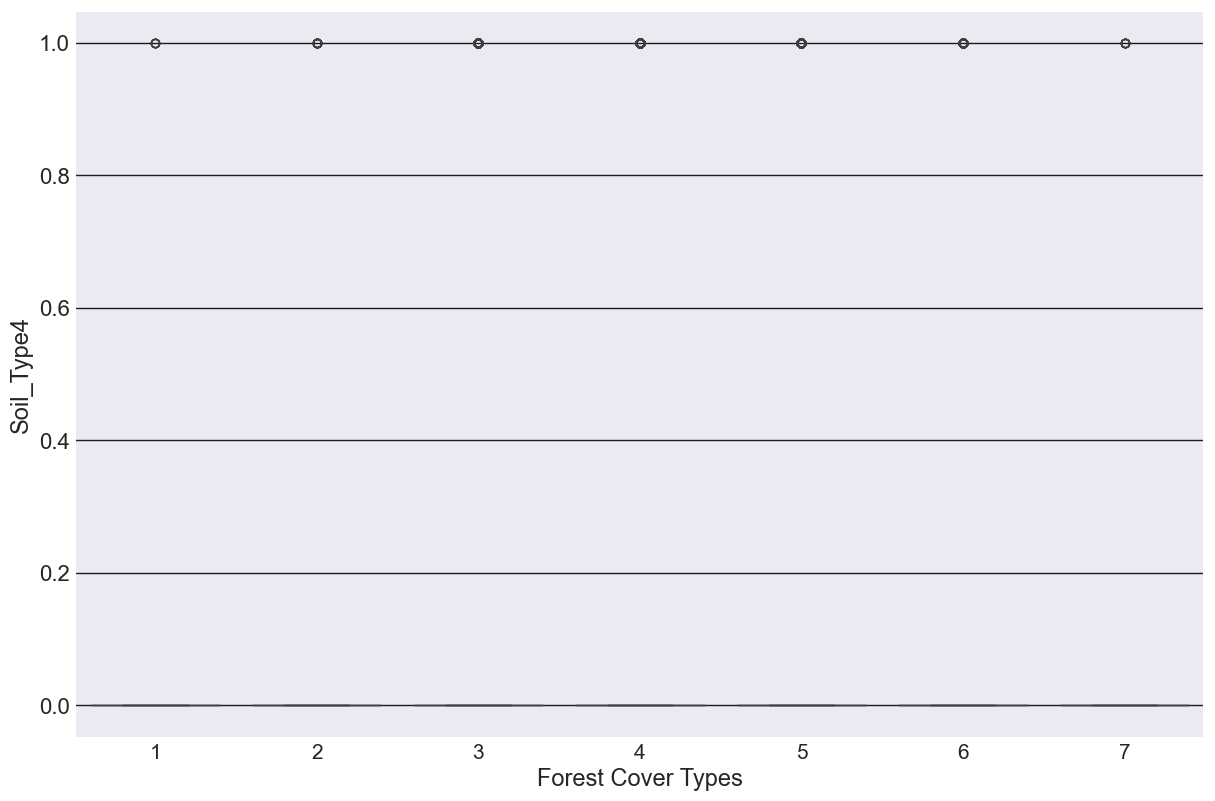

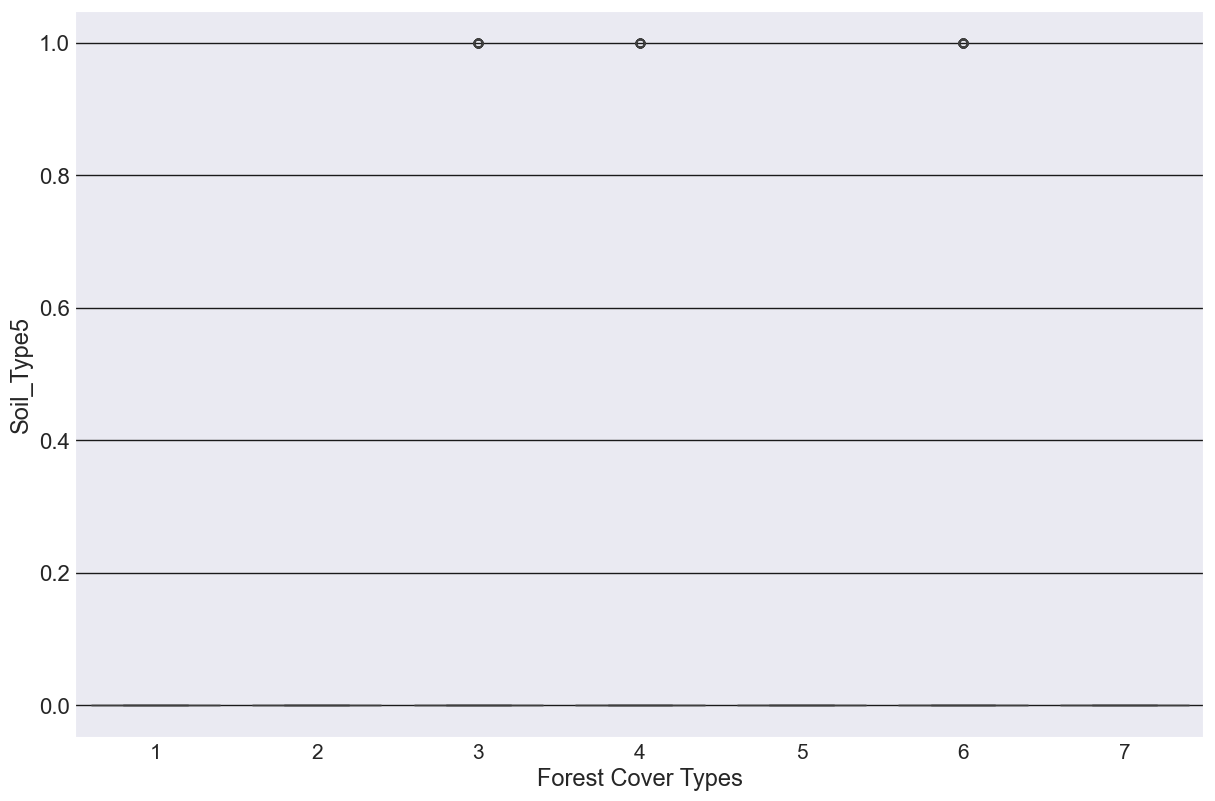

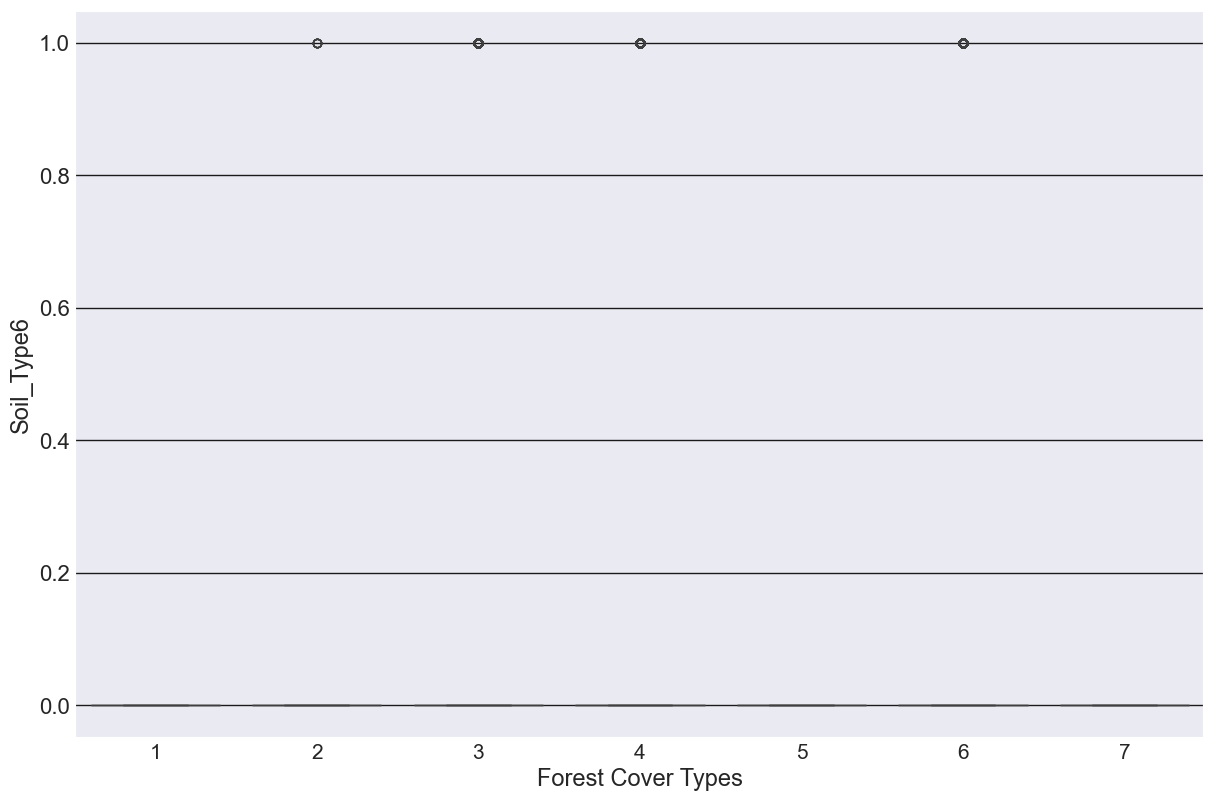

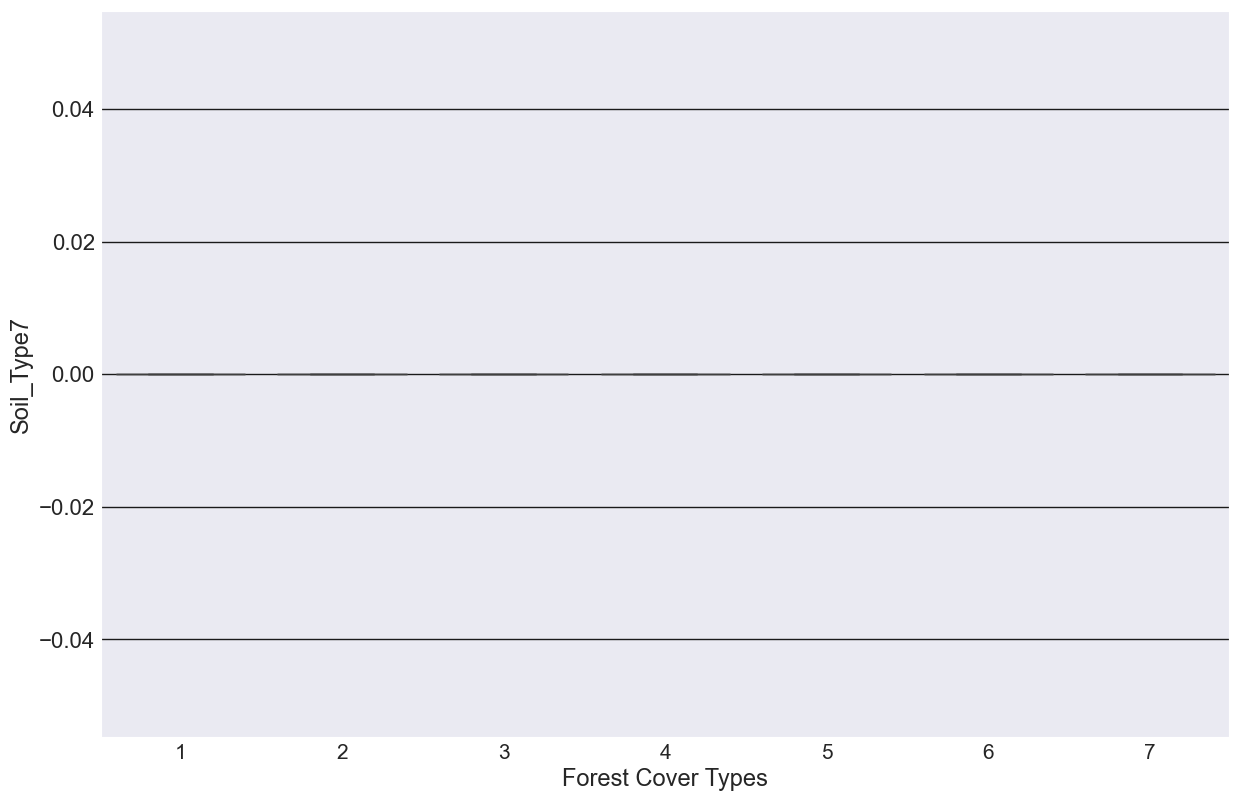

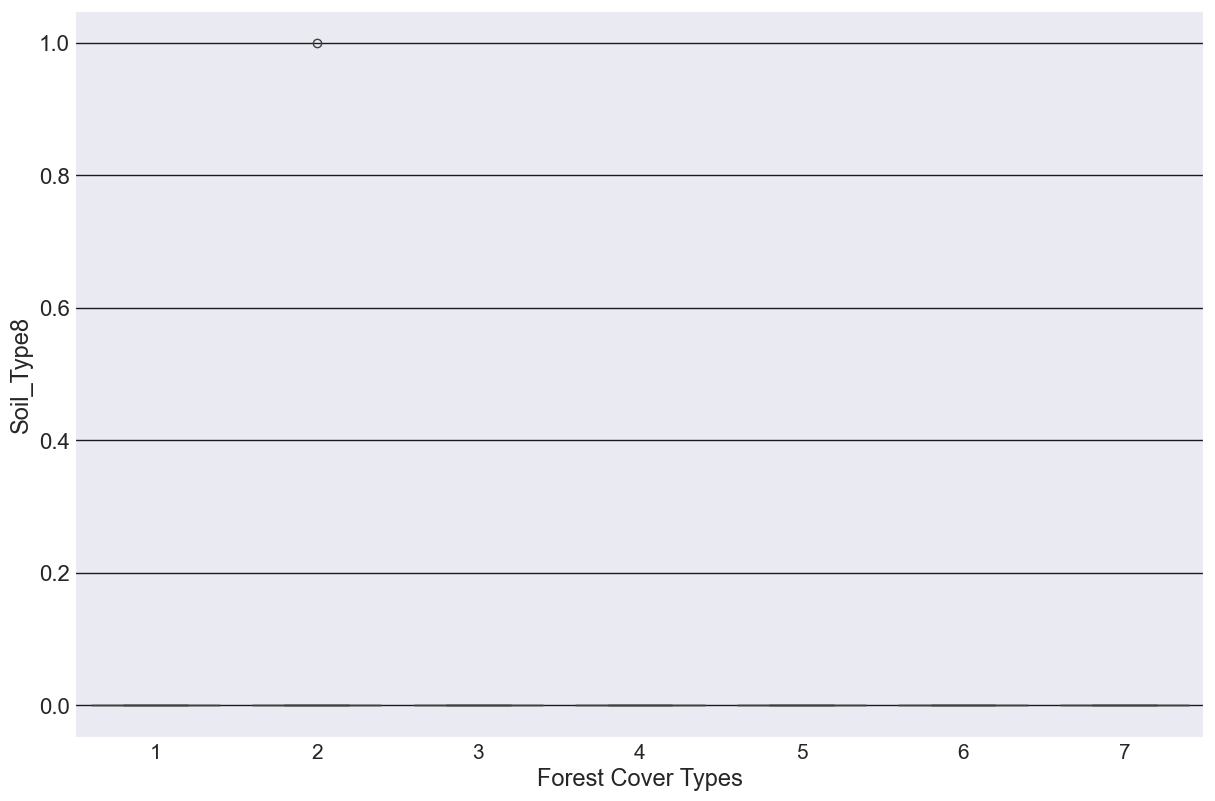

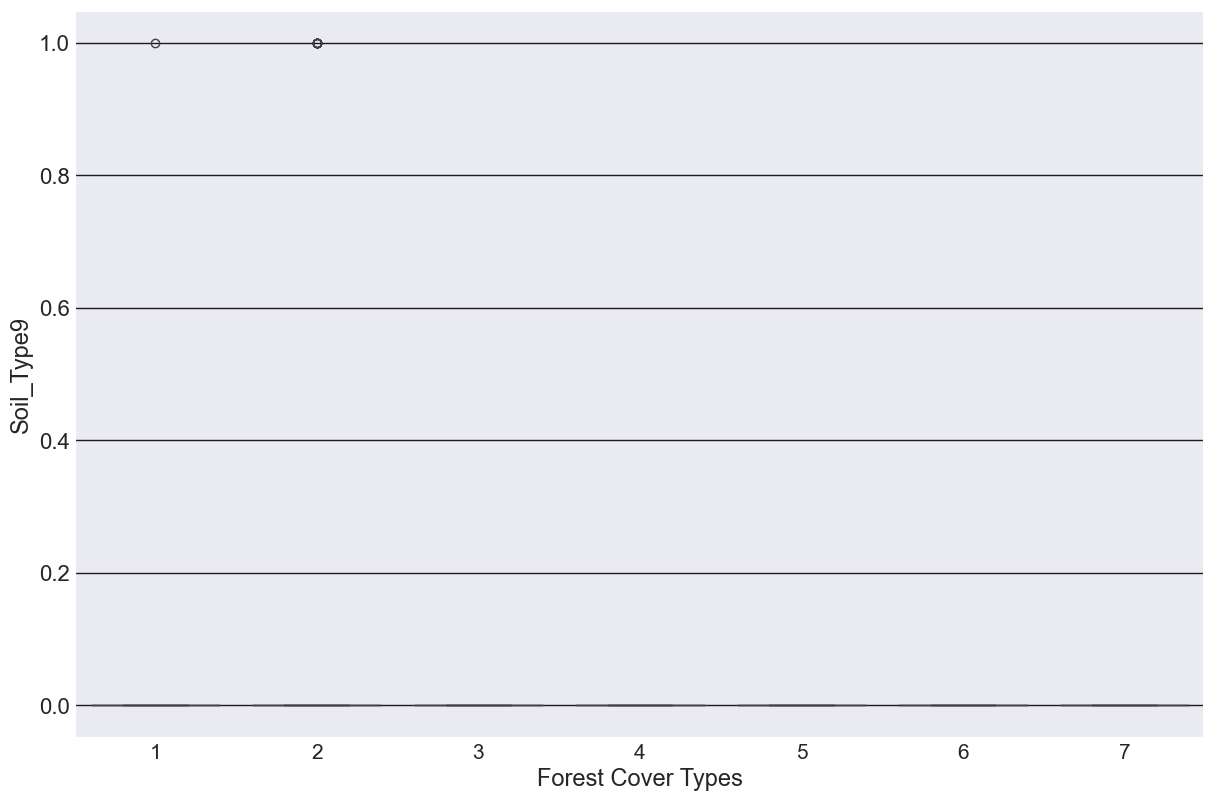

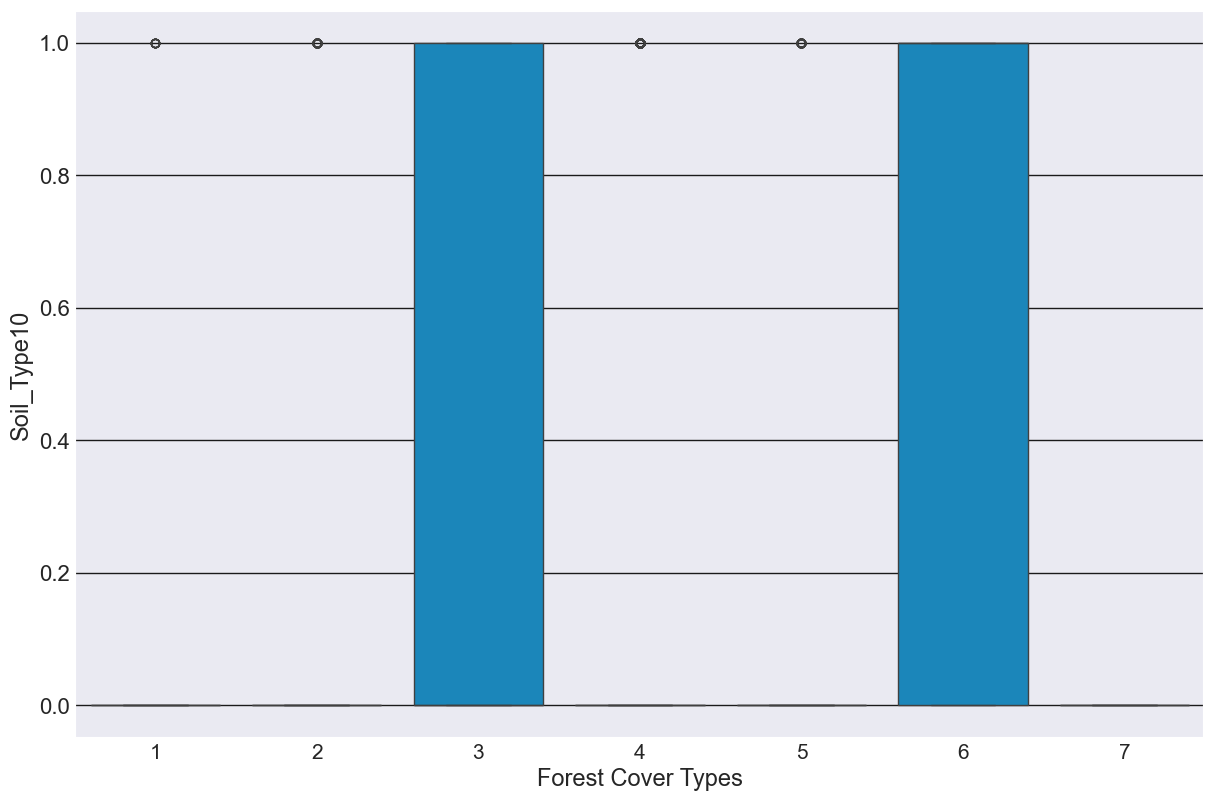

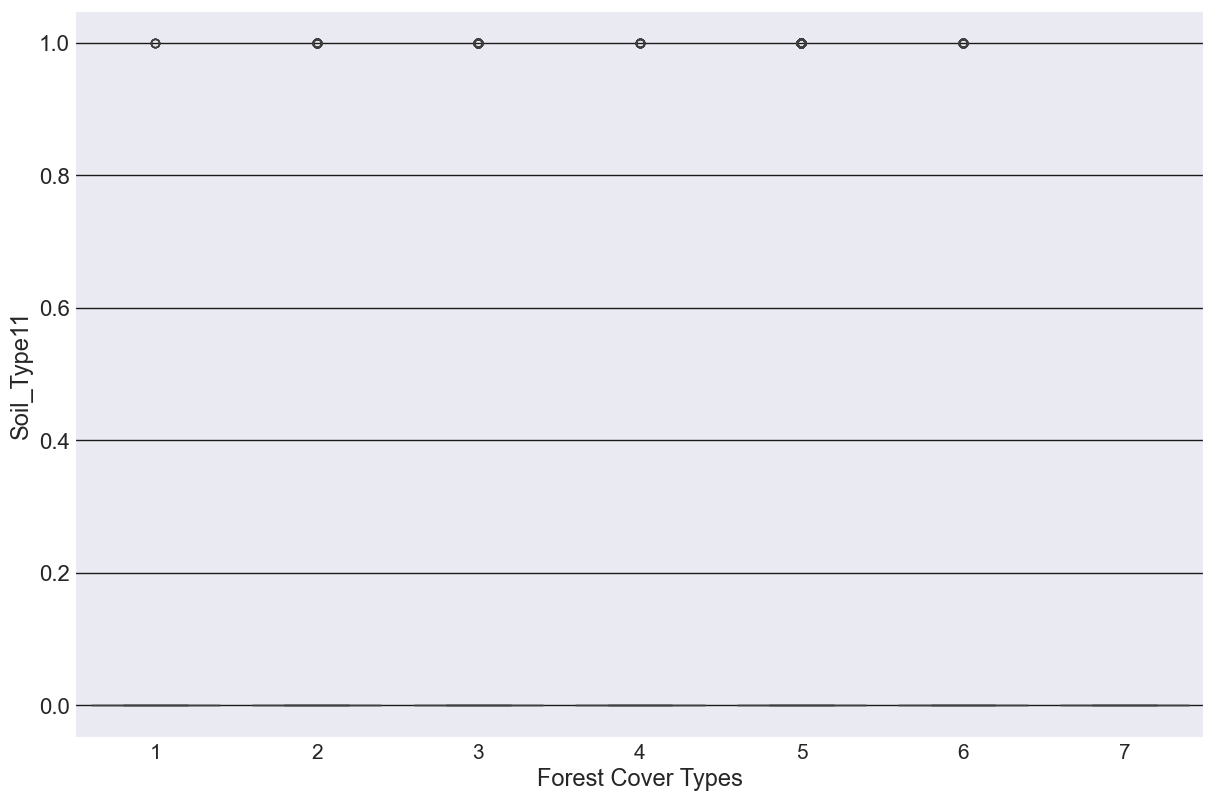

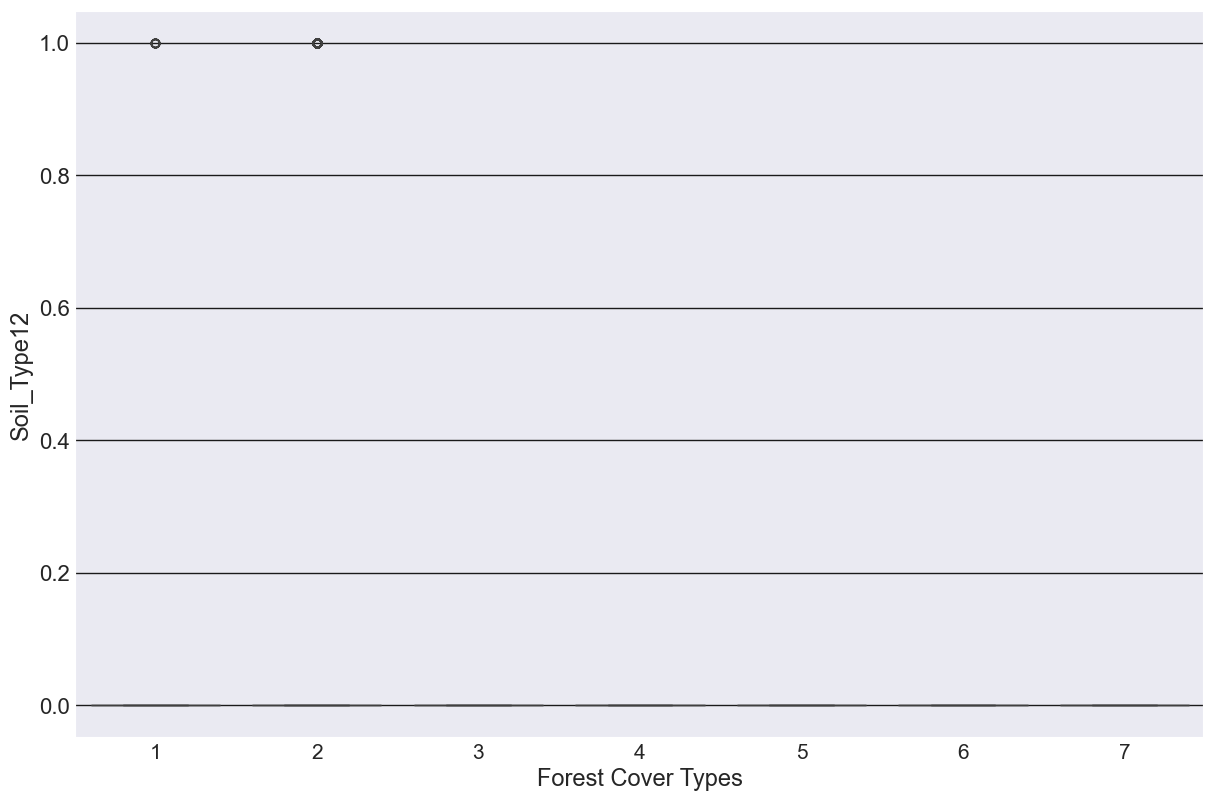

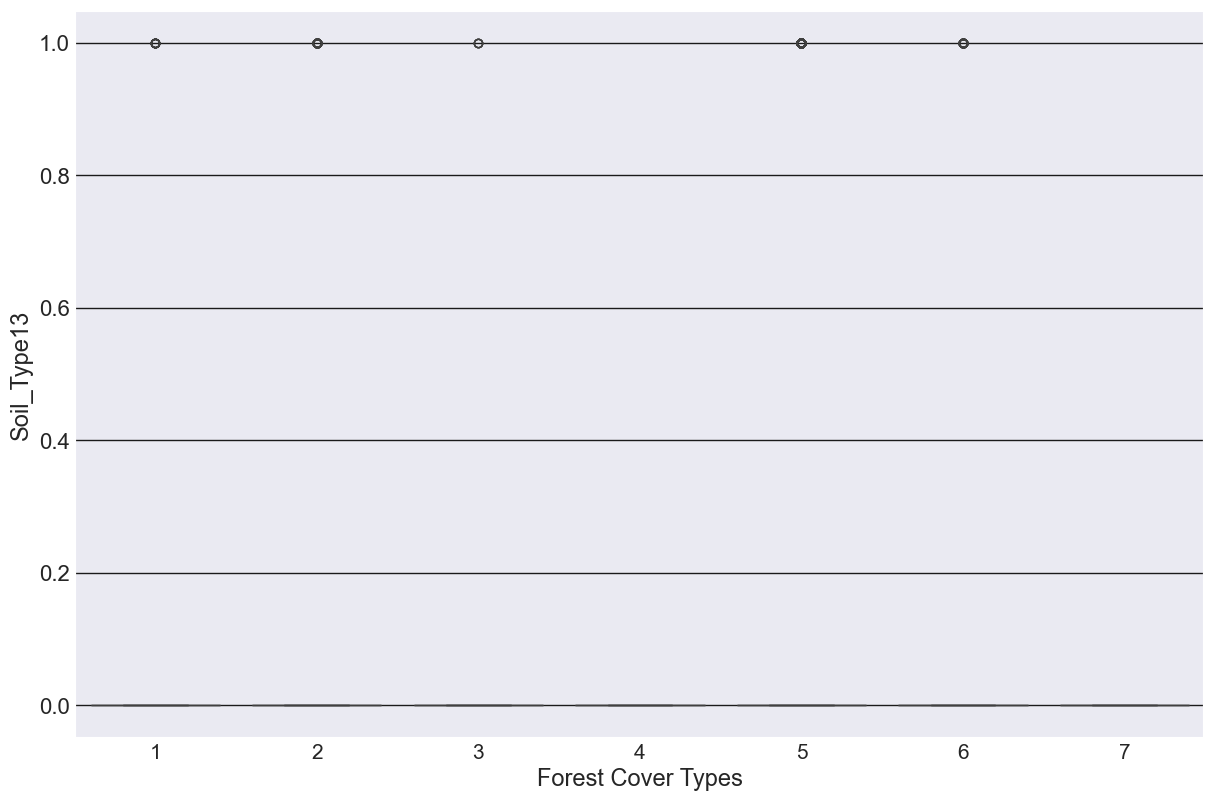

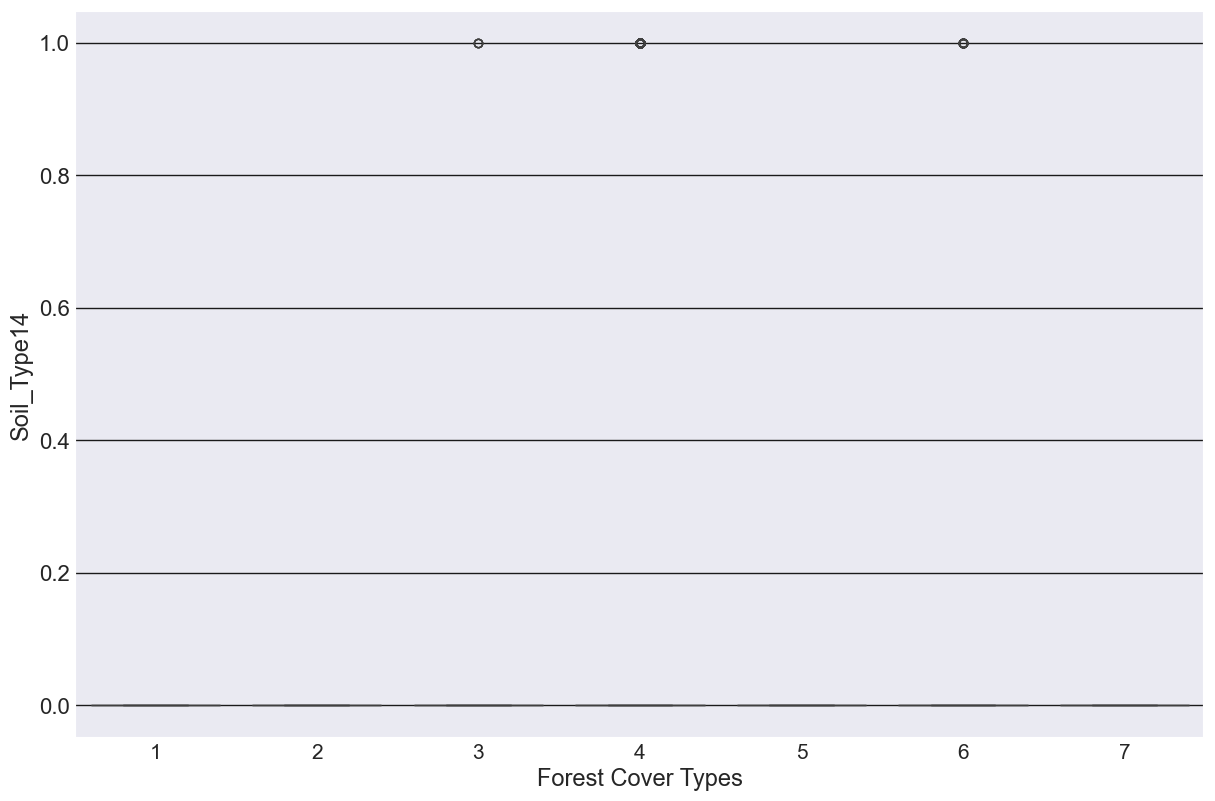

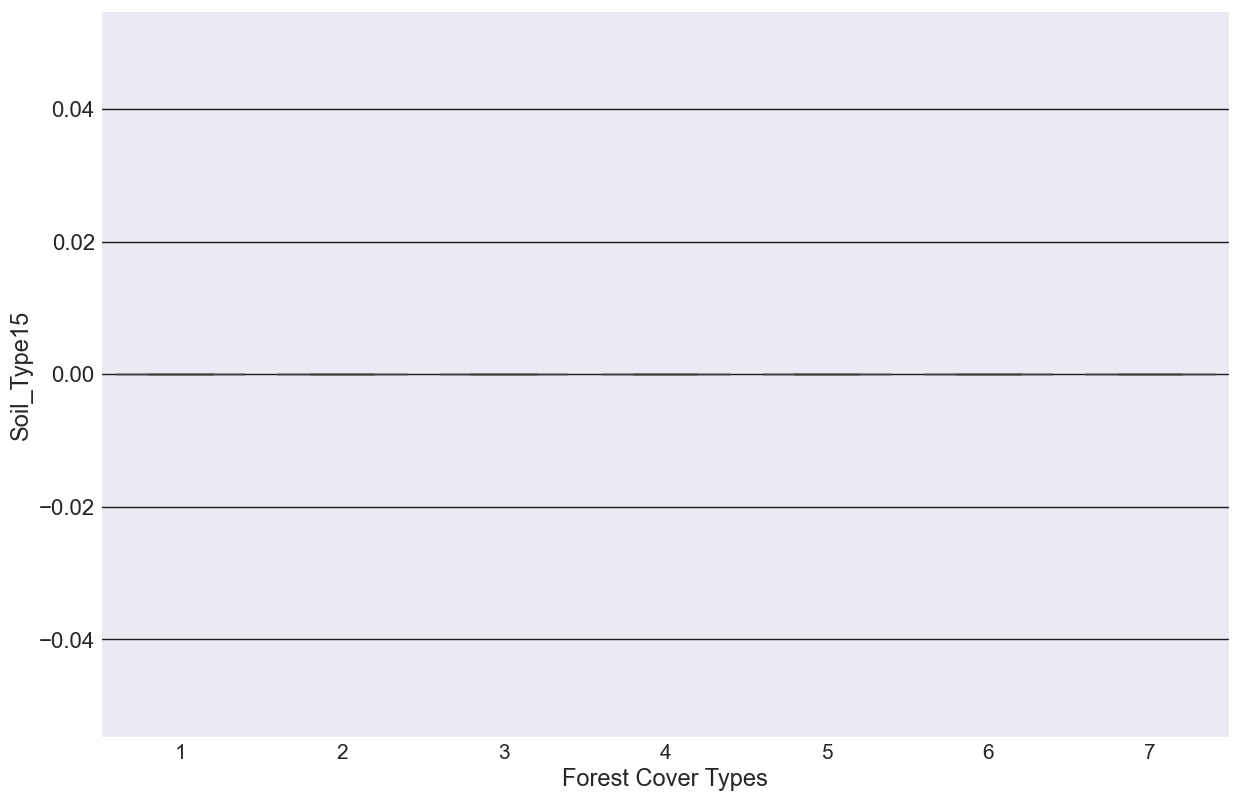

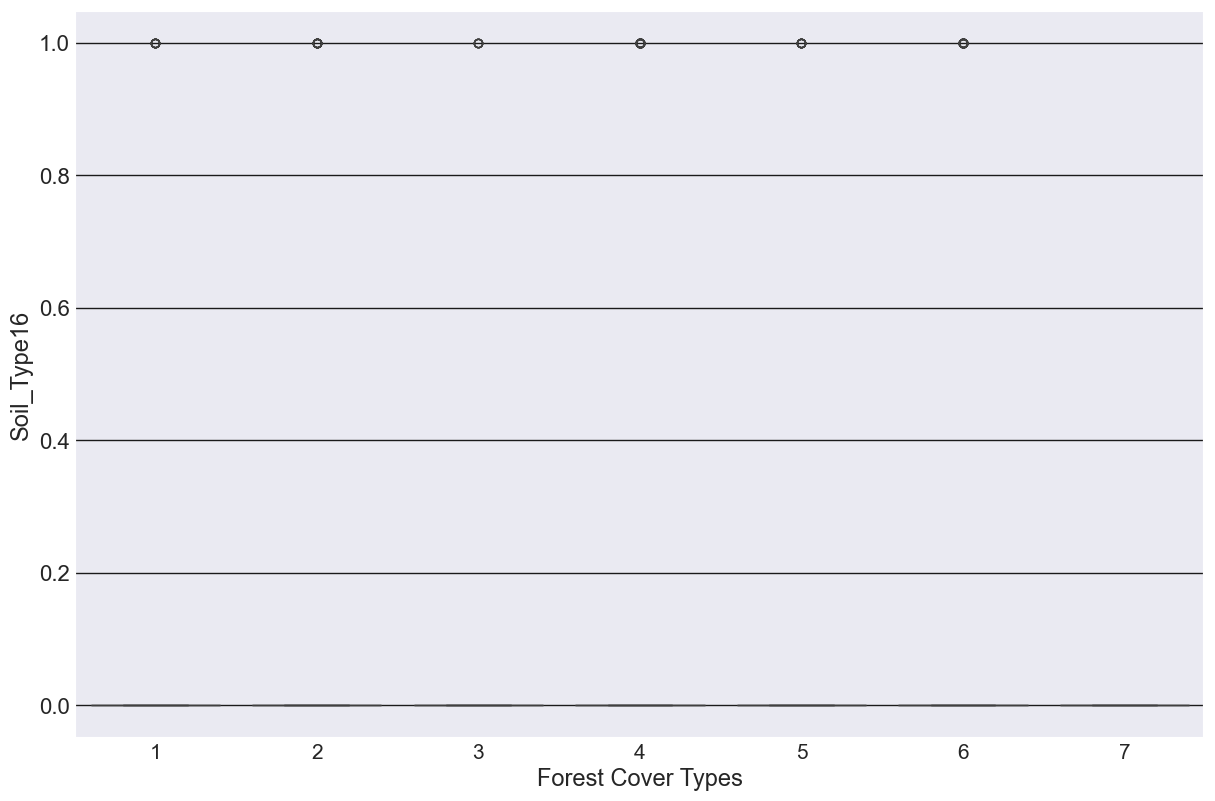

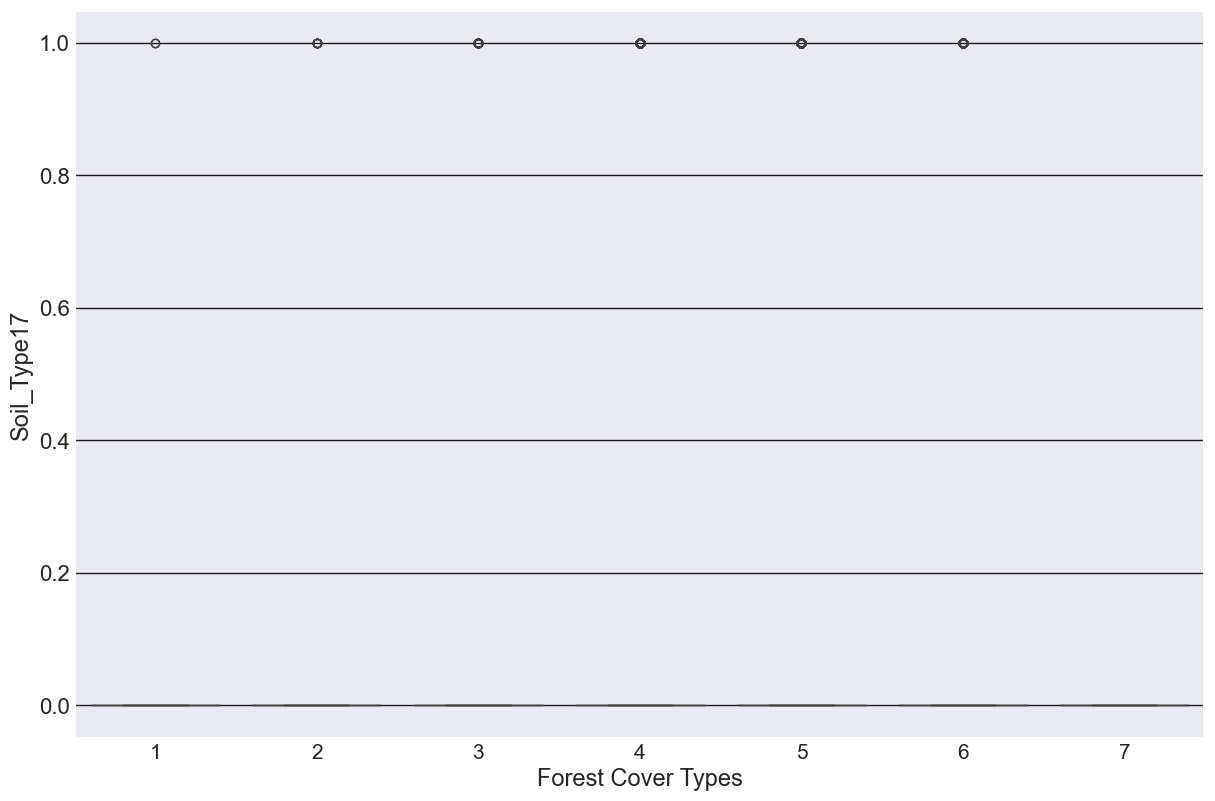

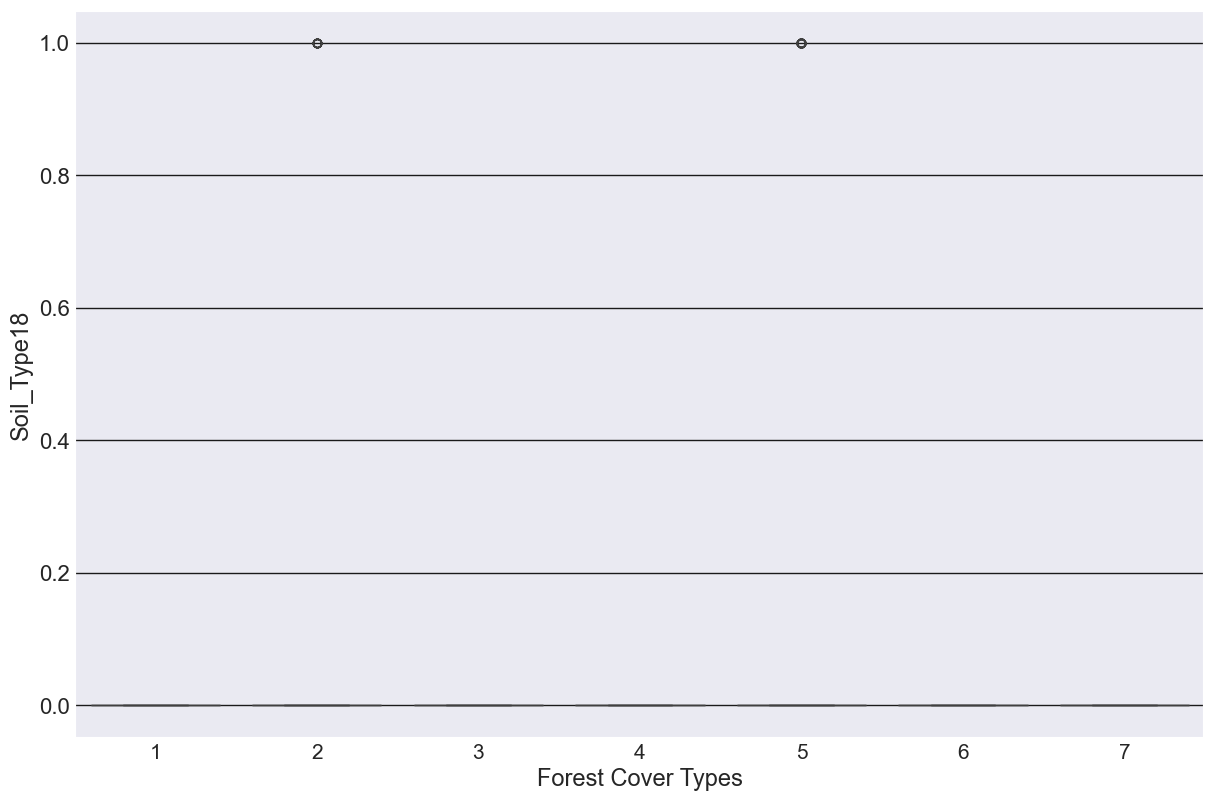

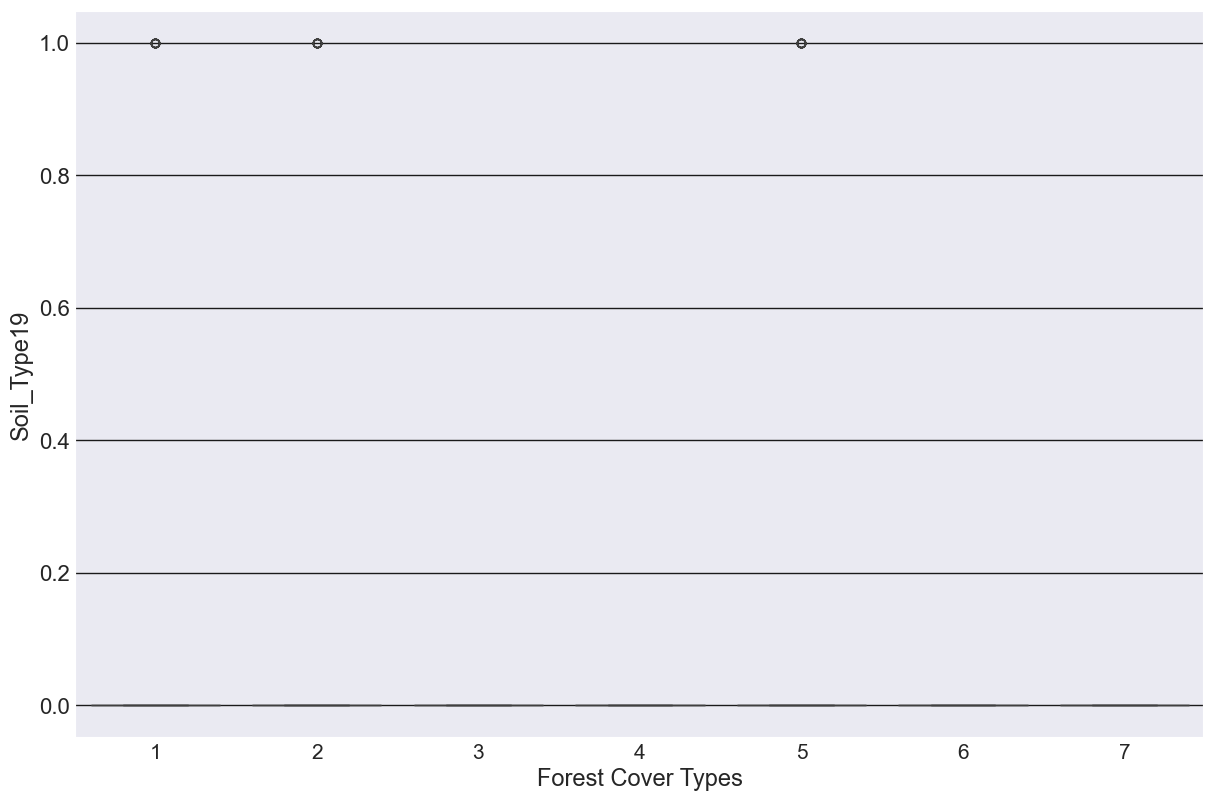

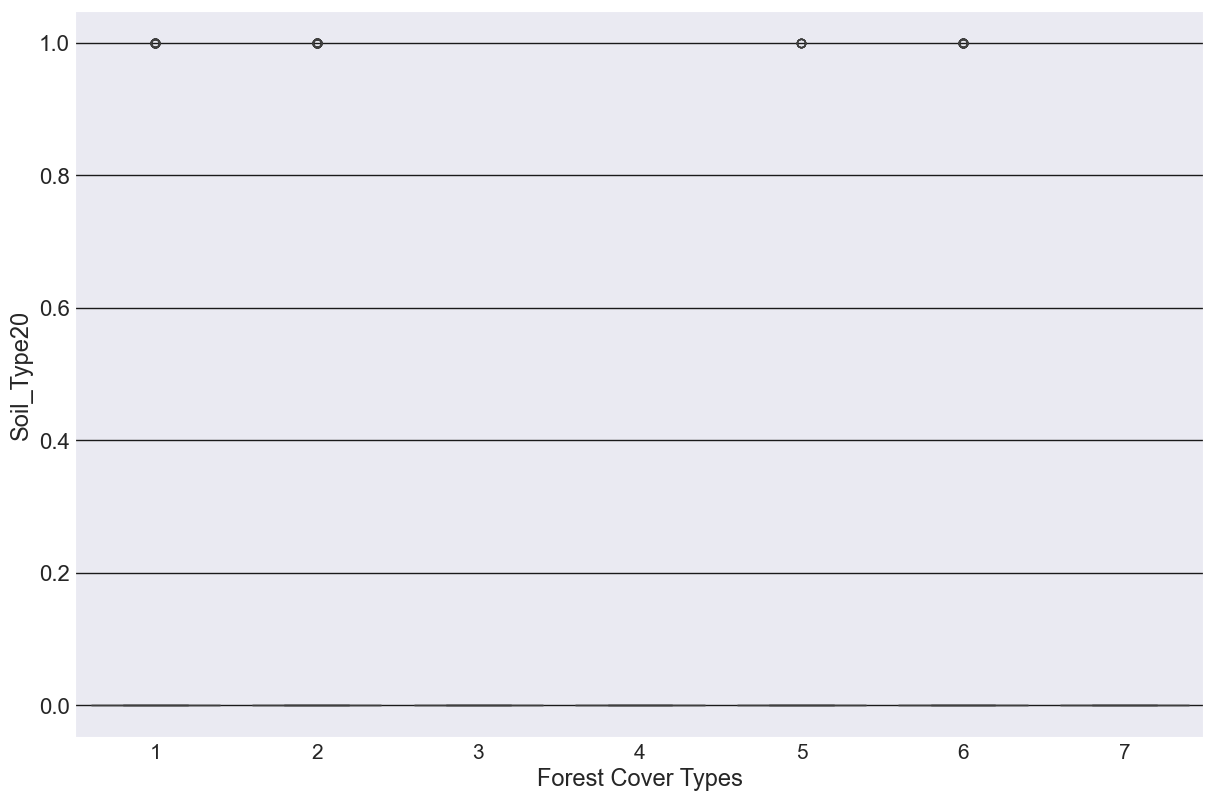

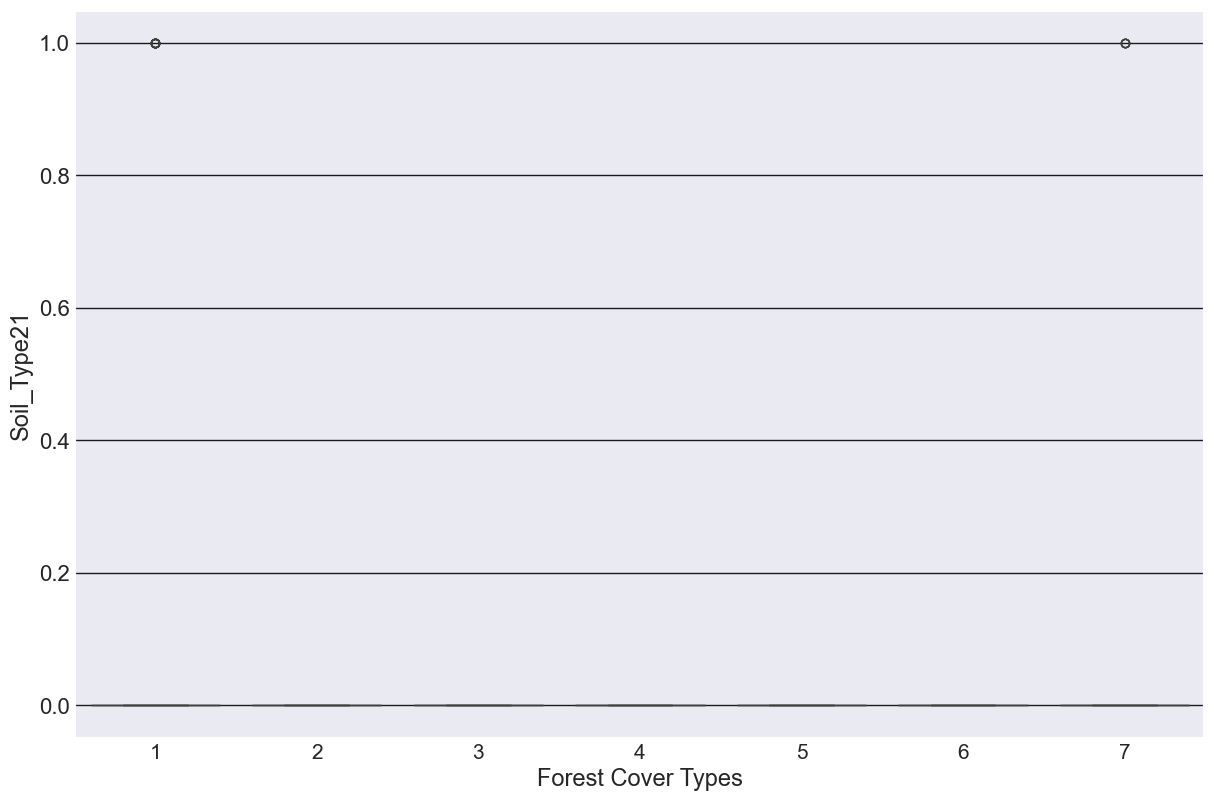

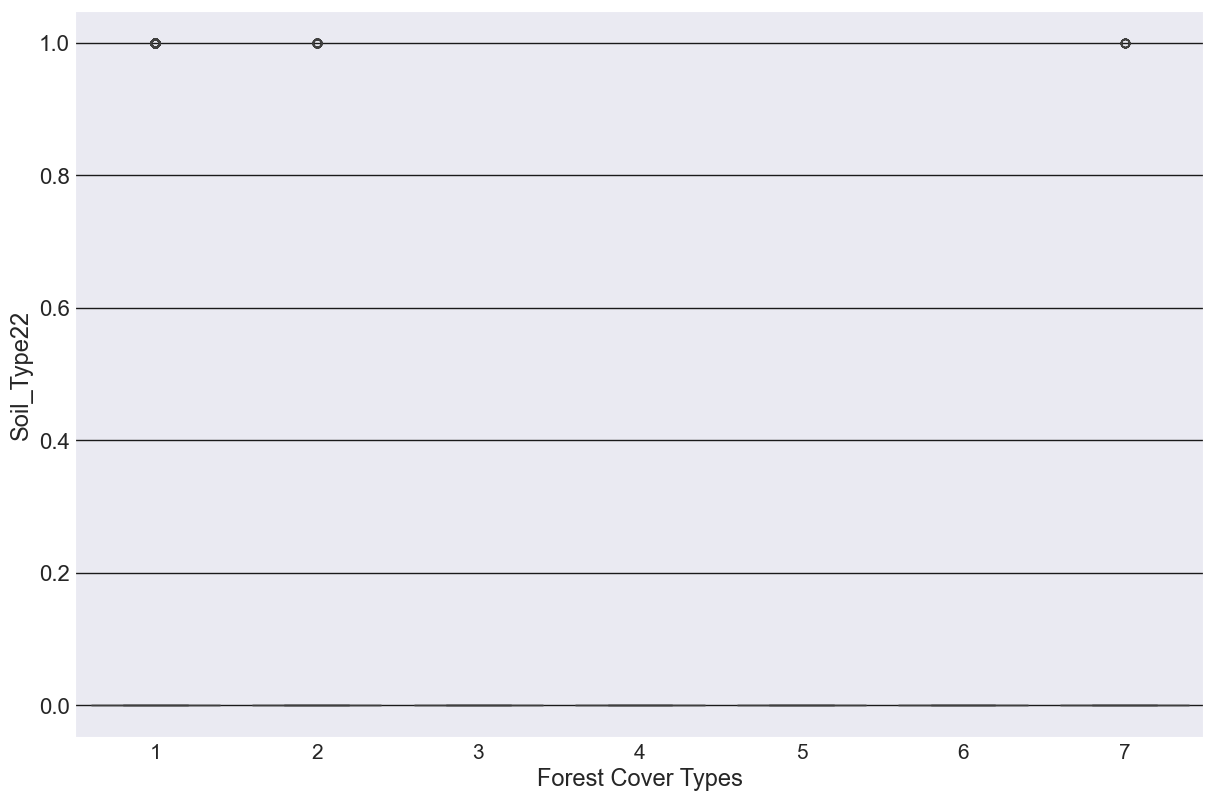

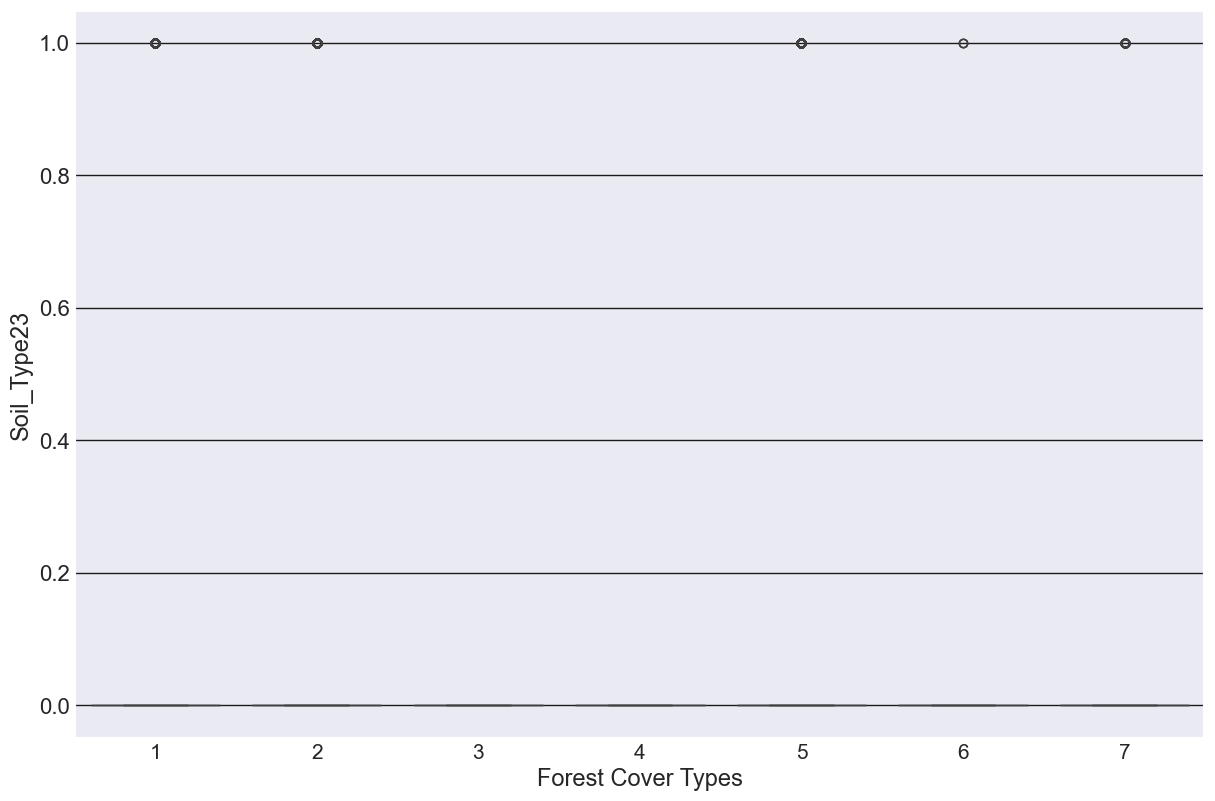

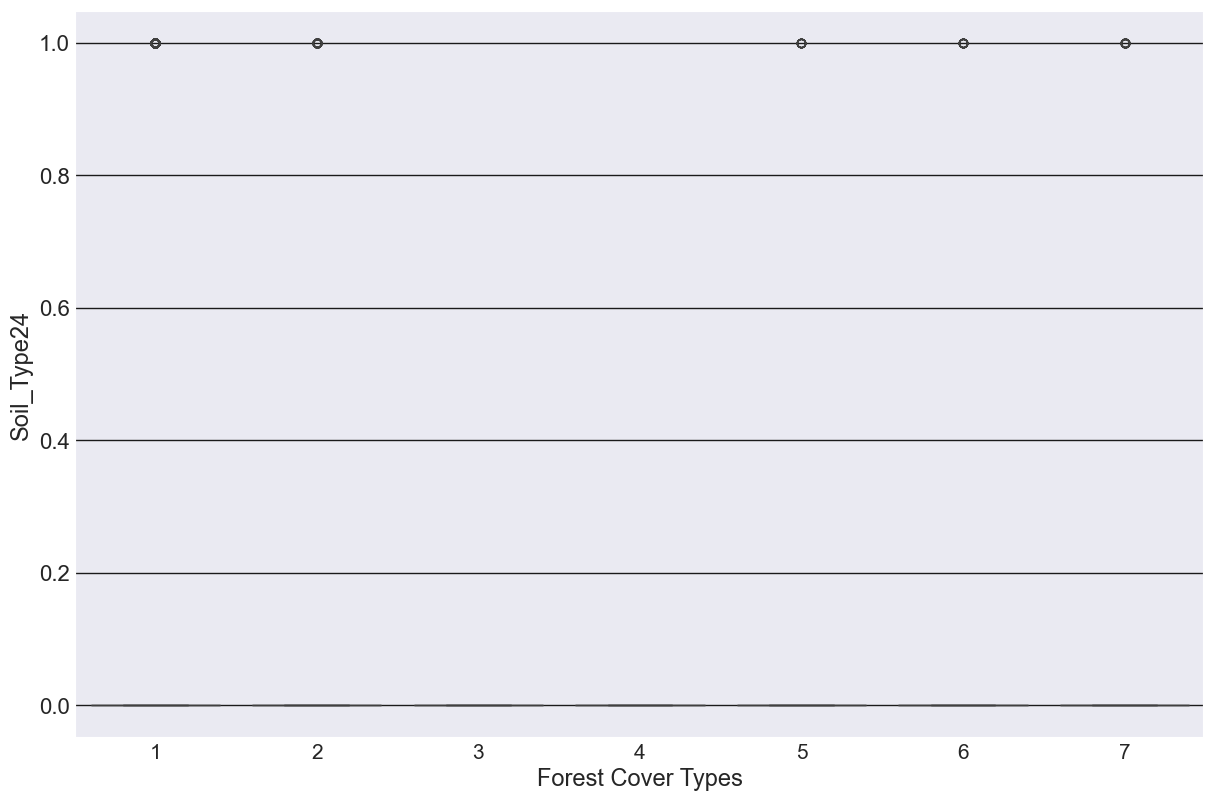

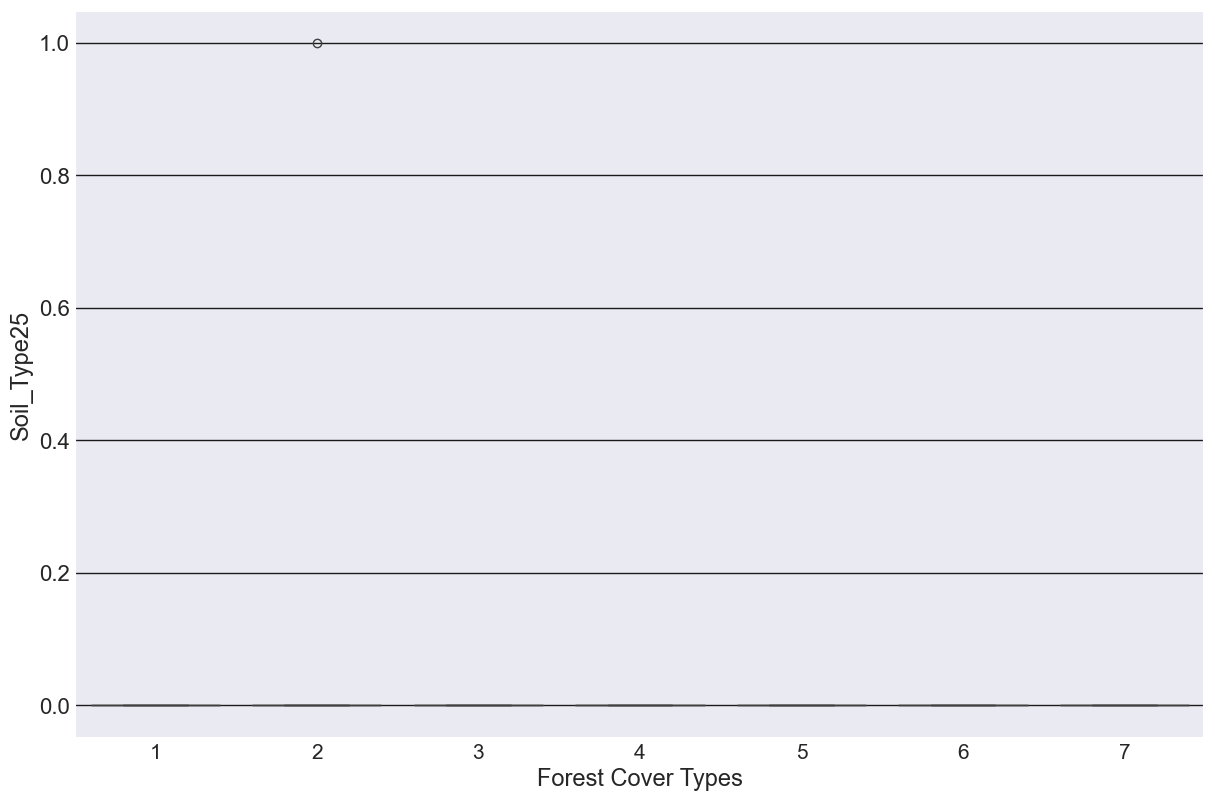

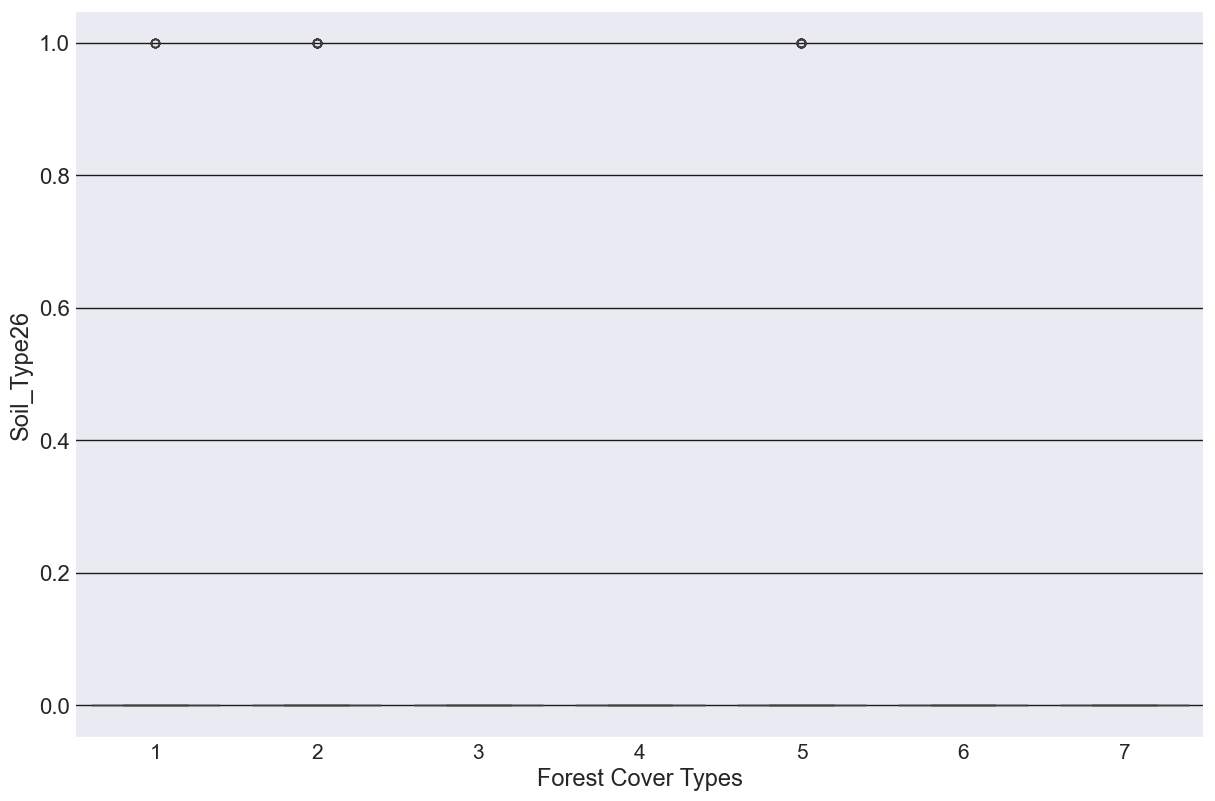

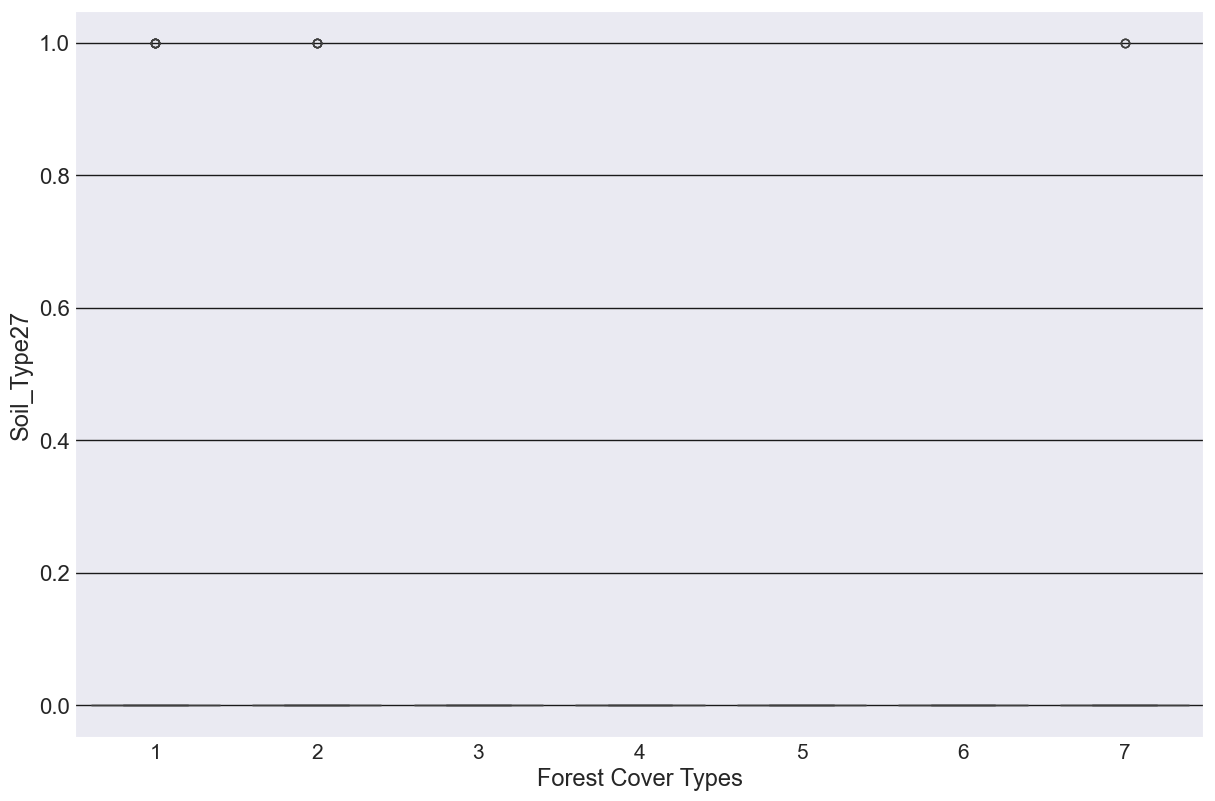

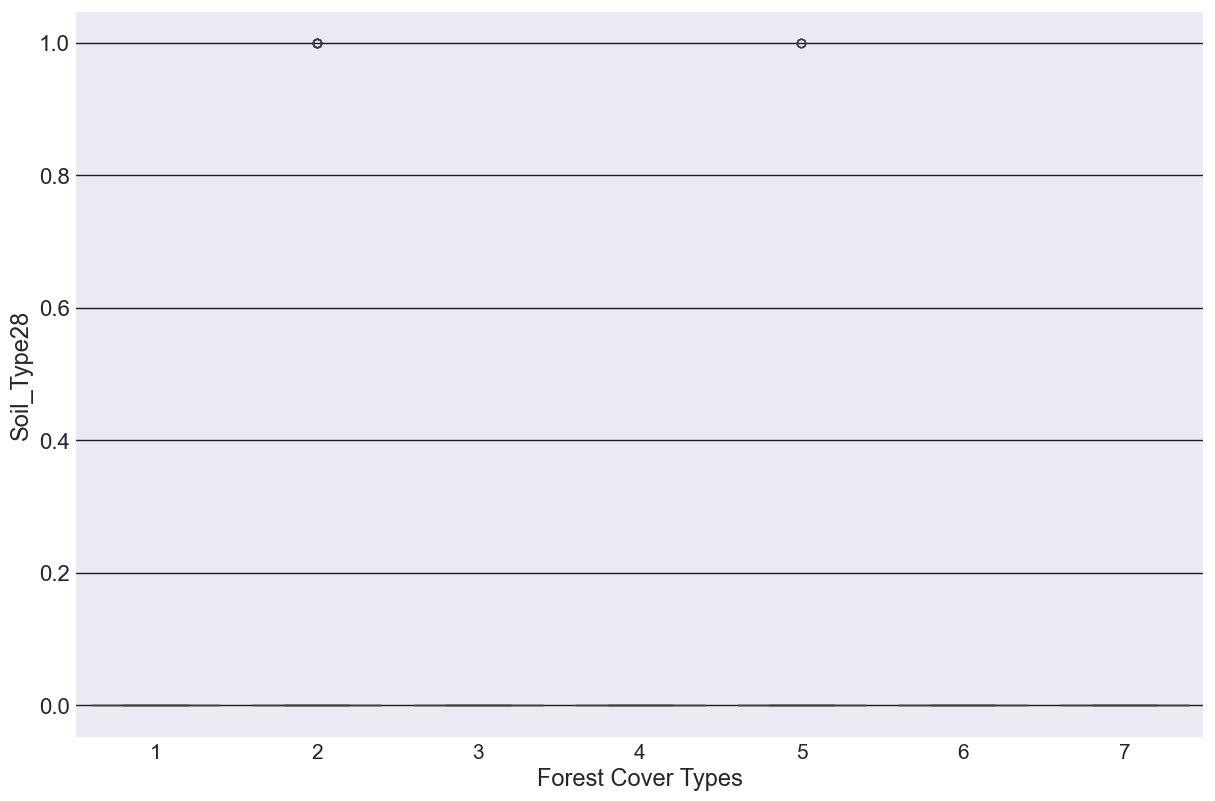

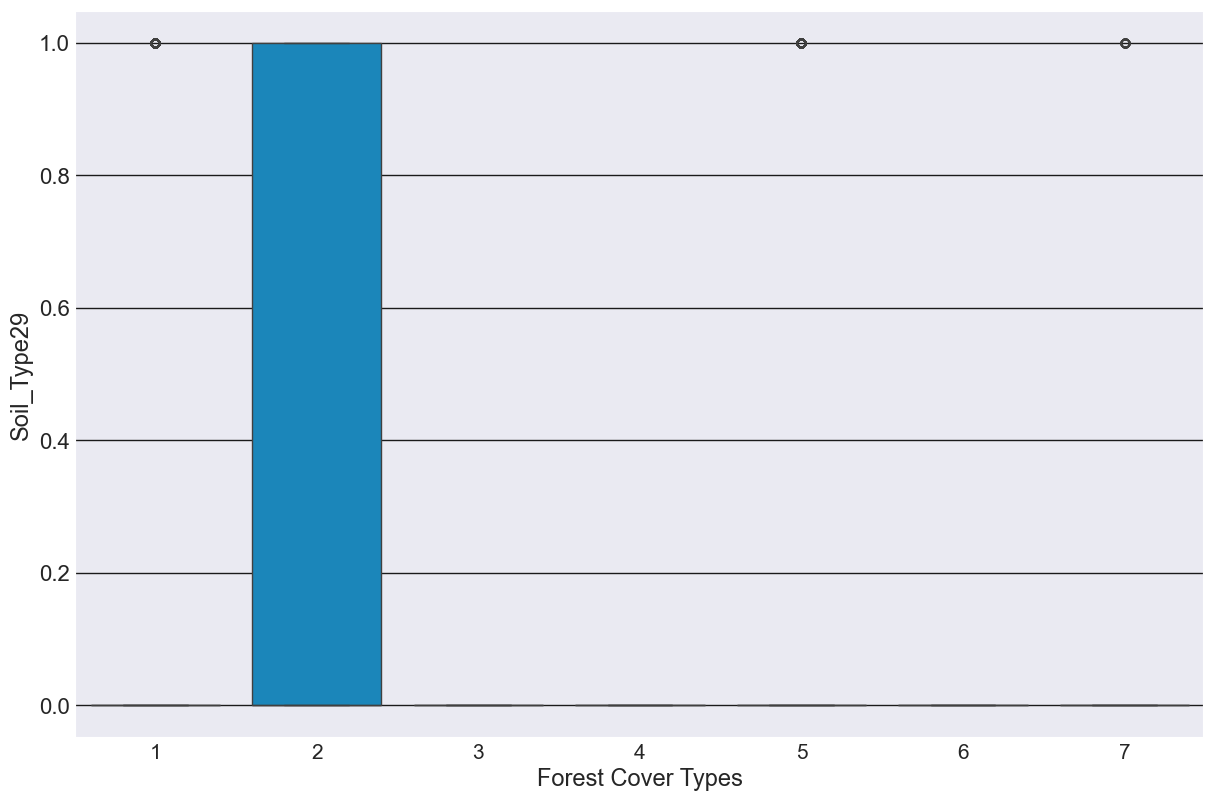

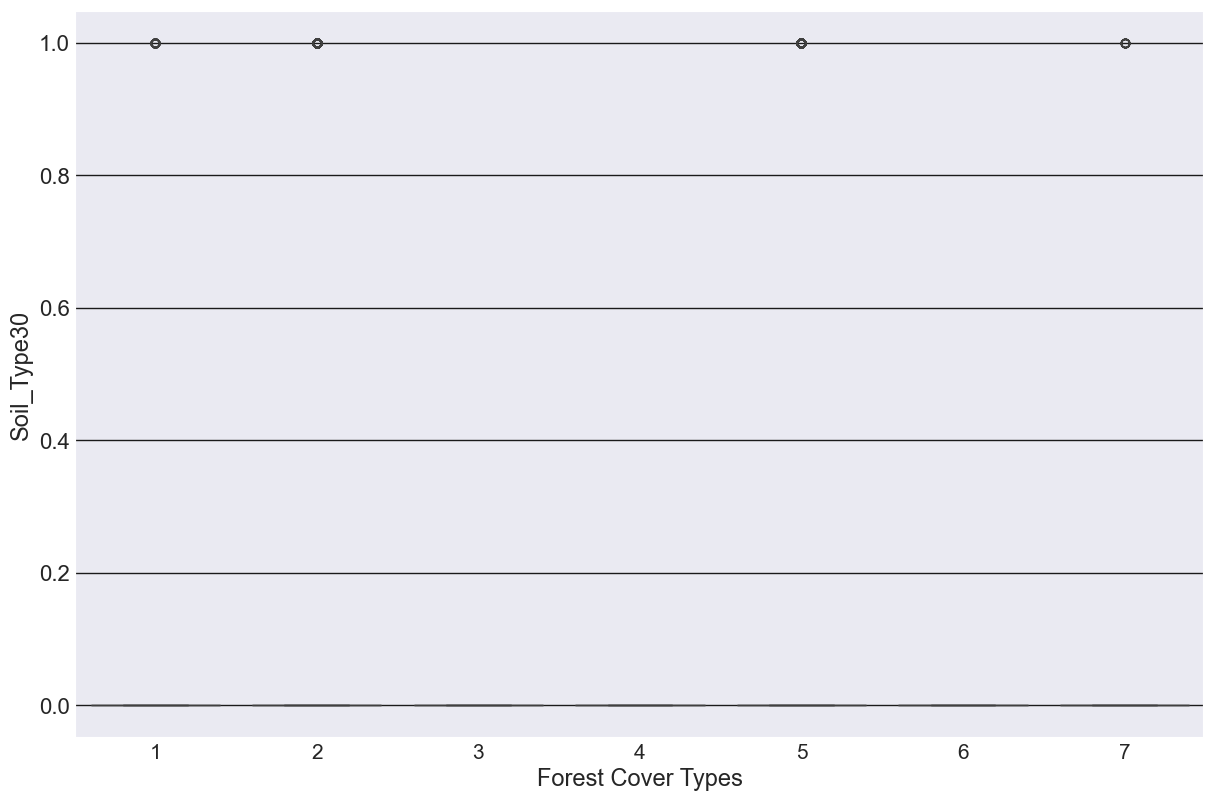

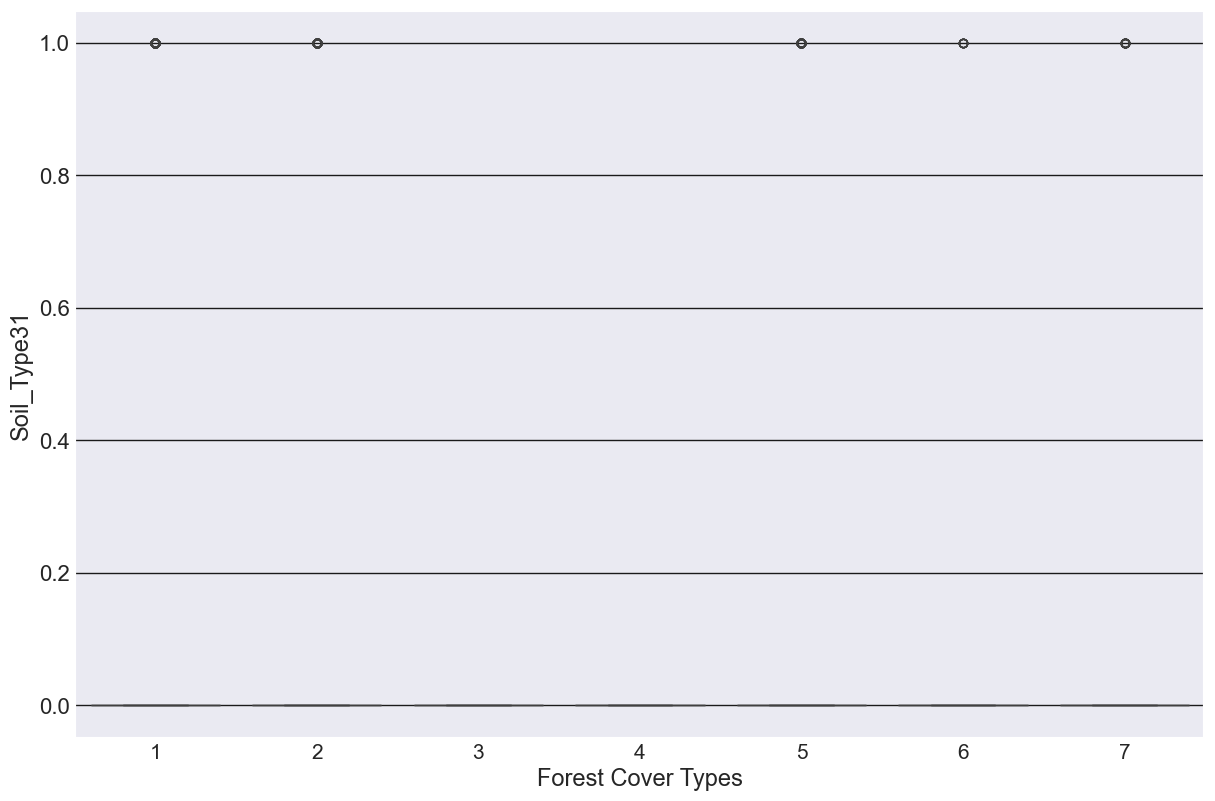

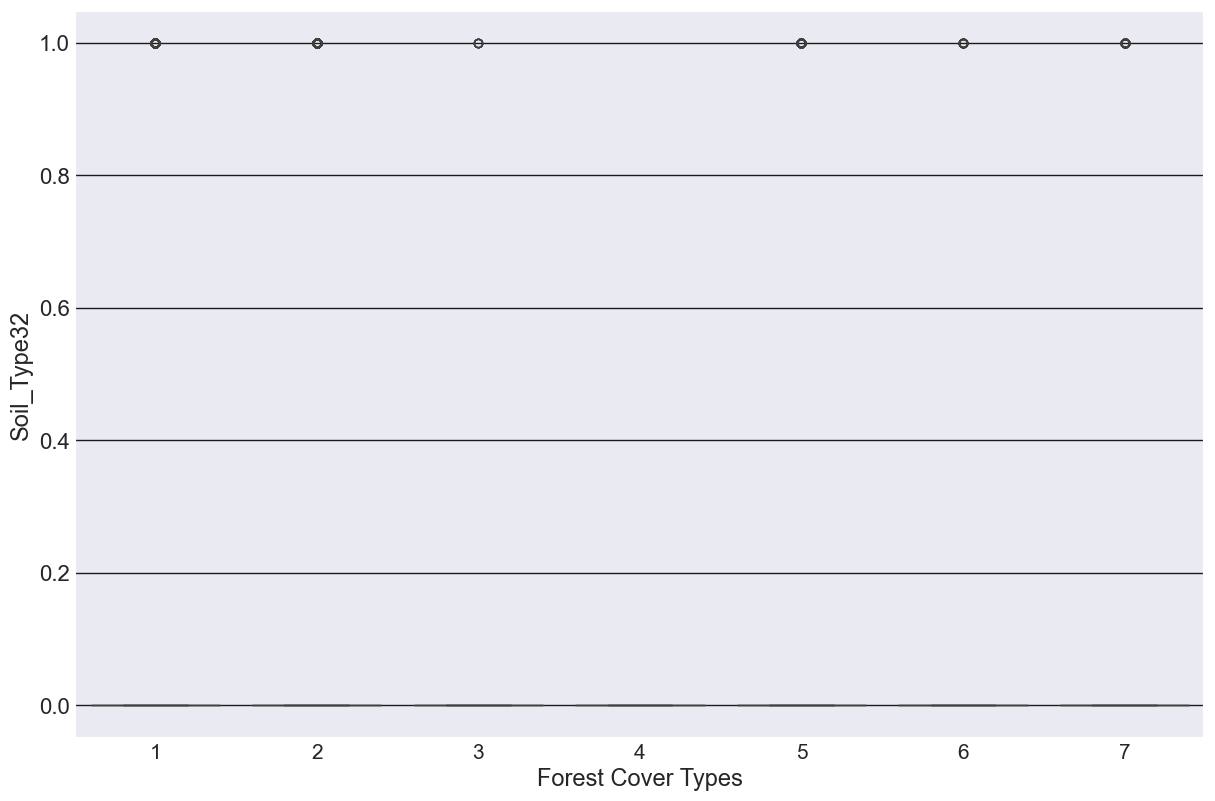

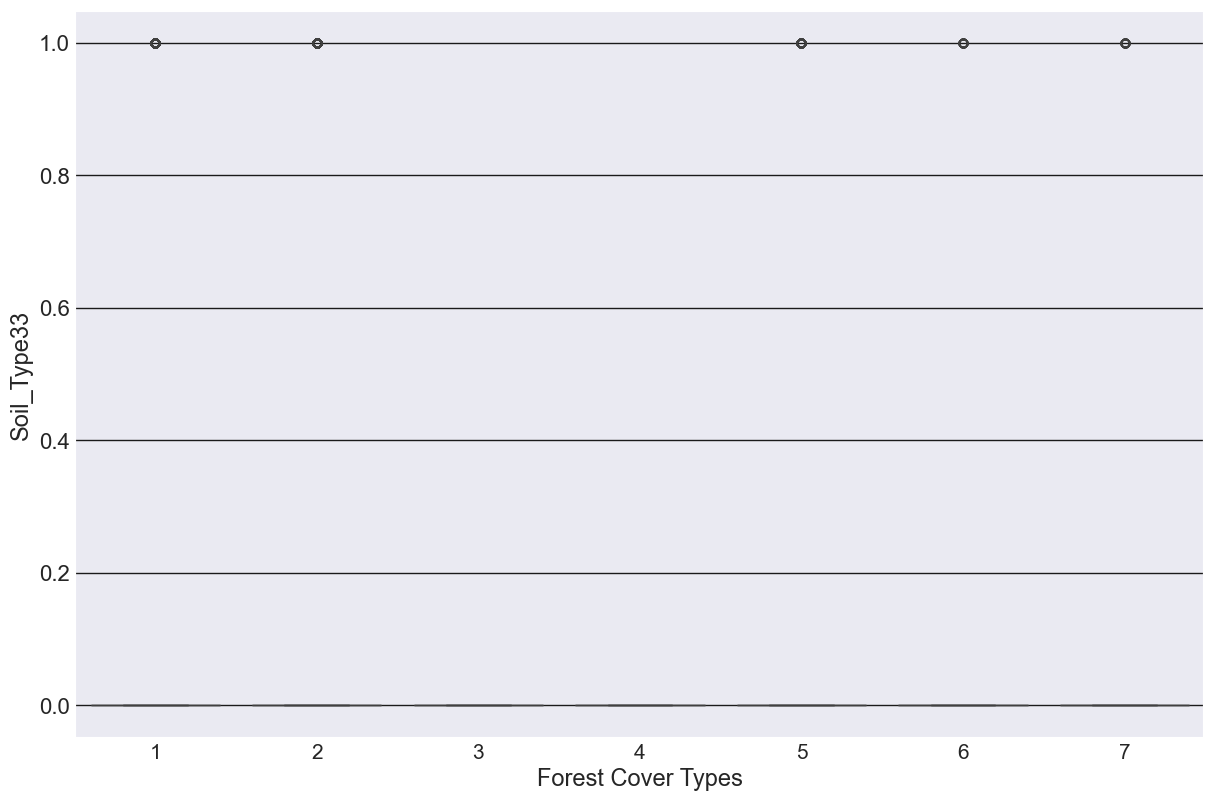

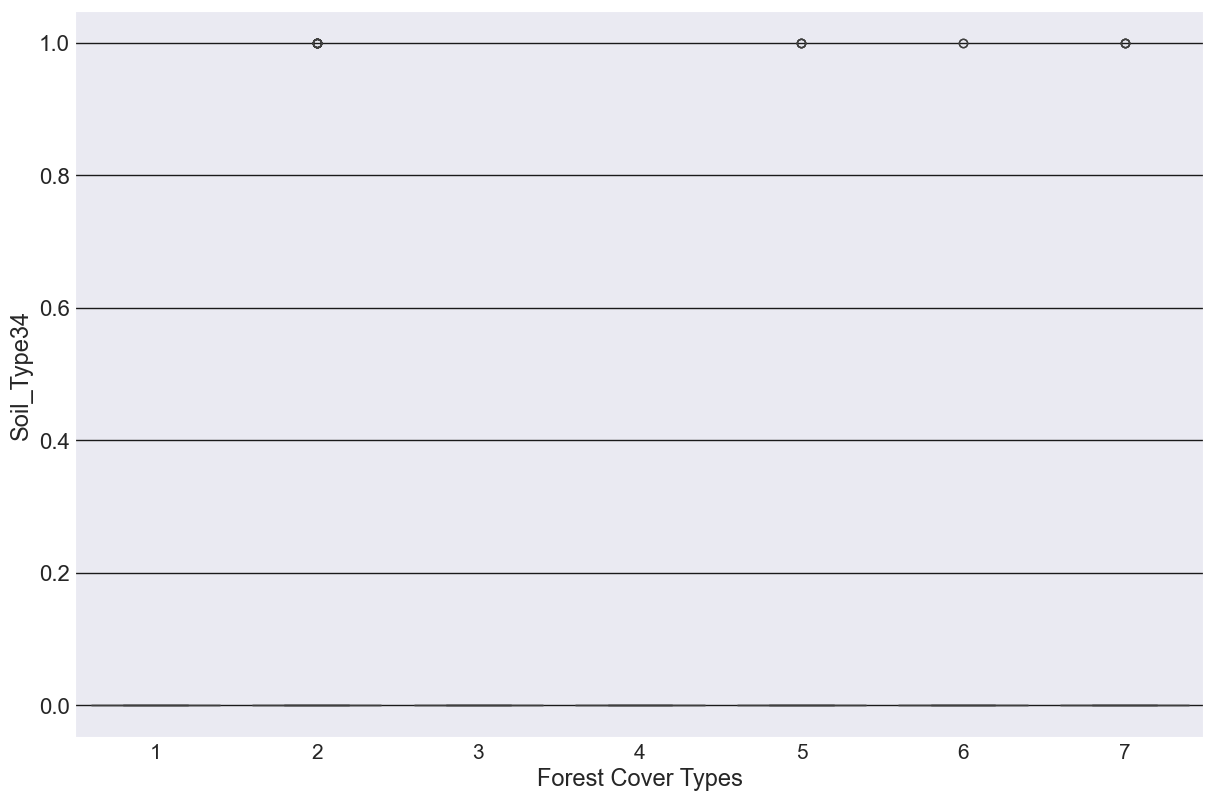

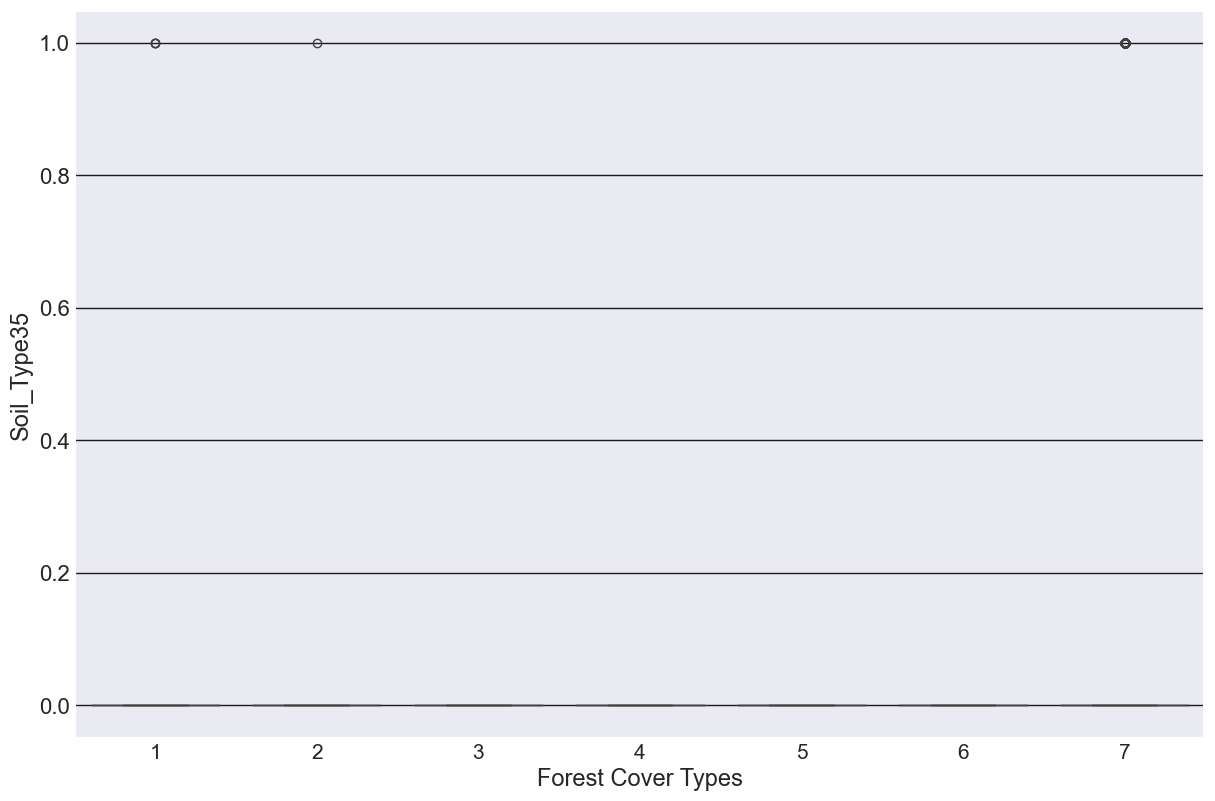

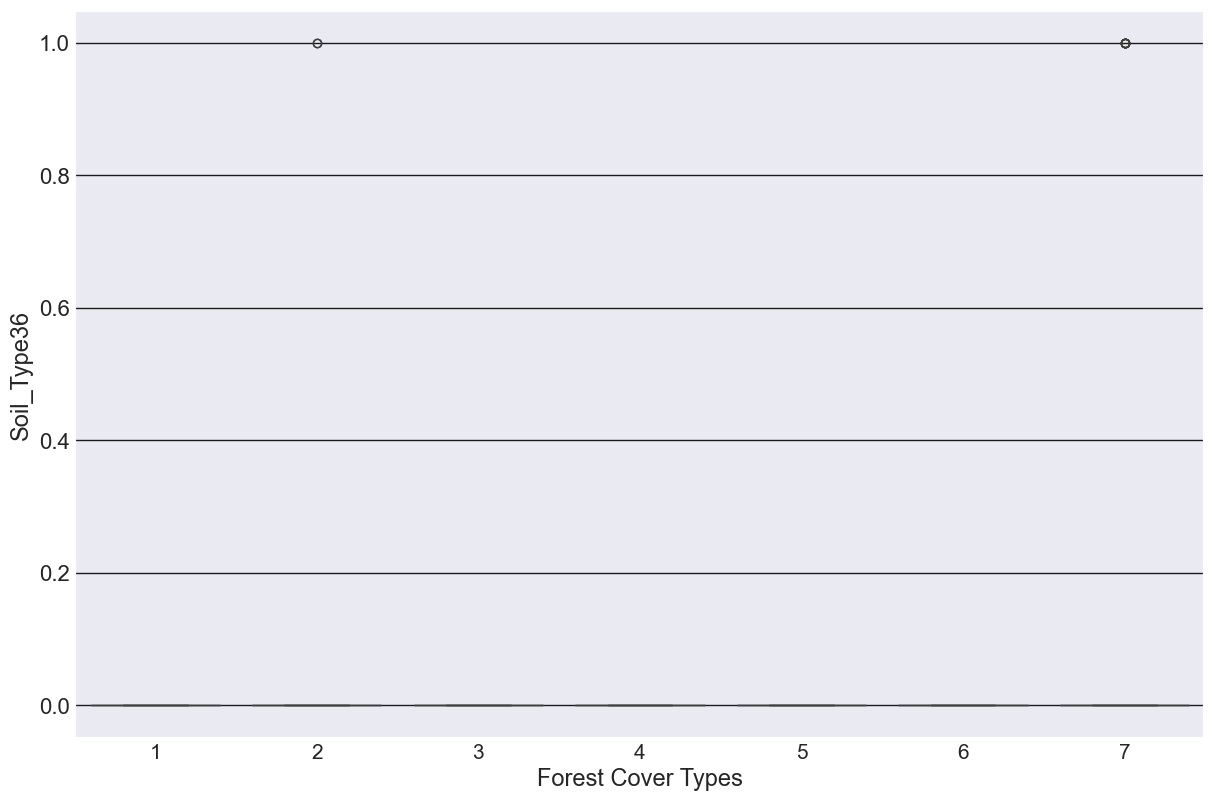

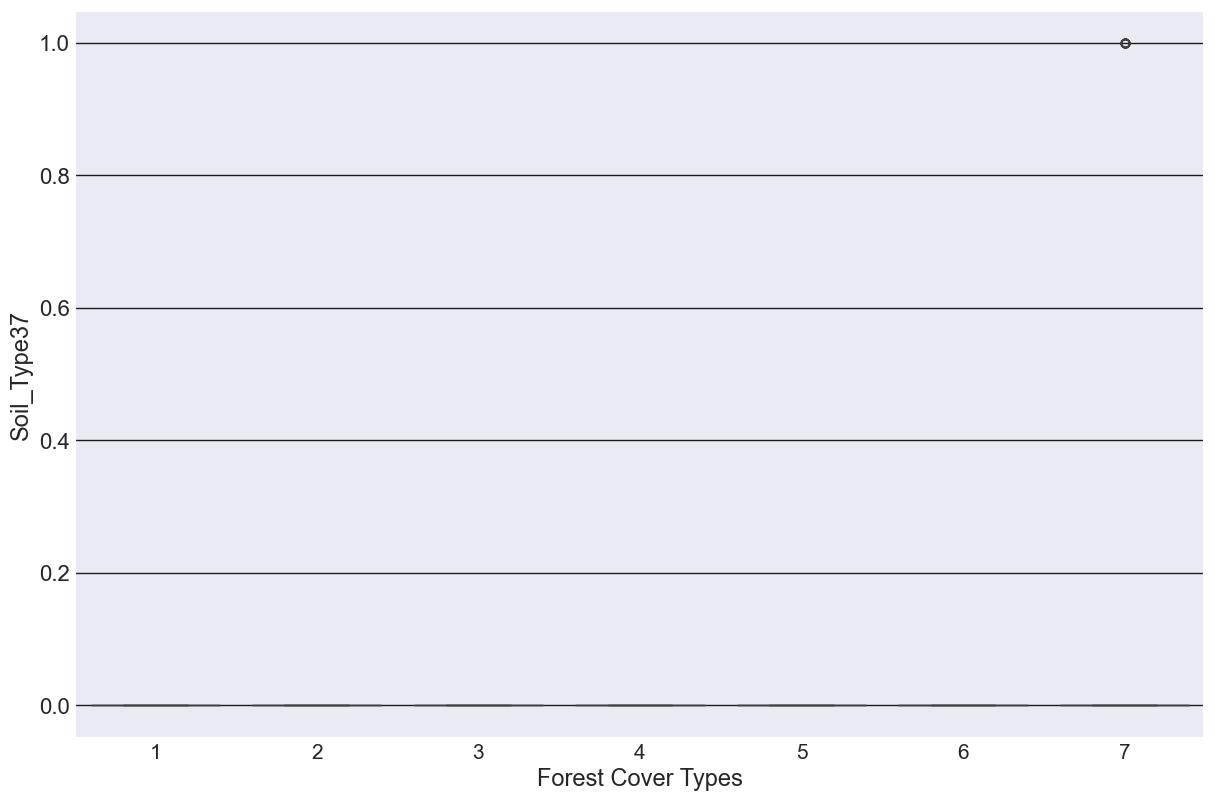

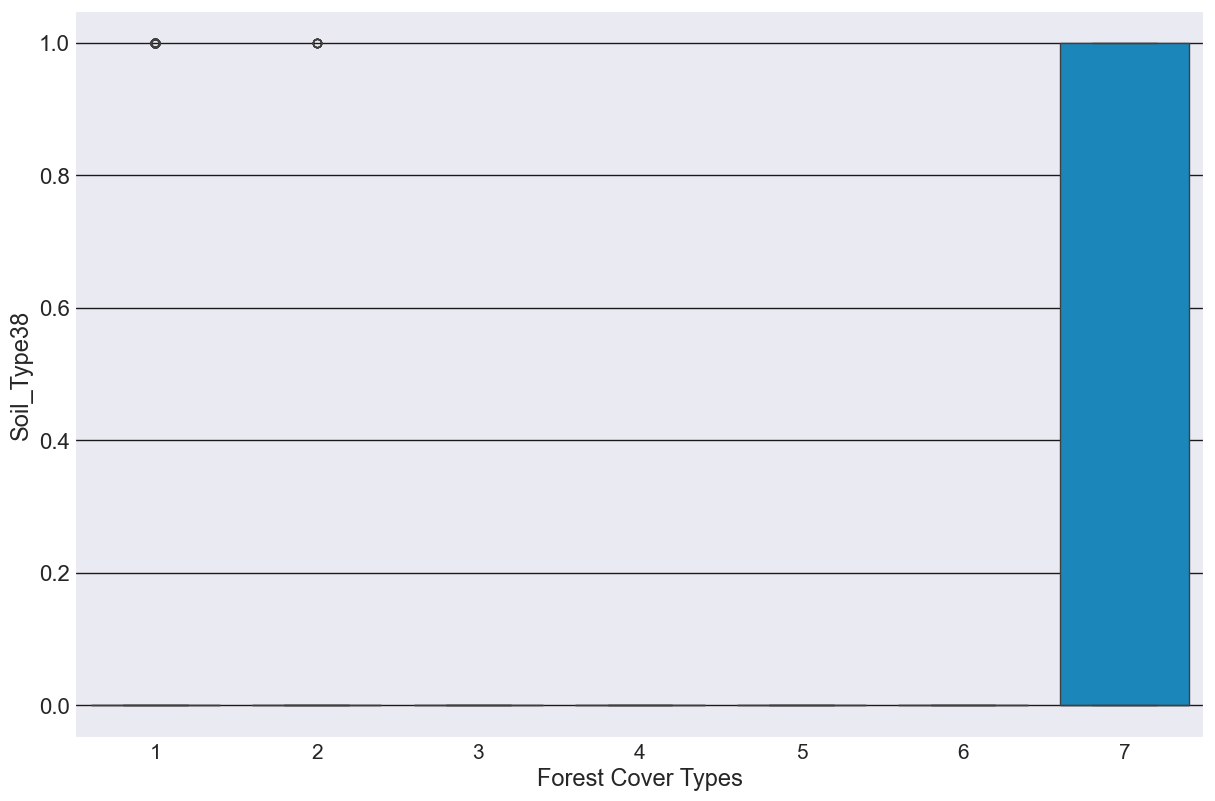

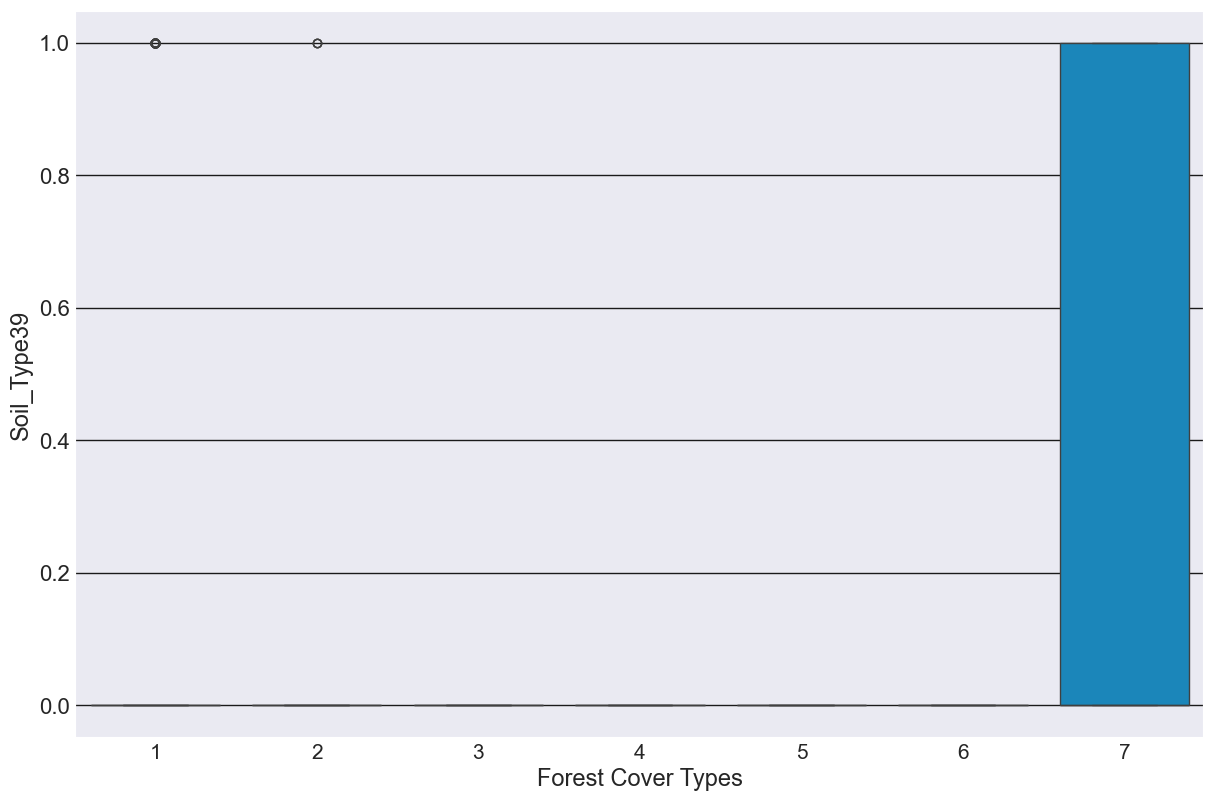

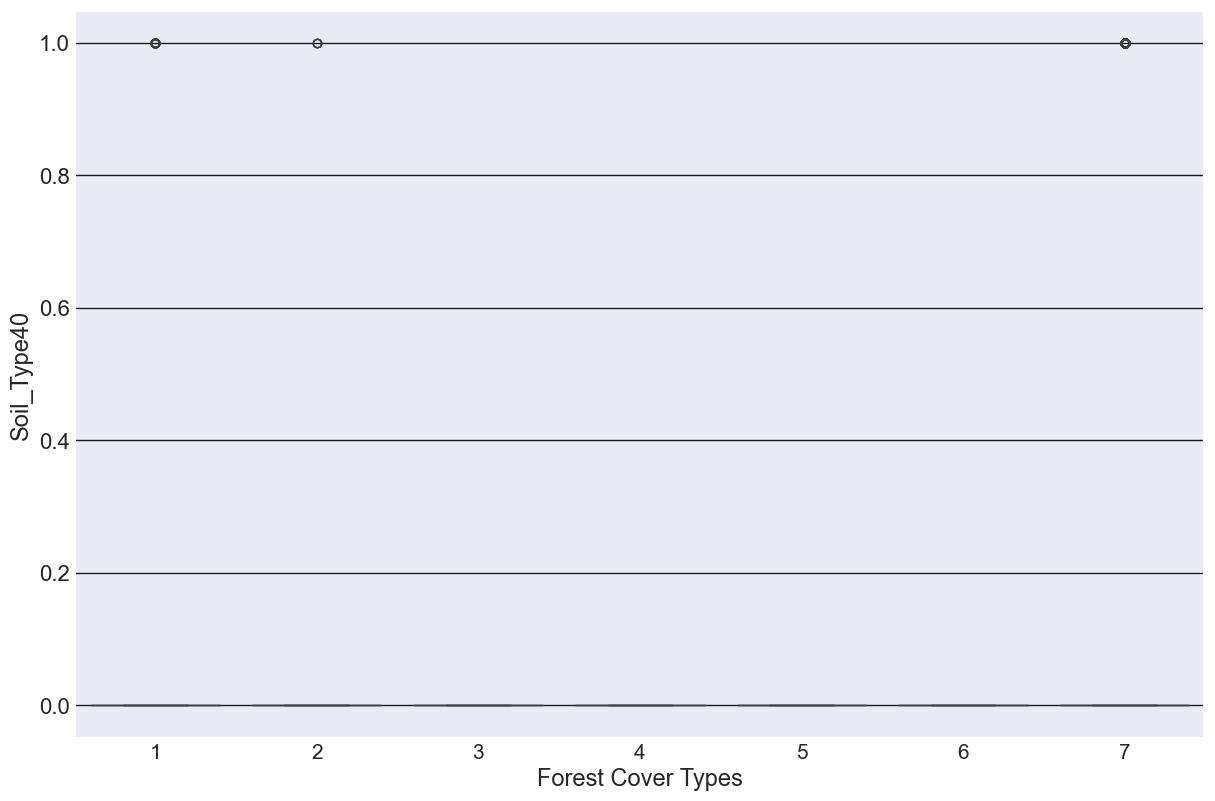

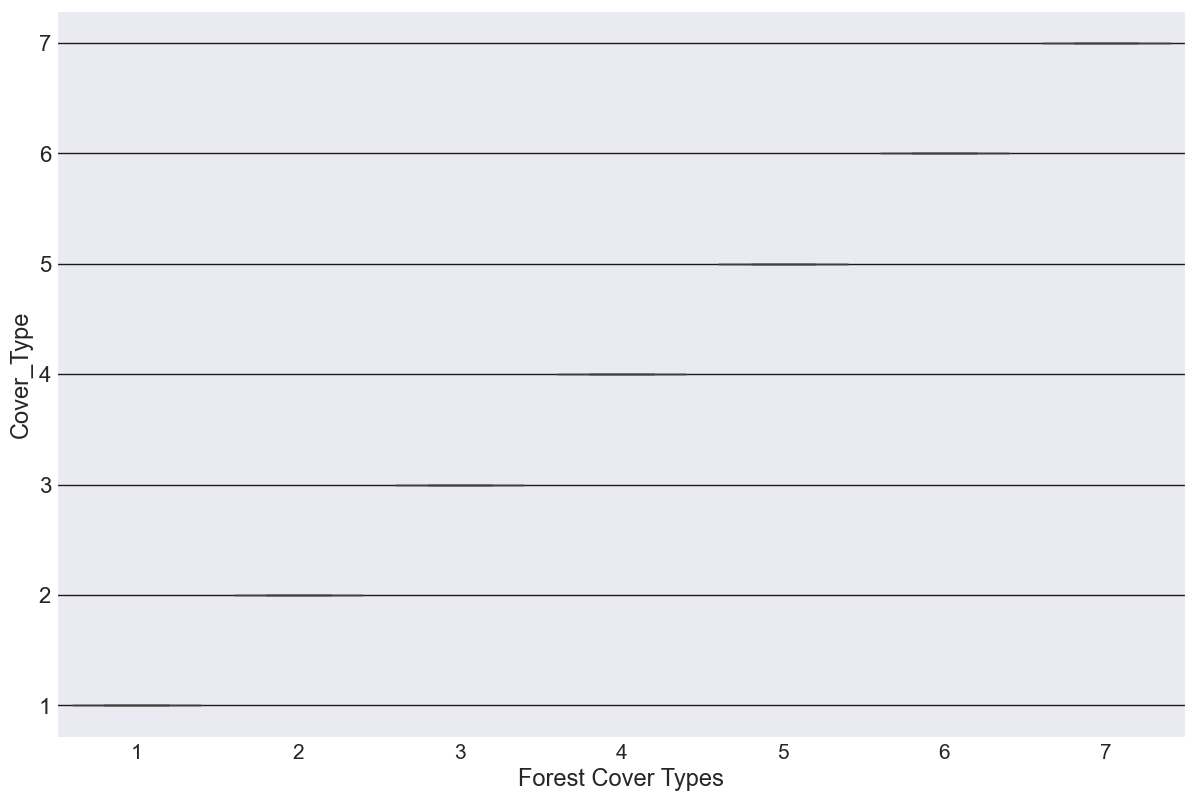

In [199]:
sns.set_style("darkgrid", {'grid.color': '.1'})
target = forest_data['Cover_Type']
features = Soil_data.columns
for i in range(0, len(features)):
    plt.subplots(figsize=(13, 9))  
    sns.boxplot(Soil_data, x=target, y = features[i])
    plt.xticks(size = 15)
    plt.yticks(size = 16)
    plt.xlabel('Forest Cover Types', size = 17)
    plt.ylabel(features[i], size = 17)
    plt.show()

<h3>Categorical Data</h3>
<b>Widerness Areas</b>

<Axes: xlabel='Wilderness_Area1', ylabel='Cover_Type'>

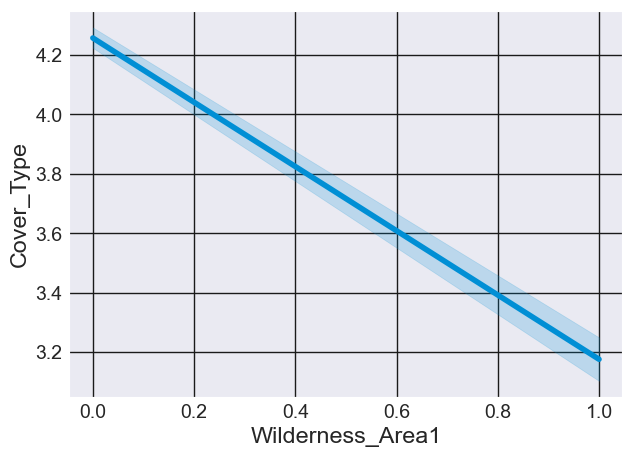

In [200]:
sns.lineplot(x="Wilderness_Area1", y="Cover_Type", data=forest_data)

<Axes: xlabel='Wilderness_Area2', ylabel='Cover_Type'>

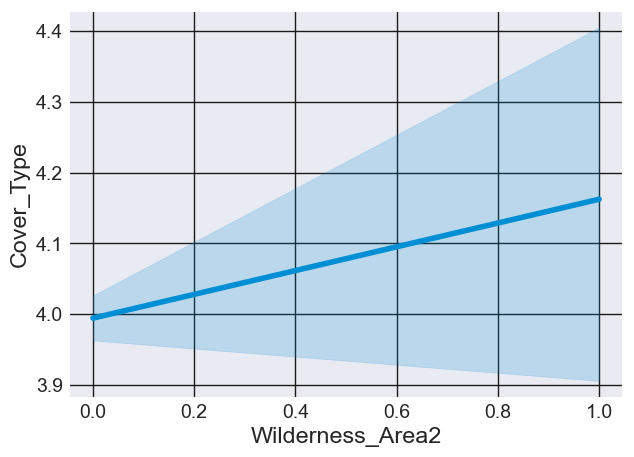

In [201]:
sns.lineplot(x="Wilderness_Area2", y="Cover_Type", data=forest_data)

<Axes: xlabel='Wilderness_Area3', ylabel='Cover_Type'>

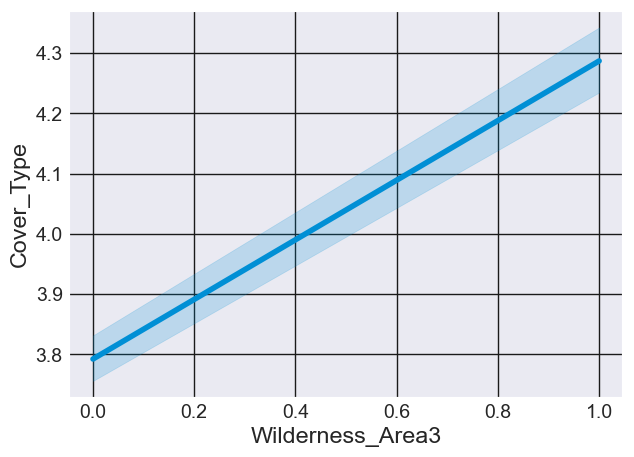

In [202]:
sns.lineplot(x="Wilderness_Area3", y="Cover_Type", data=forest_data)

<Axes: xlabel='Wilderness_Area4', ylabel='Cover_Type'>

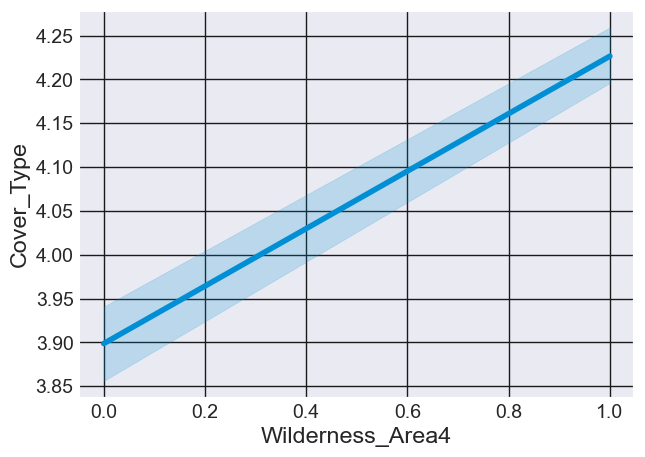

In [203]:
sns.lineplot(x="Wilderness_Area4", y="Cover_Type", data=forest_data)

<h3>Soil Types

<Axes: xlabel='Soil_Type1', ylabel='Cover_Type'>

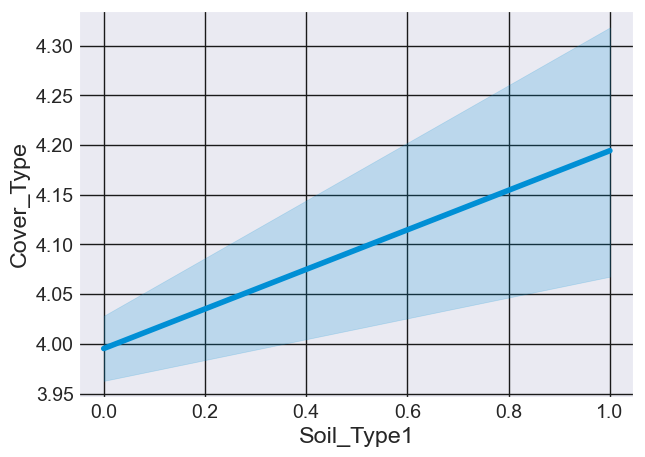

In [204]:
sns.lineplot(x="Soil_Type1", y="Cover_Type", data=forest_data)


<Axes: xlabel='Soil_Type2', ylabel='Cover_Type'>

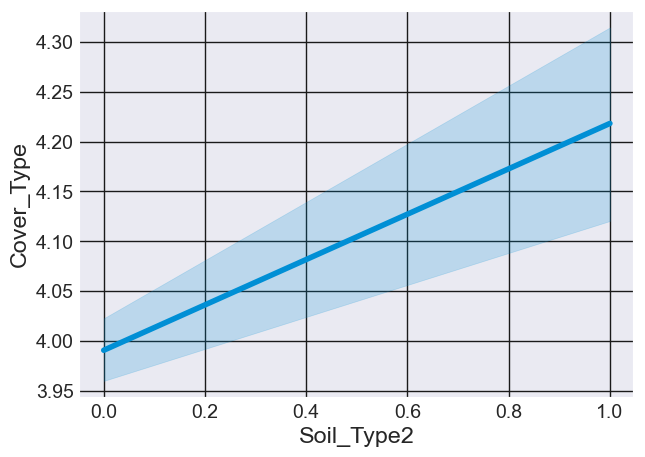

In [205]:
sns.lineplot(x="Soil_Type2", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type3', ylabel='Cover_Type'>

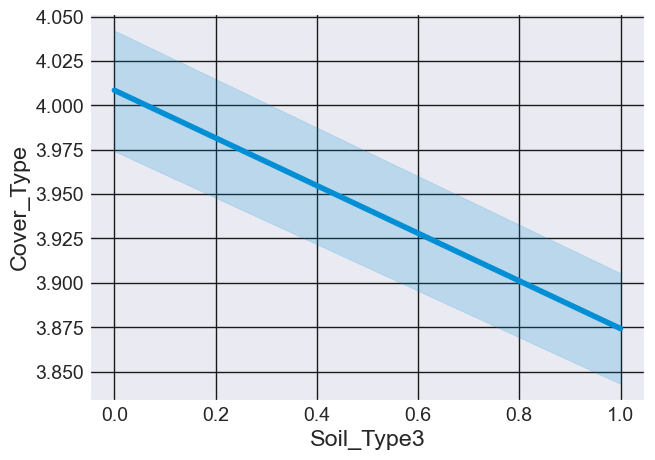

In [206]:
sns.lineplot(x="Soil_Type3", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type4', ylabel='Cover_Type'>

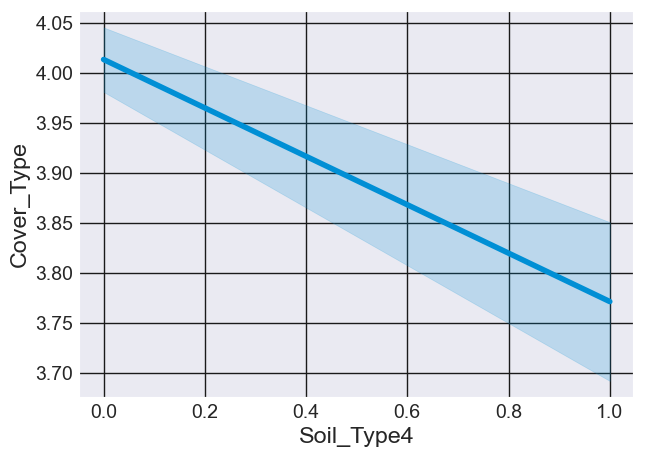

In [207]:
sns.lineplot(x="Soil_Type4", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type5', ylabel='Cover_Type'>

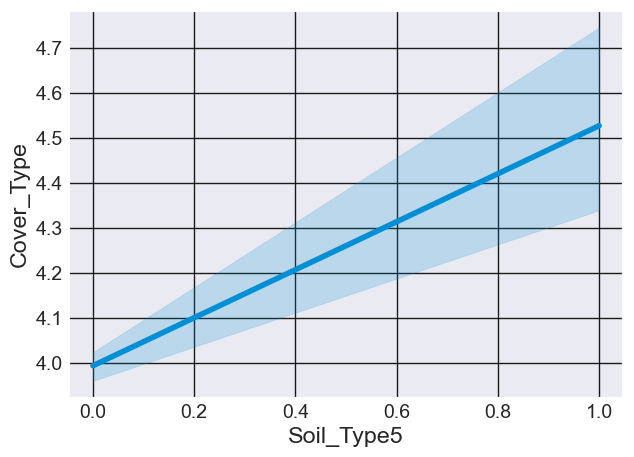

In [208]:
sns.lineplot(x="Soil_Type5", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type6', ylabel='Cover_Type'>

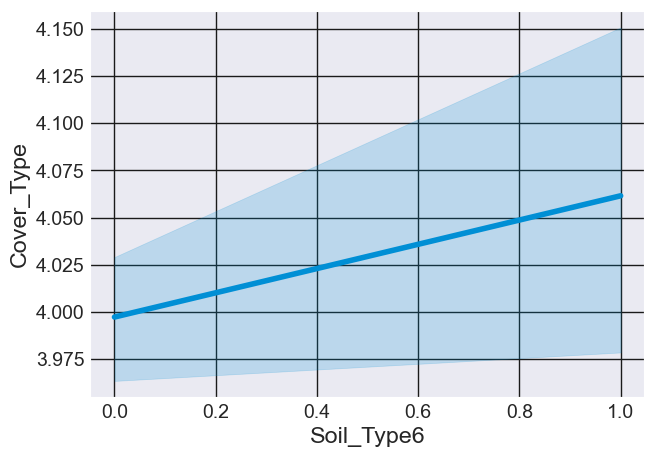

In [209]:
sns.lineplot(x="Soil_Type6", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type7', ylabel='Cover_Type'>

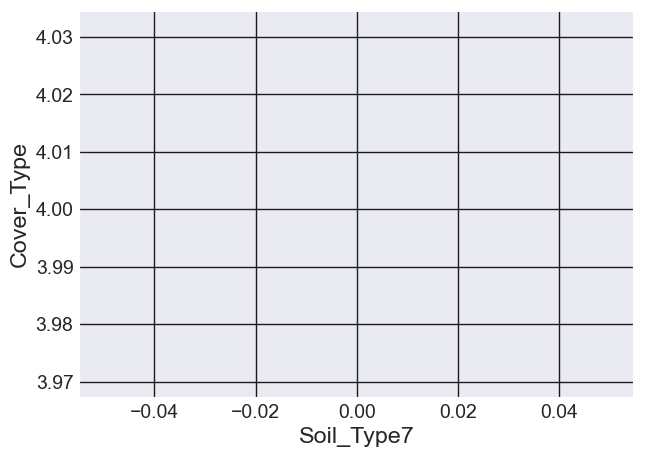

In [210]:
sns.lineplot(x="Soil_Type7", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type8', ylabel='Cover_Type'>

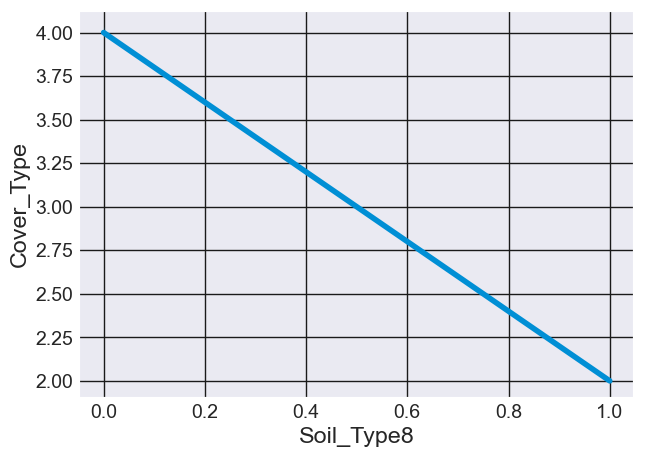

In [211]:
sns.lineplot(x="Soil_Type8", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type9', ylabel='Cover_Type'>

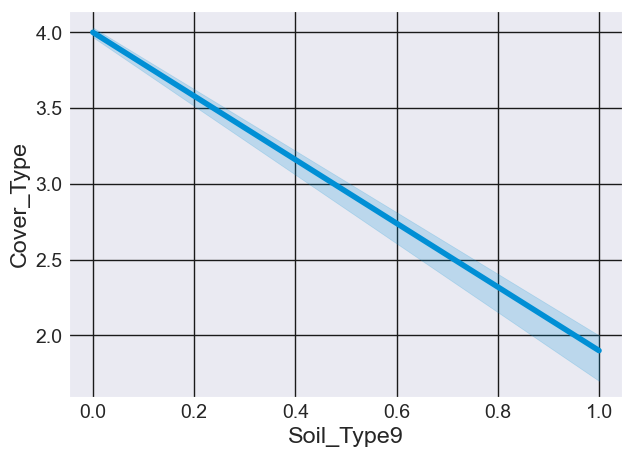

In [212]:
sns.lineplot(x="Soil_Type9", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type10', ylabel='Cover_Type'>

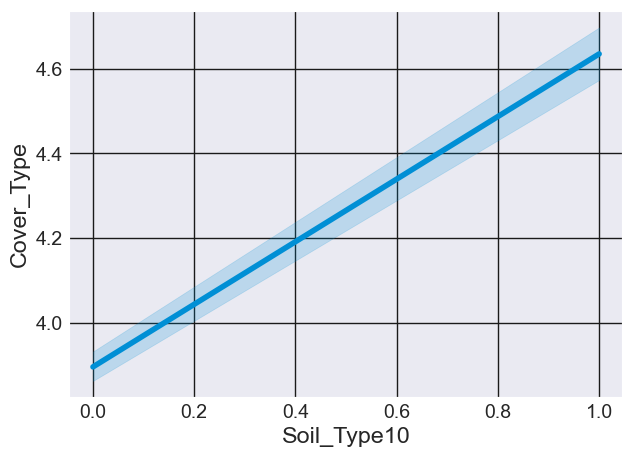

In [213]:
sns.lineplot(x="Soil_Type10", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type11', ylabel='Cover_Type'>

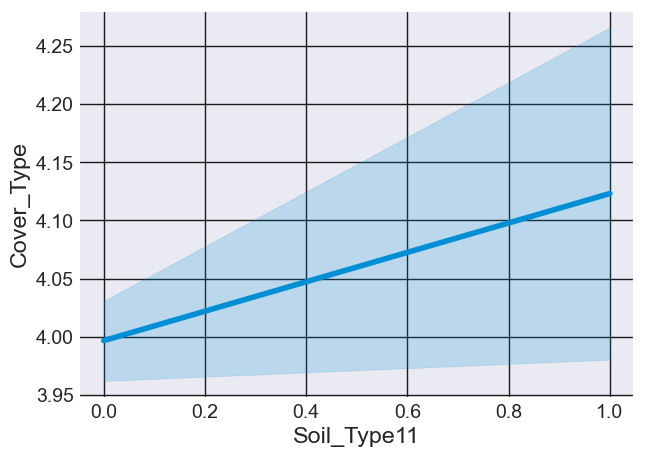

In [214]:
sns.lineplot(x="Soil_Type11", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type12', ylabel='Cover_Type'>

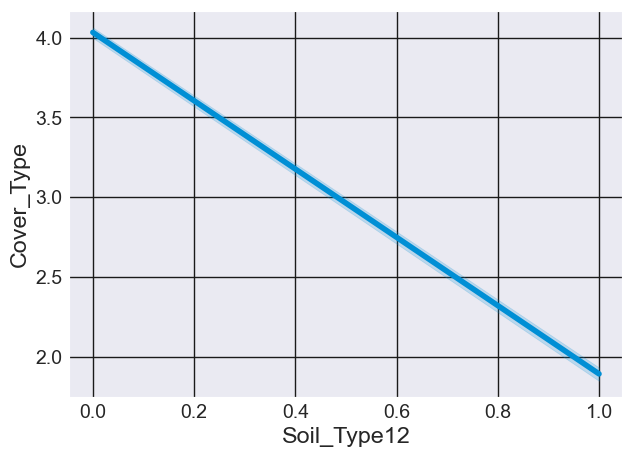

In [215]:
sns.lineplot(x="Soil_Type12", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type13', ylabel='Cover_Type'>

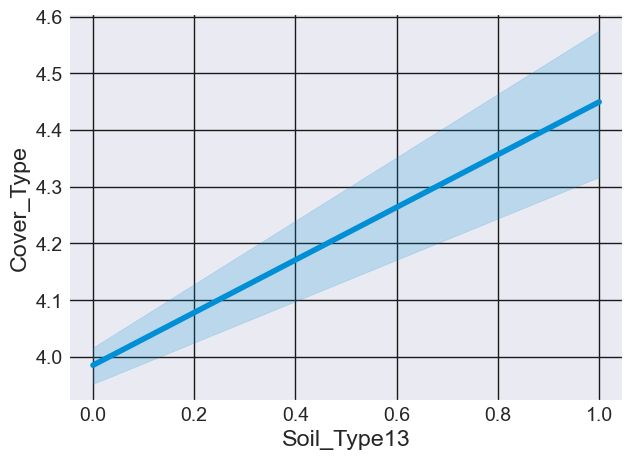

In [216]:
sns.lineplot(x="Soil_Type13", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type14', ylabel='Cover_Type'>

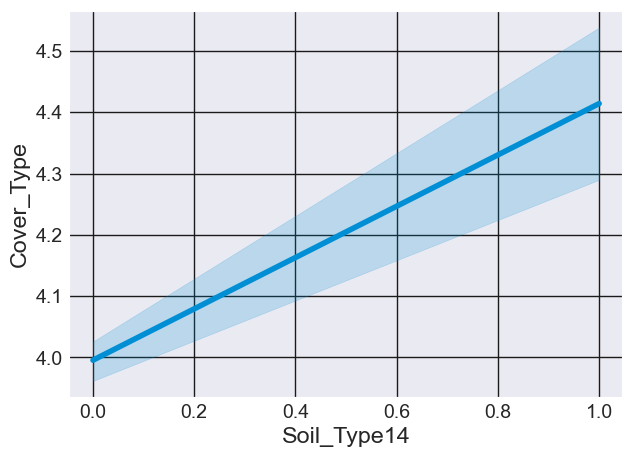

In [217]:
sns.lineplot(x="Soil_Type14", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type15', ylabel='Cover_Type'>

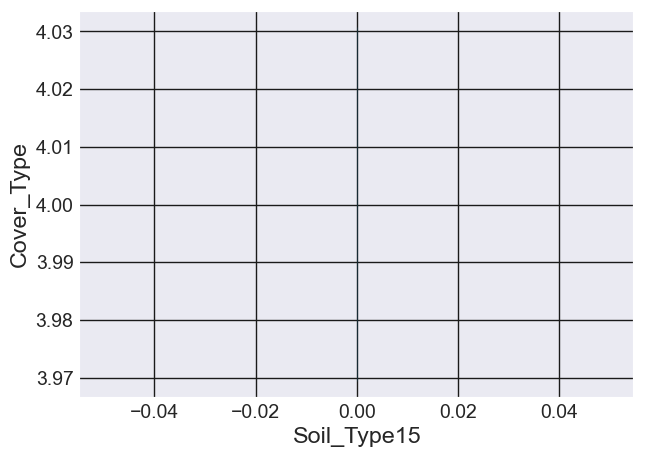

In [218]:
sns.lineplot(x="Soil_Type15", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type16', ylabel='Cover_Type'>

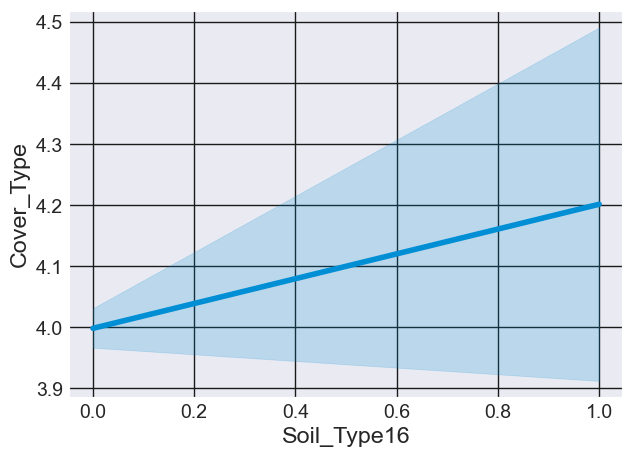

In [219]:
sns.lineplot(x="Soil_Type16", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type17', ylabel='Cover_Type'>

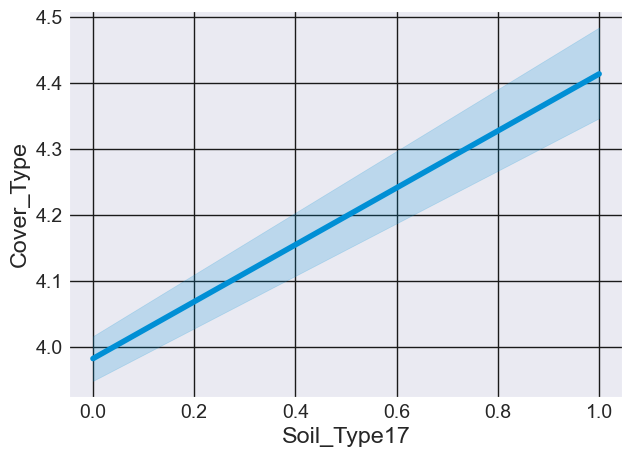

In [220]:
sns.lineplot(x="Soil_Type17", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type18', ylabel='Cover_Type'>

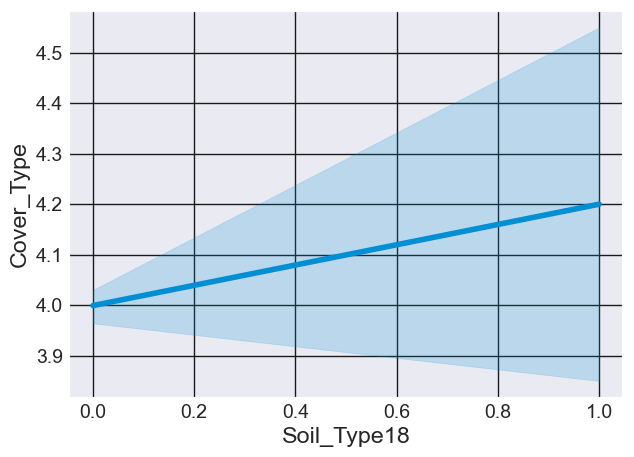

In [221]:
sns.lineplot(x="Soil_Type18", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type19', ylabel='Cover_Type'>

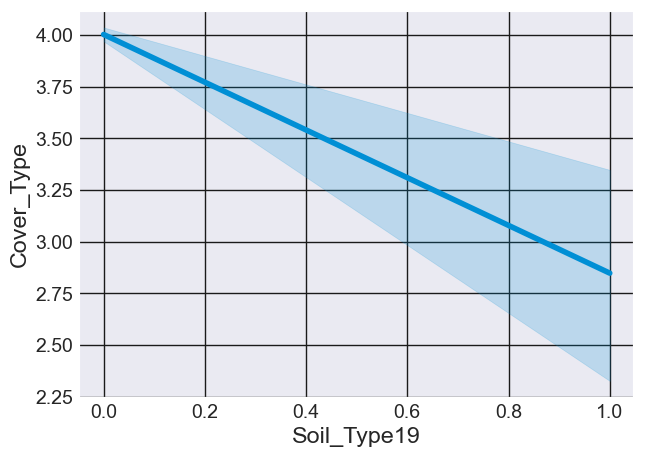

In [222]:
sns.lineplot(x="Soil_Type19", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type20', ylabel='Cover_Type'>

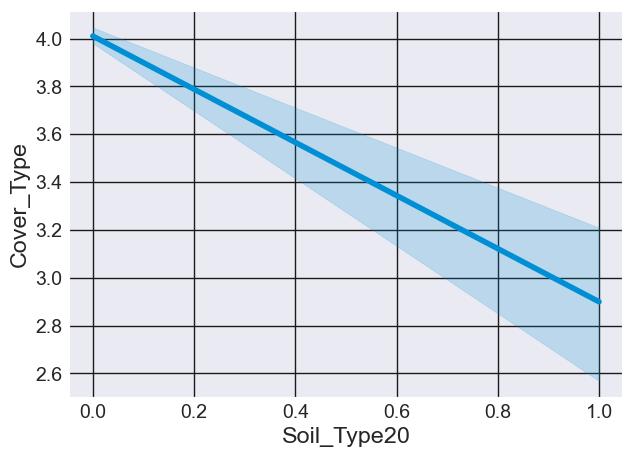

In [223]:
sns.lineplot(x="Soil_Type20", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type21', ylabel='Cover_Type'>

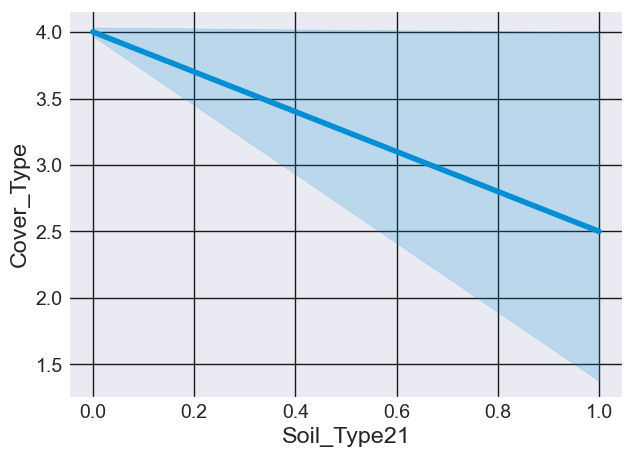

In [224]:
sns.lineplot(x="Soil_Type21", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type22', ylabel='Cover_Type'>

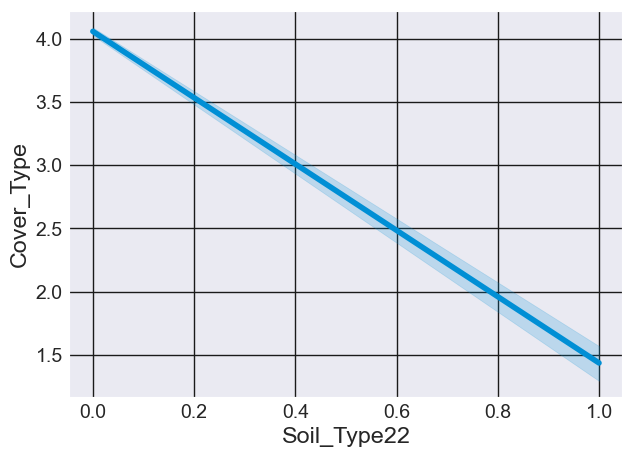

In [225]:
sns.lineplot(x="Soil_Type22", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type23', ylabel='Cover_Type'>

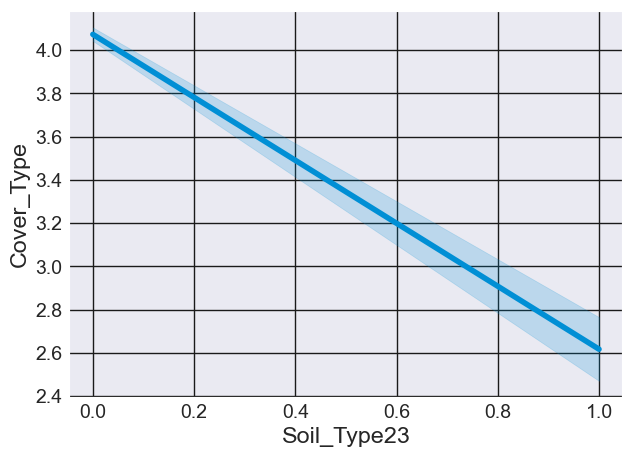

In [226]:
sns.lineplot(x="Soil_Type23", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type24', ylabel='Cover_Type'>

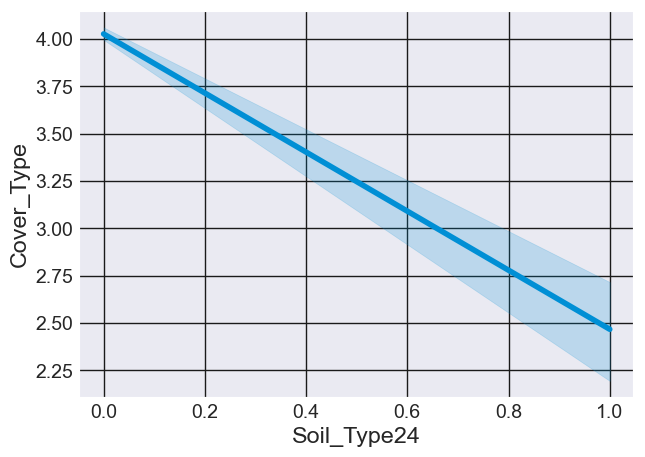

In [227]:
sns.lineplot(x="Soil_Type24", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type25', ylabel='Cover_Type'>

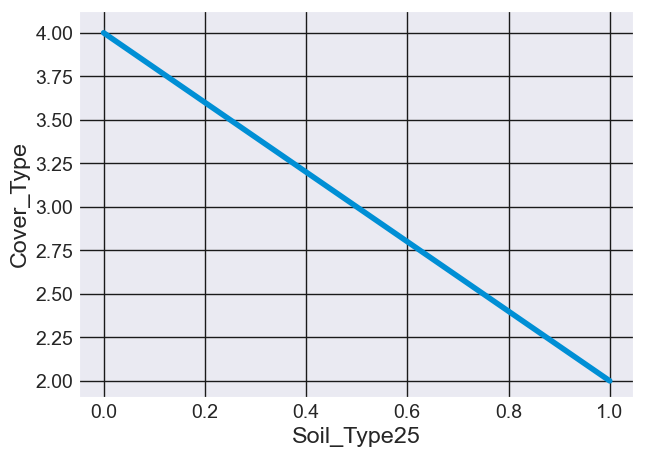

In [228]:
sns.lineplot(x="Soil_Type25", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type26', ylabel='Cover_Type'>

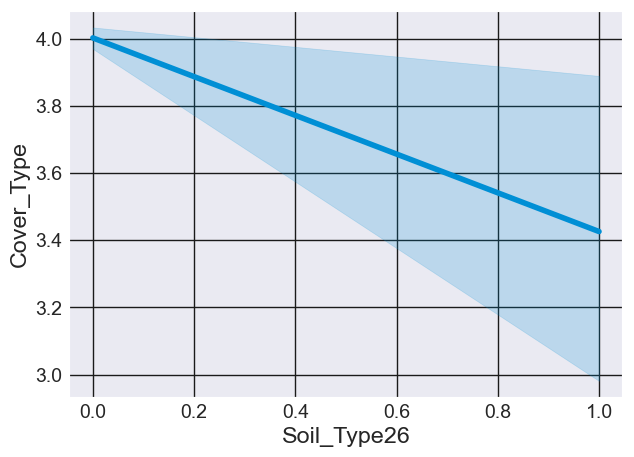

In [229]:
sns.lineplot(x="Soil_Type26", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type27', ylabel='Cover_Type'>

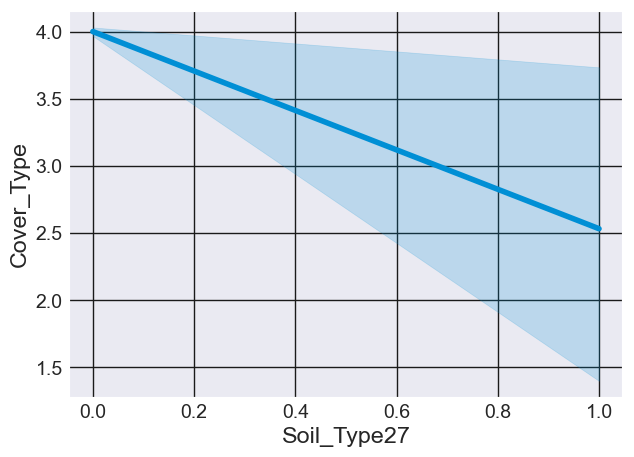

In [230]:
sns.lineplot(x="Soil_Type27", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type28', ylabel='Cover_Type'>

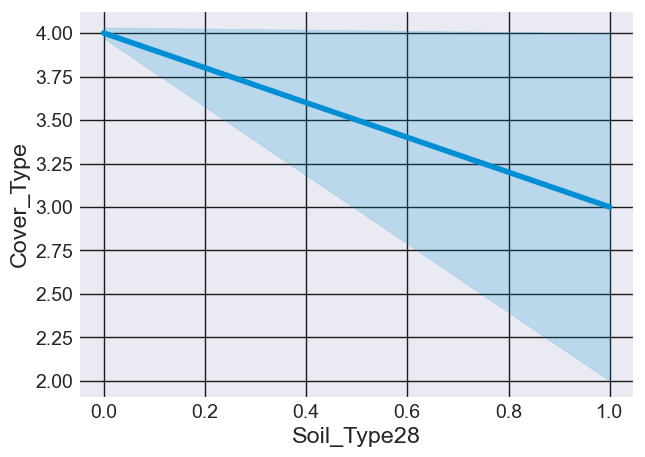

In [231]:
sns.lineplot(x="Soil_Type28", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type29', ylabel='Cover_Type'>

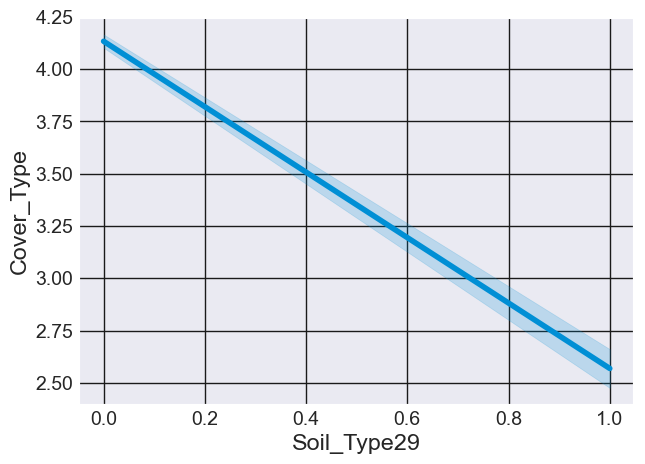

In [232]:
sns.lineplot(x="Soil_Type29", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type30', ylabel='Cover_Type'>

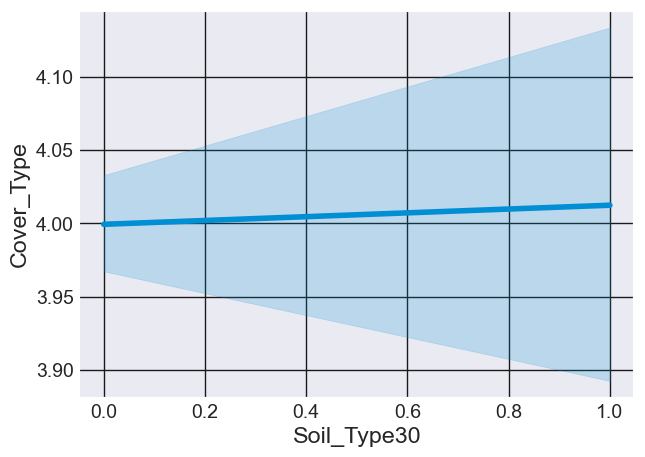

In [233]:
sns.lineplot(x="Soil_Type30", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type31', ylabel='Cover_Type'>

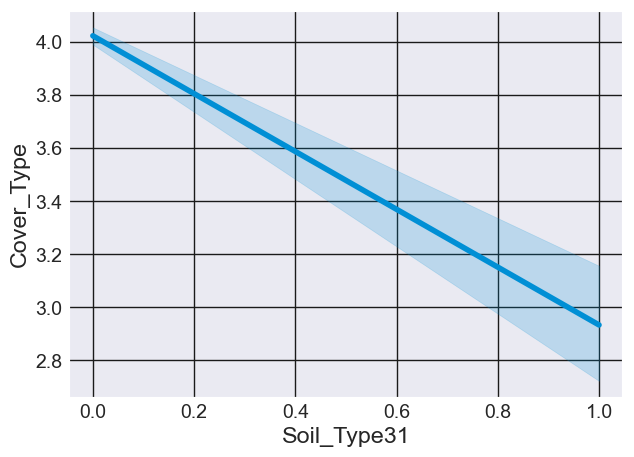

In [234]:
sns.lineplot(x="Soil_Type31", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type32', ylabel='Cover_Type'>

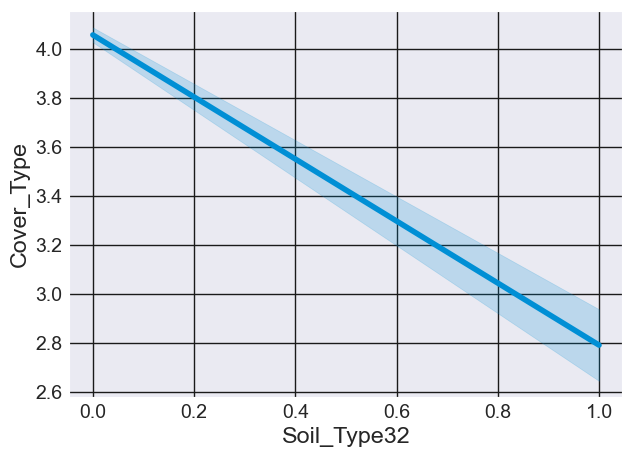

In [235]:
sns.lineplot(x="Soil_Type32", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type33', ylabel='Cover_Type'>

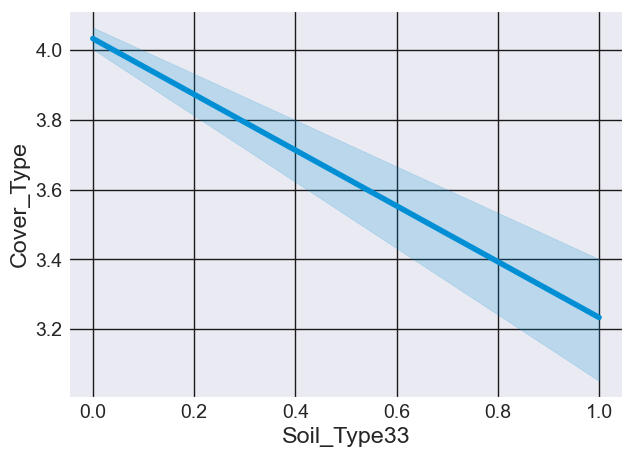

In [236]:
sns.lineplot(x="Soil_Type33", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type34', ylabel='Cover_Type'>

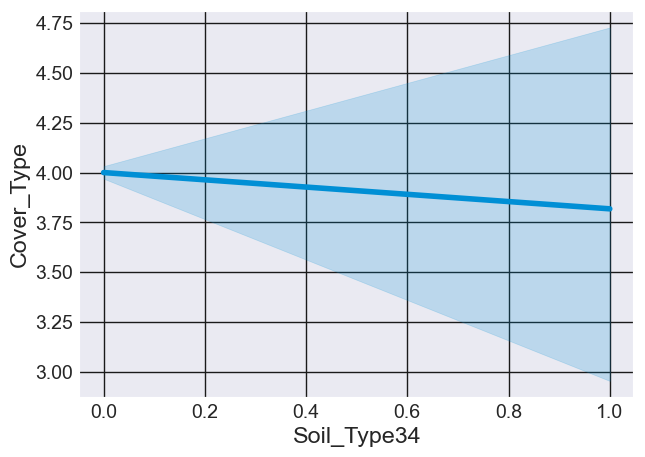

In [237]:
sns.lineplot(x="Soil_Type34", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type35', ylabel='Cover_Type'>

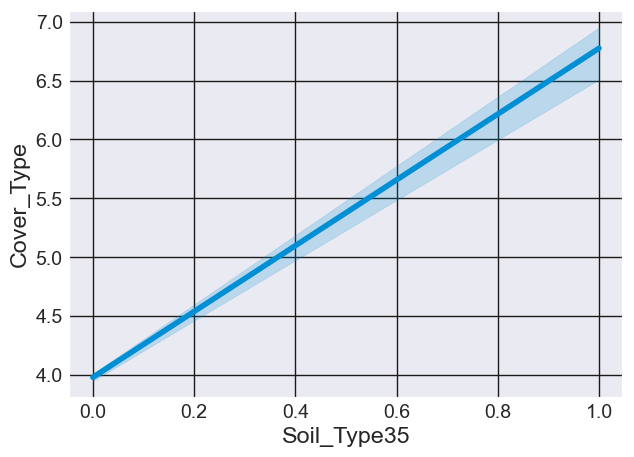

In [238]:
sns.lineplot(x="Soil_Type35", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type36', ylabel='Cover_Type'>

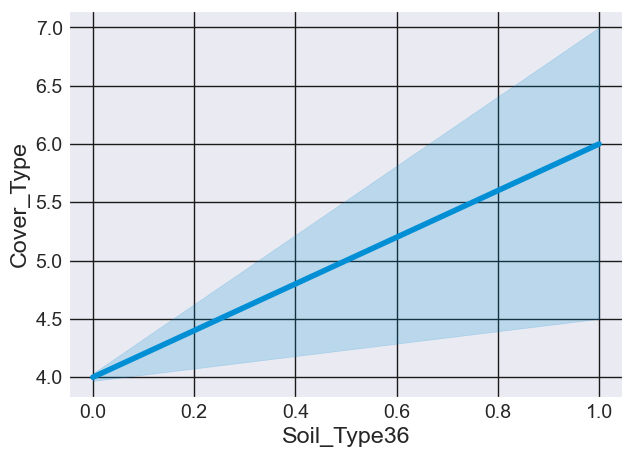

In [239]:
sns.lineplot(x="Soil_Type36", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type37', ylabel='Cover_Type'>

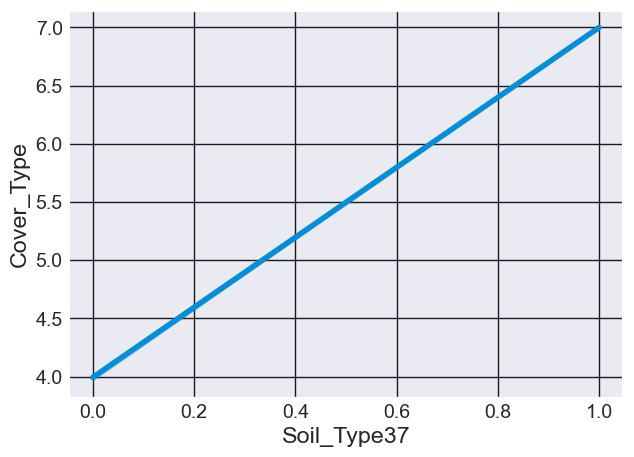

In [240]:
sns.lineplot(x="Soil_Type37", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type38', ylabel='Cover_Type'>

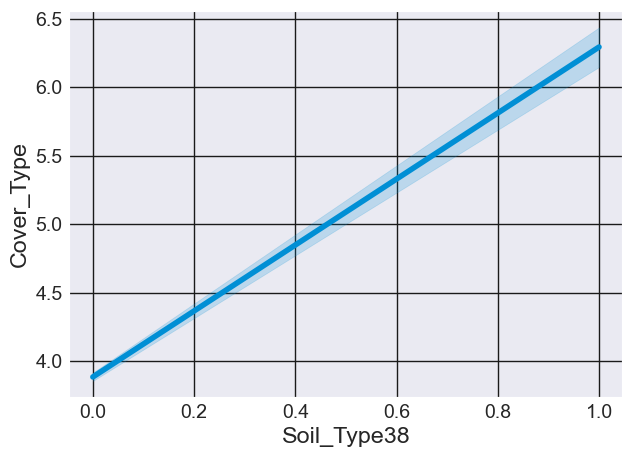

In [241]:
sns.lineplot(x="Soil_Type38", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type39', ylabel='Cover_Type'>

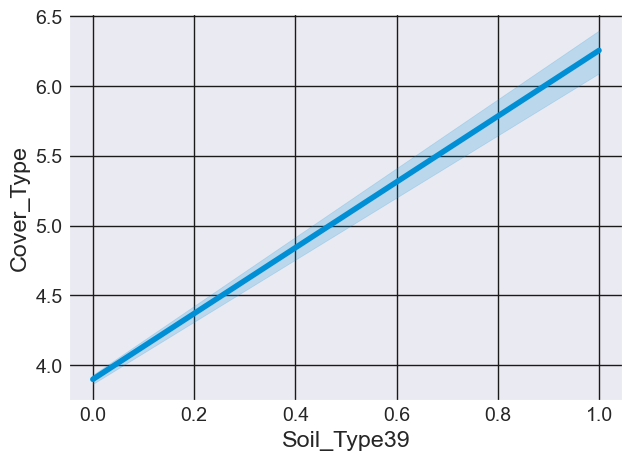

In [242]:
sns.lineplot(x="Soil_Type39", y="Cover_Type", data=forest_data)

<Axes: xlabel='Soil_Type40', ylabel='Cover_Type'>

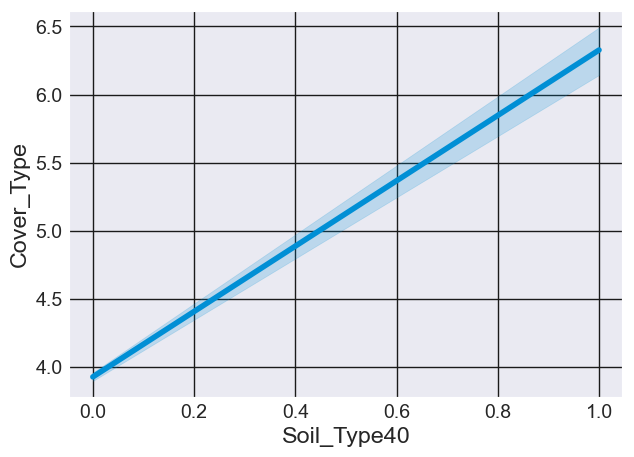

In [243]:
sns.lineplot(x="Soil_Type40", y="Cover_Type", data=forest_data)

<h3>Plotting scatter plots of all features that have correlation greater than 0.5 with each other.

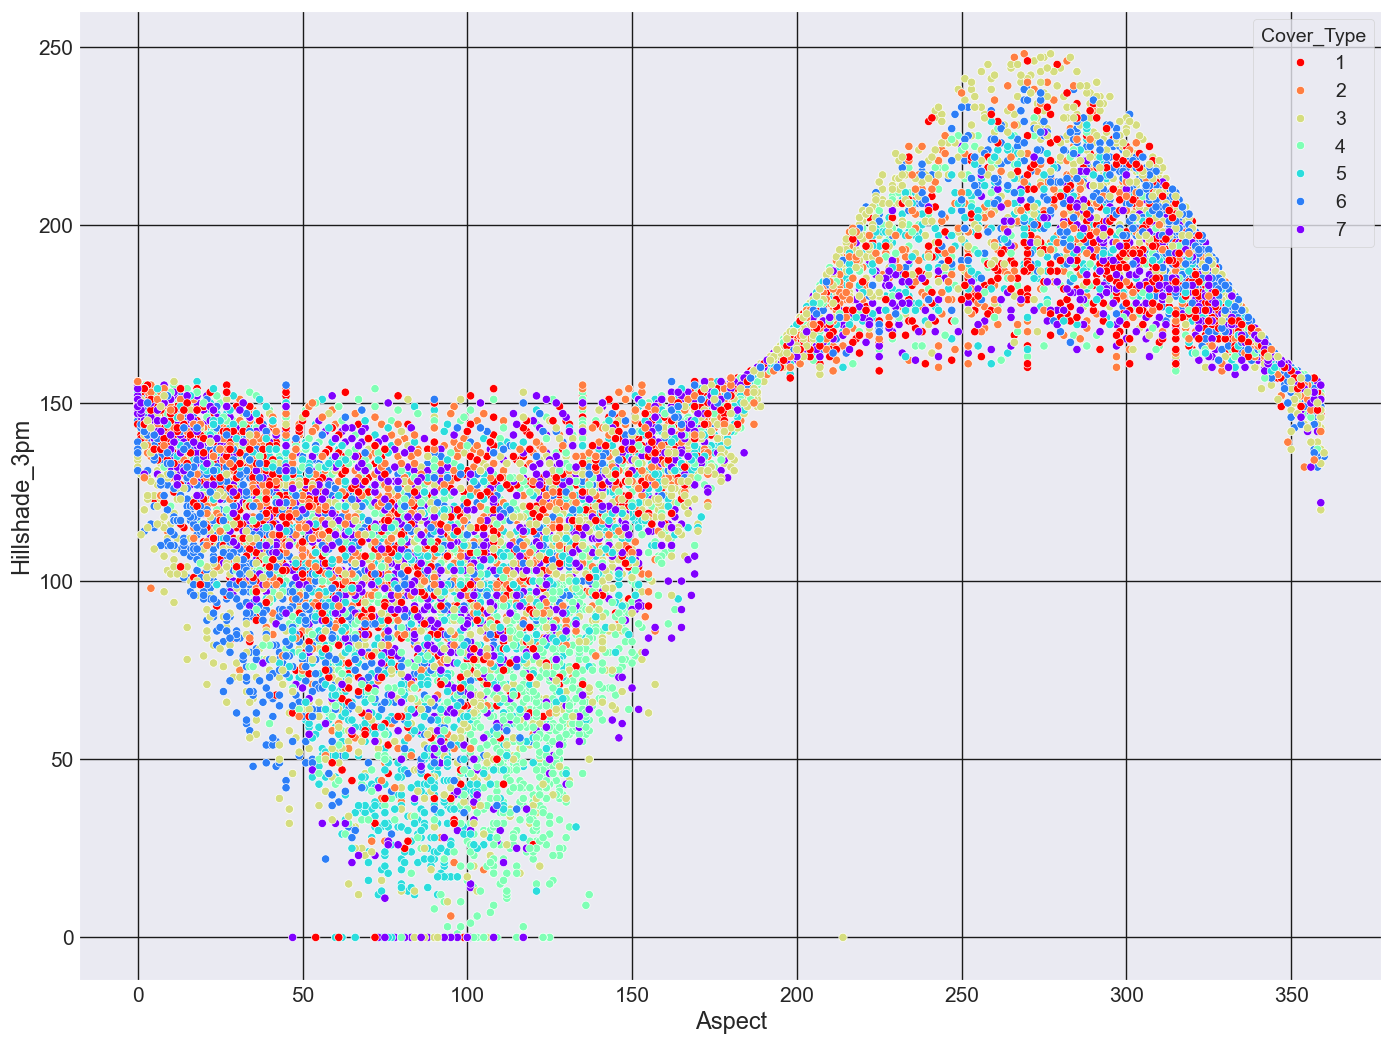

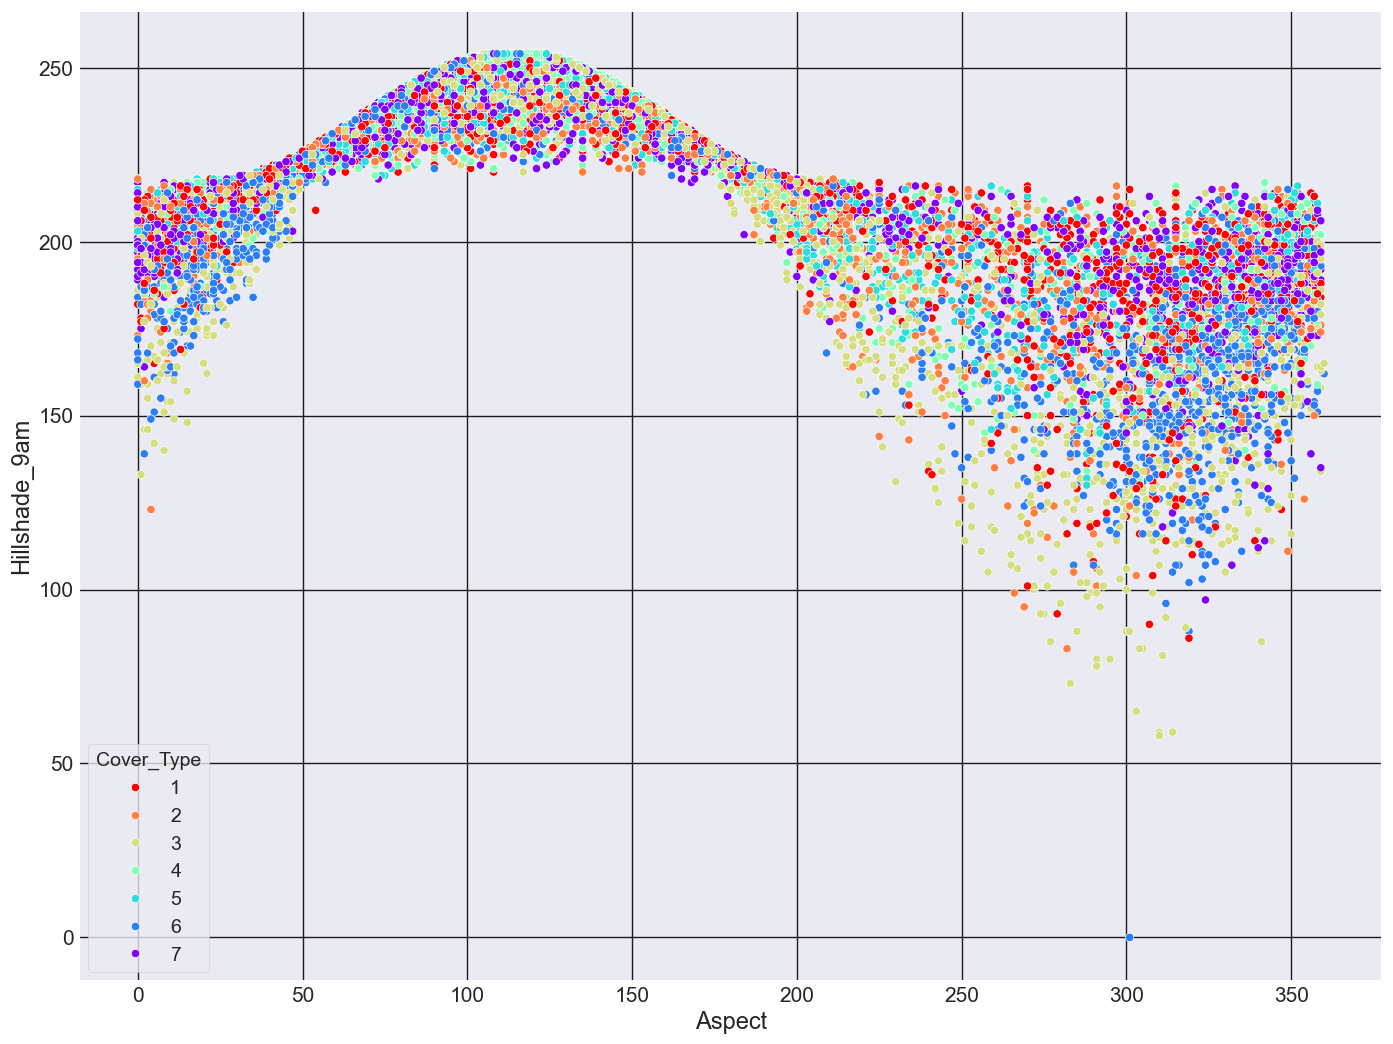

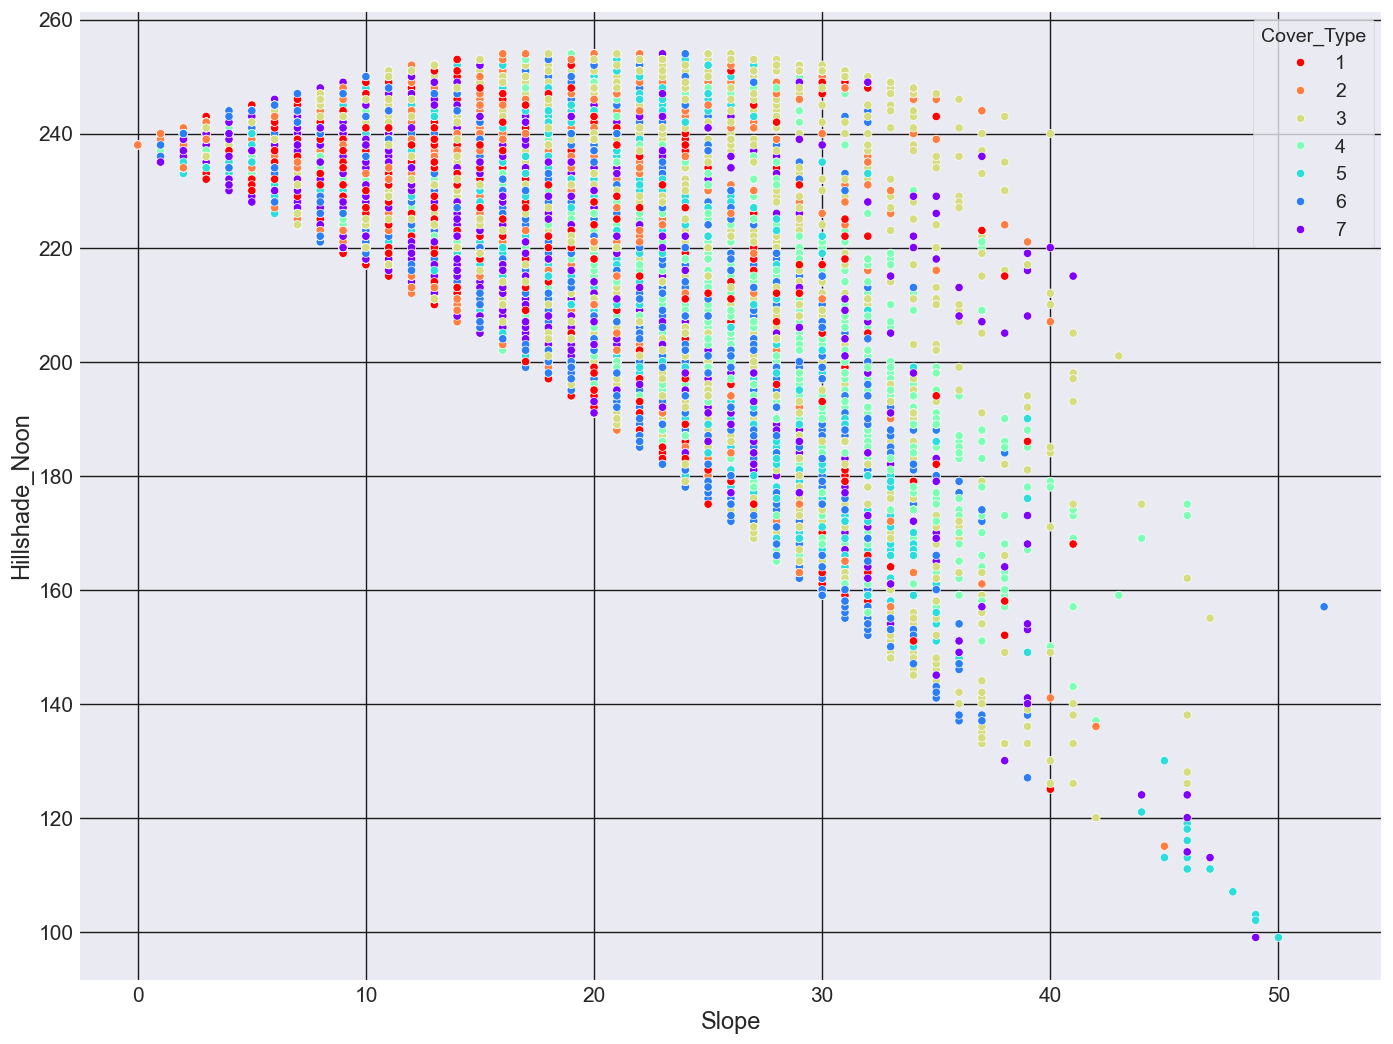

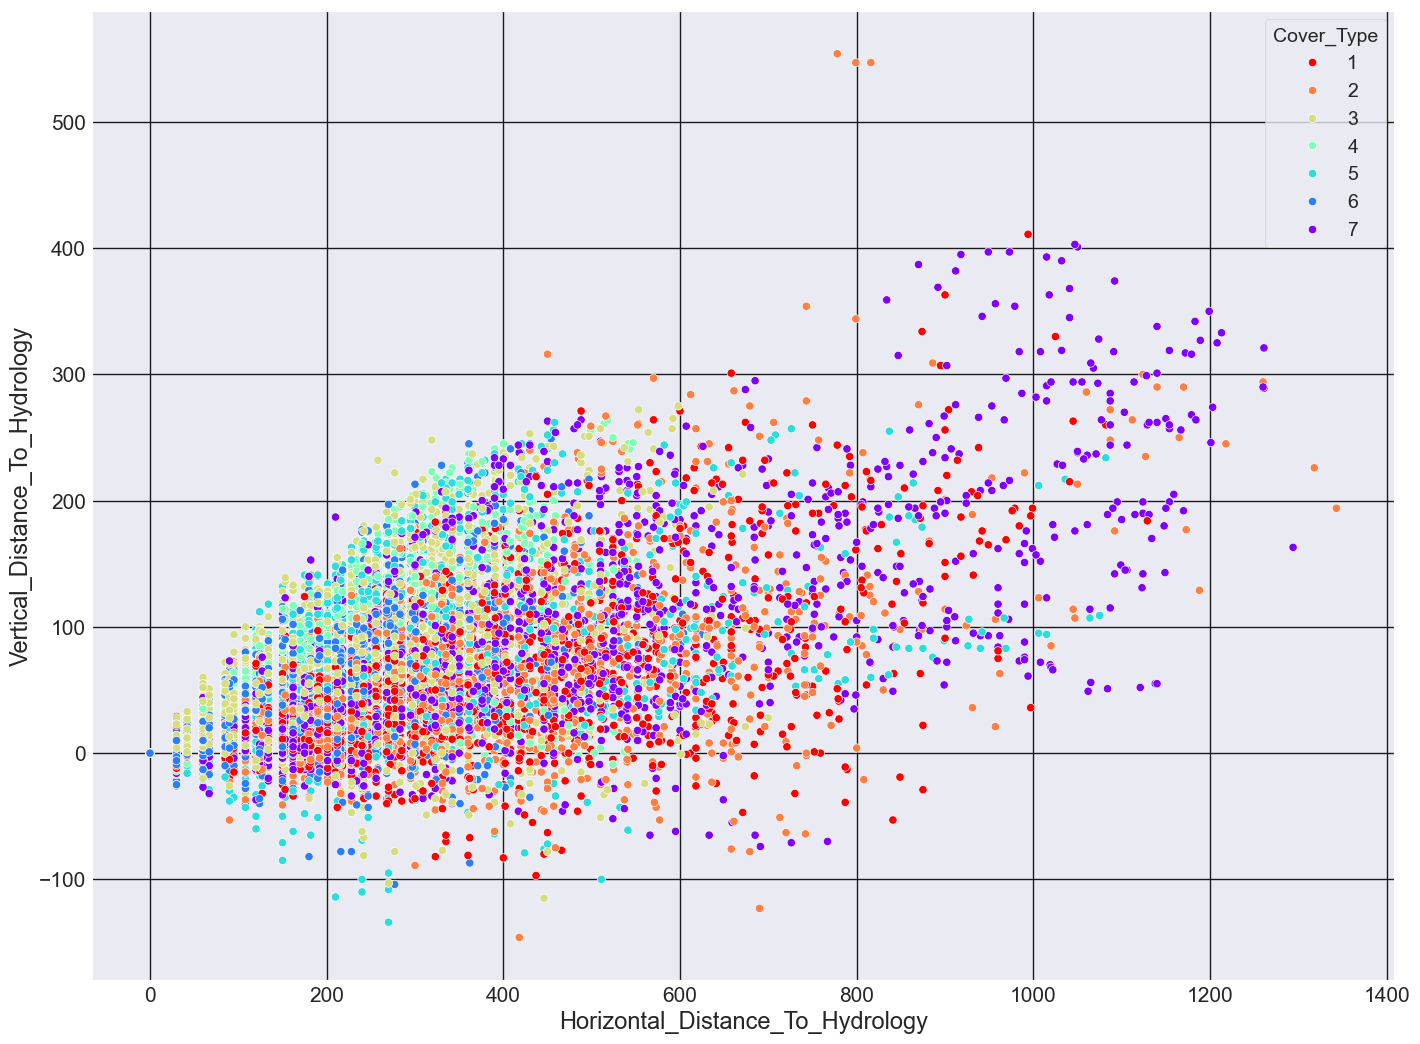

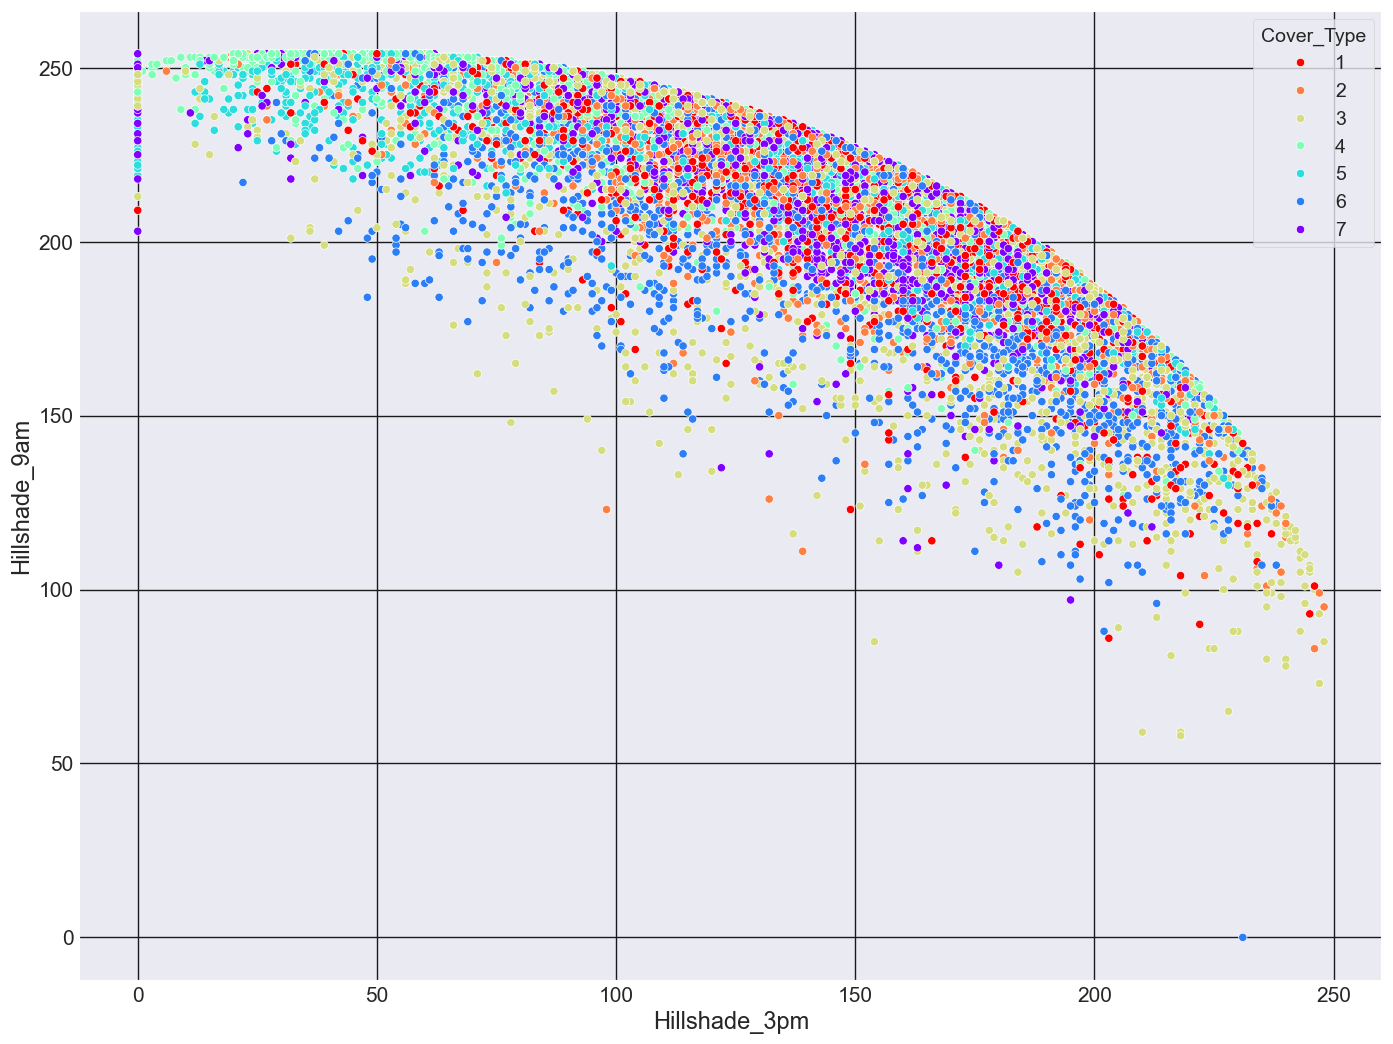

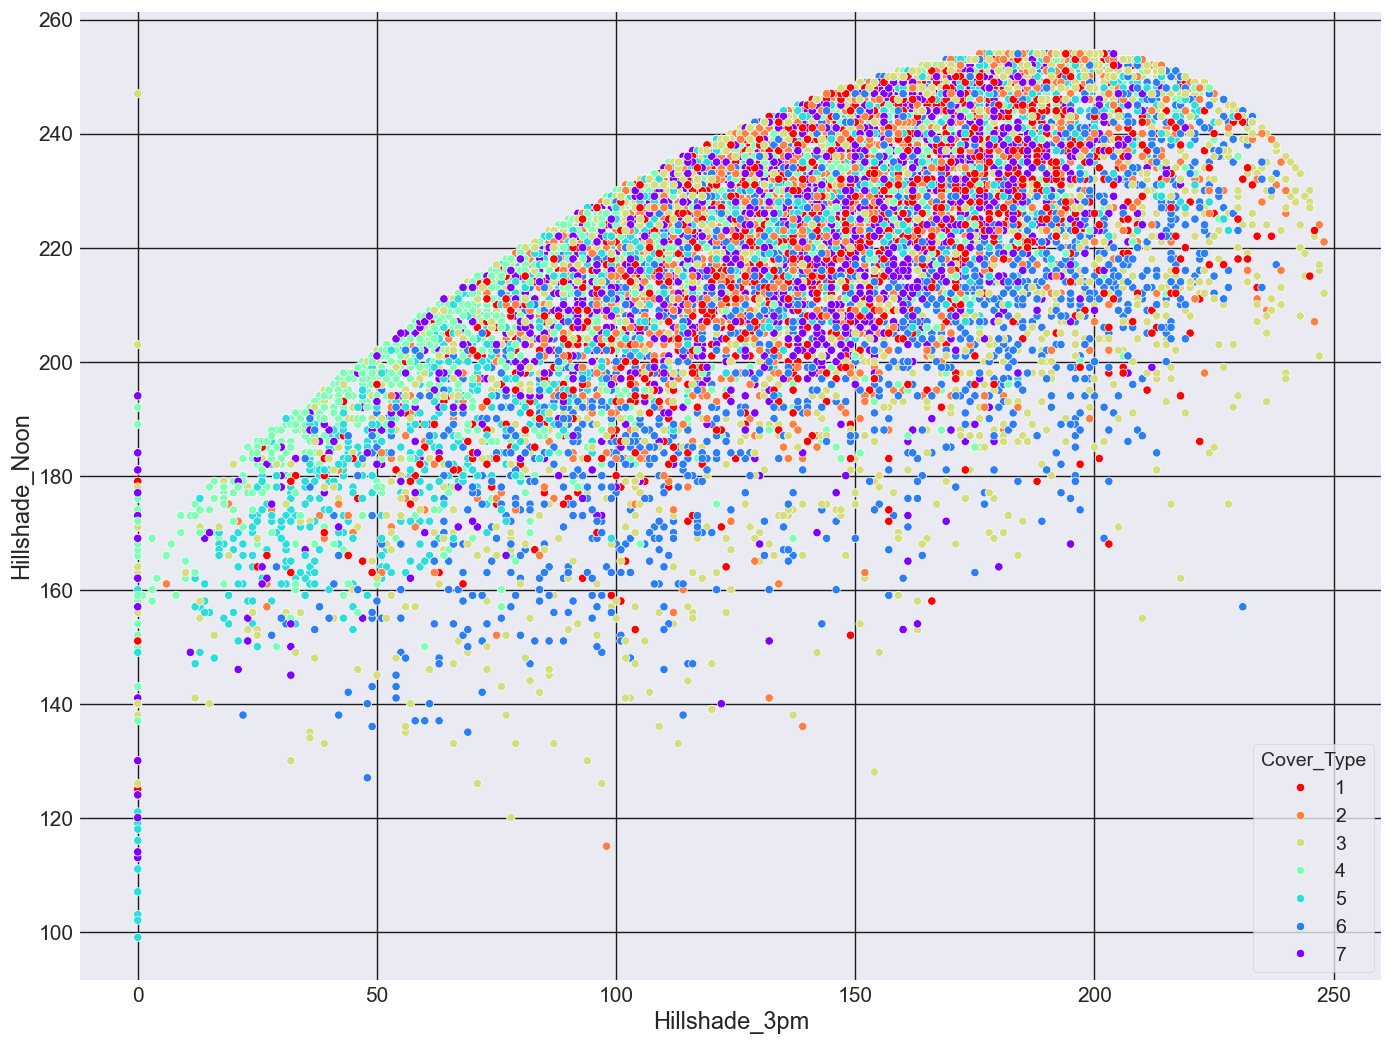

In [244]:
list_data_cor = [['Aspect','Hillshade_3pm'], ['Aspect', 'Hillshade_9am'], ['Slope', 'Hillshade_Noon'], ['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'], 
                 ['Hillshade_3pm', 'Hillshade_9am'], ['Hillshade_3pm', 'Hillshade_Noon']]


# Looping through outer list
# taking 2 features from inner list
for i,j in list_data_cor:
    
    # fig size
    plt.subplots(figsize=(15, 12))
    
    #plot 1 feature on x axis and other on y axis, each point shows which cover forest they belong to
    sns.scatterplot(data = forest_data, x = i, y = j, hue="Cover_Type", legend = 'full', palette='rainbow_r')

    # x-axis label size
    plt.xticks(size = 15)
    # y-axis label size
    plt.yticks(size = 15)

    # Horizontal axis Label
    plt.xlabel(i, size = 17)
    # Vertical axis Label
    plt.ylabel(j, size = 17)
  
    # display plot
    plt.show()

<h3>Correlation for categorical values</h3>

sns.heatmap(categorical.corr())

<img src="1.png">

In [245]:
soil=Soil_data.corr()

In [246]:
soil

Soil_Type1  Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5  \
Soil_Type1     1.000000   -0.032144   -0.040419   -0.037678   -0.016287   
Soil_Type2    -0.032144    1.000000   -0.054037   -0.050373   -0.021775   
Soil_Type3    -0.040419   -0.054037    1.000000   -0.063341   -0.027380   
Soil_Type4    -0.037678   -0.050373   -0.063341    1.000000   -0.025524   
Soil_Type5    -0.016287   -0.021775   -0.027380   -0.025524    1.000000   
Soil_Type6    -0.032864   -0.043937   -0.055247   -0.051501   -0.022262   
Soil_Type7          NaN         NaN         NaN         NaN         NaN   
Soil_Type8    -0.001261   -0.001686   -0.002120   -0.001976   -0.000854   
Soil_Type9    -0.003989   -0.005333   -0.006706   -0.006251   -0.002702   
Soil_Type10   -0.062995   -0.084219   -0.105899   -0.098719   -0.042673   
Soil_Type11   -0.025757   -0.034435   -0.043300   -0.040364   -0.017448   
Soil_Type12   -0.019143   -0.025593   -0.032182   -0.030000   -0.012968   
Soil_Type13   -0.027956   -0.037375   -0.046996   -0.043810   -0.018937   
Soil_Type14   -0.016486   -0.022040   -0.027714   -0.025835   -0.011168   
Soil_Type15         NaN         NaN         NaN         NaN         NaN   
Soil_Type16   -0.013515   -0.018069   -0.022720   -0.021179   -0.009155   
Soil_Type17   -0.031847   -0.042577   -0.053538   -0.049908   -0.021574   
Soil_Type18   -0.009787   -0.013085   -0.016453   -0.015338   -0.006630   
Soil_Type19   -0.008566   -0.011452   -0.014400   -0.013423   -0.005802   
Soil_Type20   -0.014936   -0.019968   -0.025109   -0.023406   -0.010118   
Soil_Type21   -0.005047   -0.006747   -0.008484   -0.007909   -0.003419   
Soil_Type22   -0.023694   -0.031677   -0.039832   -0.037131   -0.016051   
Soil_Type23   -0.035598   -0.047592   -0.059843   -0.055785   -0.024114   
Soil_Type24   -0.020390   -0.027260   -0.034277   -0.031953   -0.013812   
Soil_Type25   -0.001261   -0.001686   -0.002120   -0.001976   -0.000854   
Soil_Type26   -0.009283   -0.012411   -0.015606   -0.014548   -0.006288   
Soil_Type27   -0.004886   -0.006533   -0.008214   -0.007657   -0.003310   
Soil_Type28   -0.003784   -0.005059   -0.006362   -0.005930   -0.002563   
Soil_Type29   -0.047377   -0.063339   -0.079644   -0.074244   -0.032093   
Soil_Type30   -0.034799   -0.046523   -0.058499   -0.054533   -0.023573   
Soil_Type31   -0.023233   -0.031061   -0.039057   -0.036409   -0.015738   
Soil_Type32   -0.033907   -0.045331   -0.057000   -0.053136   -0.022969   
Soil_Type33   -0.031955   -0.042722   -0.053720   -0.050077   -0.021647   
Soil_Type34   -0.005919   -0.007913   -0.009950   -0.009276   -0.004010   
Soil_Type35   -0.012779   -0.017084   -0.021482   -0.020026   -0.008657   
Soil_Type36   -0.003989   -0.005333   -0.006706   -0.006251   -0.002702   
Soil_Type37   -0.007361   -0.009841   -0.012375   -0.011536   -0.004987   
Soil_Type38   -0.034874   -0.046624   -0.058626   -0.054651   -0.023624   
Soil_Type39   -0.033048   -0.044183   -0.055557   -0.051790   -0.022387   
Soil_Type40   -0.027436   -0.036680   -0.046122   -0.042995   -0.018585   
Cover_Type     0.015069    0.022627   -0.016393   -0.027816    0.027692   

             Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  Soil_Type10  ...  \
Soil_Type1    -0.032864         NaN   -0.001261   -0.003989    -0.062995  ...   
Soil_Type2    -0.043937         NaN   -0.001686   -0.005333    -0.084219  ...   
Soil_Type3    -0.055247         NaN   -0.002120   -0.006706    -0.105899  ...   
Soil_Type4    -0.051501         NaN   -0.001976   -0.006251    -0.098719  ...   
Soil_Type5    -0.022262         NaN   -0.000854   -0.002702    -0.042673  ...   
Soil_Type6     1.000000         NaN   -0.001724   -0.005452    -0.086105  ...   
Soil_Type7          NaN         NaN         NaN         NaN          NaN  ...   
Soil_Type8    -0.001724         NaN    1.000000   -0.000209    -0.003304  ...   
Soil_Type9    -0.005452         NaN   -0.000209    1.000000    -0.010451  ...   
Soil_Type10   -0.086105         NaN   -0.003304   -0

<b>We also remove Soil_Type 7 and Soil_Type 15 since they have high correlation</b>

In [247]:
trainingSet=forest_data.drop(['Soil_Type7','Soil_Type15'],axis=1)

In [248]:
trainingSet

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          1       2596      51      3                               258   
1          2       2590      56      2                               212   
2          3       2804     139      9                               268   
3          4       2785     155     18                               242   
4          5       2595      45      2                               153   
...      ...        ...     ...    ...                               ...   
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   0                              510   
1                                  -6                              390   
2                                  65                             3180   
3                                 118                             3090   
4                                  -1                              391   
...                               ...                              ...   
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0                221             232            148  ...            0   
1                220             235            151  ...            0   
2                234             238            135  ...            0   
3                238             238            122  ...            0   
4                220             234            150  ...            0   
...              ...             ...            ...  ...          ...   
15115            170             251            214  ...            0   
15116            249             221             91  ...            0   
15117            250             220             83  ...            0   
15118            229             237            119  ...            0   
15119            189             244            164  ...            0   

       Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0                0            0            0            0            0   
1                0            0            0            0            0   
2                0            0            0            0            0   
3                0            0            0            0            0   
4                0            0            0            0            0   
...            ...          ...          ...          ...          ...   
15115            0            0            0            0            0   
15116            0            0            0            0            0   
15117            0            0            0            0            0   
15118            0            0            0            0            0   
15119            0            0            0            0            0   

       Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0                0            0            0           5  
1                0            0            0           5  
2                0            0            0           2  
3                0            0            0           2  
4                0            0            0           5  
...            ...          ...          ...         ...  
15115            0           

<h2>Observation Cleaning</h2>

<h3>Wilderness area</h3>
Checking if any observation have more than 1 presence of Wilderness area at same time or None


In [249]:
more_count = 0
none_count = 0
total = 0
for index, row in Wilderness_data.iterrows():
    total = row.sum(axis=0)
    if total > 1:
        more_count =+ 1
        total = 0
        break
    if total == 0:
        none_count =+ 1
        total = 0
print('No:of observations which shows presence in more than 1 Wilderness Area: ',more_count)
print('No:of observations that shows no presence in any Wilderness Area: ',none_count)

No:of observations which shows presence in more than 1 Wilderness Area:  0
No:of observations that shows no presence in any Wilderness Area:  0


<h3>Soil types</h3>
Checking if any observation have more than 1 presence of Soil Type area at same time or None

In [250]:
more_count = 0
none_count = 0
total = 0
for index, row in Soil_data.iterrows():
    total = row.sum(axis=0)
    if total > 1:
        more_count =+ 1
        total = 0
        break  
    if total == 0:
        none_count =+ 1
        total = 0 
print('No:of observations which shows presence in more than 1 Soil Type Area: ',more_count)
print('No:of observations that shows no presence in any Soil Type Area: ',none_count)

No:of observations which shows presence in more than 1 Soil Type Area:  1
No:of observations that shows no presence in any Soil Type Area:  0


<h2>Handling Missing Values</h2>

In [251]:
forest_data.dropna()
forest_data.shape

(15120, 56)

<b>No Missing Values as we have same number of rows after deleting the missing values.</b>

<h2>Handling Duplicates</h2>

In [252]:
forest_data.drop_duplicates(keep='first')
forest_data.shape

(15120, 56)

In [253]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_memory = df.memory_usage().sum() / 1024**2 
    print(f"Memory usage of dataframe before reduction {start_memory} MB")   
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_memory = df.memory_usage().sum() / 1024**2
    if verbose: 
        print(f"Memory usage of dataframe after reduction {end_memory} MB")
        print(f"Reduced by {100 * (start_memory - end_memory) / start_memory} % ")
    return df

In [254]:
trainData=reduce_mem_usage(trainingSet)

Memory usage of dataframe before reduction 6.229373931884766 MB
Memory usage of dataframe after reduction 0.9229774475097656 MB
Reduced by 85.18346373805645 % 


In [255]:

forest_data=forest_data.dropna()
forest_data=forest_data[0:10000]

In [256]:
forest_data

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0         1       2596      51      3                               258   
1         2       2590      56      2                               212   
2         3       2804     139      9                               268   
3         4       2785     155     18                               242   
4         5       2595      45      2                               153   
...     ...        ...     ...    ...                               ...   
9995   9996       2845      77     15                               201   
9996   9997       2828      74     18                               150   
9997   9998       3245     309     16                               150   
9998   9999       3245      33     12                               335   
9999  10000       3098      37     22                               467   

      Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                  0                              510   
1                                 -6                              390   
2                                 65                             3180   
3                                118                             3090   
4                                 -1                              391   
...                              ...                              ...   
9995                              86                             1507   
9996                              68                             1556   
9997                              57                              150   
9998                              46                              430   
9999                             174                             2294   

      Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0               221             232            148  ...            0   
1               220             235            151  ...            0   
2               234             238            135  ...            0   
3               238             238            122  ...            0   
4               220             234            150  ...            0   
...             ...             ...            ...  ...          ...   
9995            238             212            101  ...            0   
9996            239             203             89  ...            0   
9997            173             227            194  ...            0   
9998            218             214            131  ...            0   
9999            214             187             99  ...            0   

      Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
9995            1            0            0            0            0   
9996            1            0            0            0            0   
9997            0            0            0            0            0   
9998            0            0            0            0            0   
9999            1            0            0            0            0   

      Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0               0            0            0           5  
1               0            0            0           5  
2               0            0            0           2  
3               0            0            0           2  
4               0            0            0           5  
...           ...          ...          ...         ...  
9995            0            0            0           5  
9996            0        

In [257]:
sample = forest_data[['Elevation','Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Aspect','Wilderness_Area4',
            'Hillshade_Noon','Hillshade_3pm','Hillshade_9am','Slope','Soil_Type22','Soil_Type10','Soil_Type4','Soil_Type34','Soil_Type34','Wilderness_Area3','Soil_Type12',
            'Soil_Type2','Wilderness_Area1', 'Cover_Type']]

In [258]:
sample

Elevation  Horizontal_Distance_To_Roadways  \
0          2596                              510   
1          2590                              390   
2          2804                             3180   
3          2785                             3090   
4          2595                              391   
...         ...                              ...   
9995       2845                             1507   
9996       2828                             1556   
9997       3245                              150   
9998       3245                              430   
9999       3098                             2294   

      Horizontal_Distance_To_Fire_Points  Horizontal_Distance_To_Hydrology  \
0                                   6279                               258   
1                                   6225                               212   
2                                   6121                               268   
3                                   6211                               242   
4                                   6172                               153   
...                                  ...                               ...   
9995                                1451                               201   
9996                                1460                               150   
9997                                1557                               150   
9998                                1298                               335   
9999                                2290                               467   

      Vertical_Distance_To_Hydrology  Aspect  Wilderness_Area4  \
0                                  0      51                 0   
1                                 -6      56                 0   
2                                 65     139                 0   
3                                118     155                 0   
4                                 -1      45                 0   
...                              ...     ...               ...   
9995                              86      77                 0   
9996                              68      74                 0   
9997                              57     309                 0   
9998                              46      33                 0   
9999                             174      37                 0   

      Hillshade_Noon  Hillshade_3pm  Hillshade_9am  ...  Soil_Type22  \
0                232            148            221  ...            0   
1                235            151            220  ...            0   
2                238            135            234  ...            0   
3                238            122            238  ...            0   
4                234            150            220  ...            0   
...              ...            ...            ...  ...          ...   
9995             212            101            238  ...            0   
9996             203             89            239  ...            0   
9997             227            194            173  ...            0   
9998             214            131            218  ...            0   
9999             187             99            214  ...            0   

      Soil_Type10  Soil_Type4  Soil_Type34  Soil_Type34  Wilderness_Area3  \
0               0           0            0            0                 0   
1               0           0            0            0                 0   
2               0           0            0            0                 0   
3               0           0            0            0                 0   
4               0           0            0            0                 0   
...           ...         ...          ...          ...               ...   
9995            0           0            0            0                 1   
9996            0           0            0            0                 1   
9997            0           0            0            0                 0   
9998            

<h2>Feature scaling</h2>

In [259]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
X = sample.iloc[:,:-1]
y = sample['Cover_Type']
X_scaled = scaler.fit_transform(X)

In [260]:
X_scaled

array([[0.36908359, 0.07402032, 0.91587278, ..., 0.        , 0.        ,
        1.        ],
       [0.36606244, 0.05660377, 0.90795838, ..., 0.        , 0.        ,
        1.        ],
       [0.47381672, 0.46153846, 0.89271581, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.6958711 , 0.02177068, 0.22380185, ..., 0.        , 0.        ,
        0.        ],
       [0.6958711 , 0.06240929, 0.185842  , ..., 0.        , 0.        ,
        0.        ],
       [0.62185297, 0.3329463 , 0.3312326 , ..., 0.        , 0.        ,
        0.        ]])

<h2>Train - Test Split</h2>

In [261]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 53)

In [262]:
print(X_train.shape, X_test.shape)

(7500, 20) (2500, 20)


<h2>Naive Bayes

In [263]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
clf = BernoulliNB()
clf.fit(X_train, y_train)

BernoulliNB()

In [264]:
y_pred3=clf.predict(X_test)

In [265]:
accuracy1=accuracy_score(y_test, y_pred3)

In [266]:
precision1=precision_score(y_test, y_pred3, average="weighted")

In [267]:
recall1=recall_score(y_test,y_pred3,average="weighted")

In [268]:
print("Accuracy: ",accuracy1)
print("Recall: ",recall1)
print("precision: ",precision1)

Accuracy:  0.8092
Recall:  0.6612
precision:  0.6447265509639647


In [269]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print()
print("Classification Report:\n", classification_report(y_test, y_pred3))

Confusion Matrix:
 [[ 49 149   0   0  19   1 117]
 [ 17 197   0   1  11  11 143]
 [  0   0  16 115  43 123   9]
 [  0   0  17 383   0  12   0]
 [  9 137   0   0  58   8 176]
 [  0   0  10  92  30 175  42]
 [ 12 100   0   0   7   0 211]]

Classification Report:
               precision    recall  f1-score   support

           1       0.56      0.15      0.23       335
           2       0.34      0.52      0.41       380
           3       0.37      0.05      0.09       306
           4       0.65      0.93      0.76       412
           5       0.35      0.15      0.21       388
           6       0.53      0.50      0.52       349
           7       0.30      0.64      0.41       330

    accuracy                           0.44      2500
   macro avg       0.44      0.42      0.38      2500
weighted avg       0.45      0.44      0.39      2500



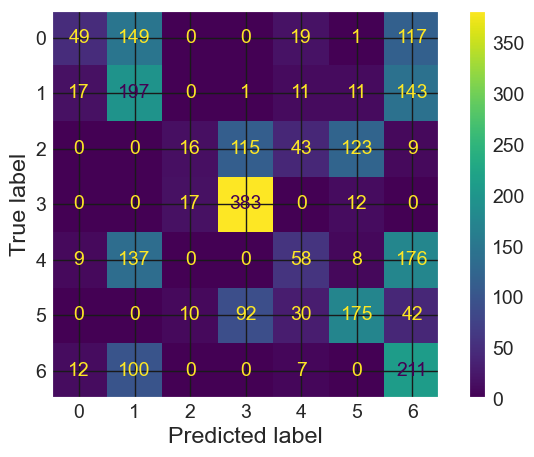

In [270]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test, y_pred3)
ConfusionMatrixDisplay(confusion_matrix).plot()

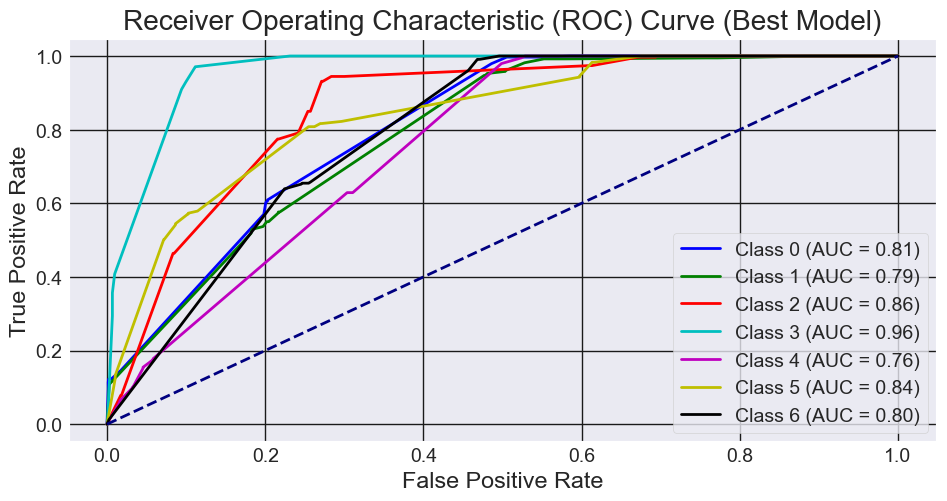

In [271]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the labels for each class
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Calculate ROC curves for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y_test))
probs_best = clf.predict_proba(X_test)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], probs_best[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 5))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k'][:n_classes]
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Best Model)')
plt.legend(loc='lower right')
plt.show()


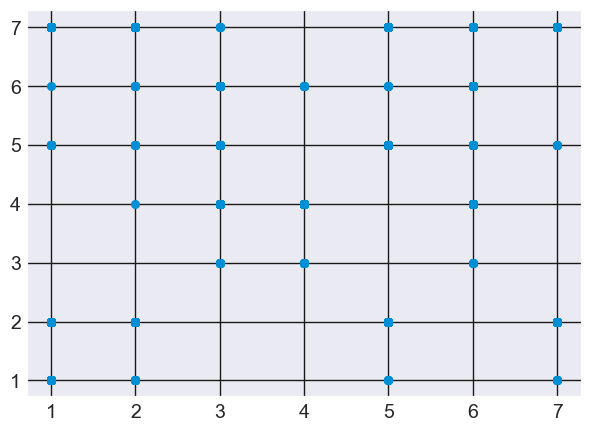

In [272]:
plt.scatter(y_test,y_pred3)

<h2>Perceptron

In [273]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [274]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Assuming you have your X_train, X_test, y_train, and y_test ready
# If not, split your data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'hidden_layer_sizes': [(8,8,8), (16,16,16), (32,32,32)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'max_iter': [500, 1000]
}

# Create the MLPClassifier
mlp = MLPClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predict using the best model
y_pred = best_estimator.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Best parameters: {best_params}')
print(f'Accuracy on test set: {accuracy}')


KeyboardInterrupt: 

In [275]:
mlp = MLPClassifier(hidden_layer_sizes=(32,32,32), activation='tanh', solver='adam', max_iter=1000) # Variations w.r.to parameters can be tried.
mlp.fit(X_train,y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(32, 32, 32), max_iter=1000)

In [276]:
y_predict=mlp.predict(X_test)

In [277]:
accuracy2=accuracy_score(y_test, y_predict)

In [278]:
precision2=precision_score(y_test, y_predict, average="weighted")

In [279]:
recall2=recall_score(y_test,y_predict,average="weighted")

In [280]:
print("Accuracy: ",accuracy2)
print("Recall: ",recall2)
print("precision: ",precision2)

Accuracy:  0.824
Recall:  0.824
precision:  0.8209780030657564


In [281]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict))
print()
print("Classification Report:\n", classification_report(y_test, y_predict))

Confusion Matrix:
 [[244  50   0   0   2   3  36]
 [ 79 253   4   0  37   5   2]
 [  1   1 223  30   4  47   0]
 [  0   0  11 393   0   8   0]
 [  4  25   6   0 347   6   0]
 [  2   2  41  19   5 280   0]
 [ 10   0   0   0   0   0 320]]

Classification Report:
               precision    recall  f1-score   support

           1       0.72      0.73      0.72       335
           2       0.76      0.67      0.71       380
           3       0.78      0.73      0.75       306
           4       0.89      0.95      0.92       412
           5       0.88      0.89      0.89       388
           6       0.80      0.80      0.80       349
           7       0.89      0.97      0.93       330

    accuracy                           0.82      2500
   macro avg       0.82      0.82      0.82      2500
weighted avg       0.82      0.82      0.82      2500



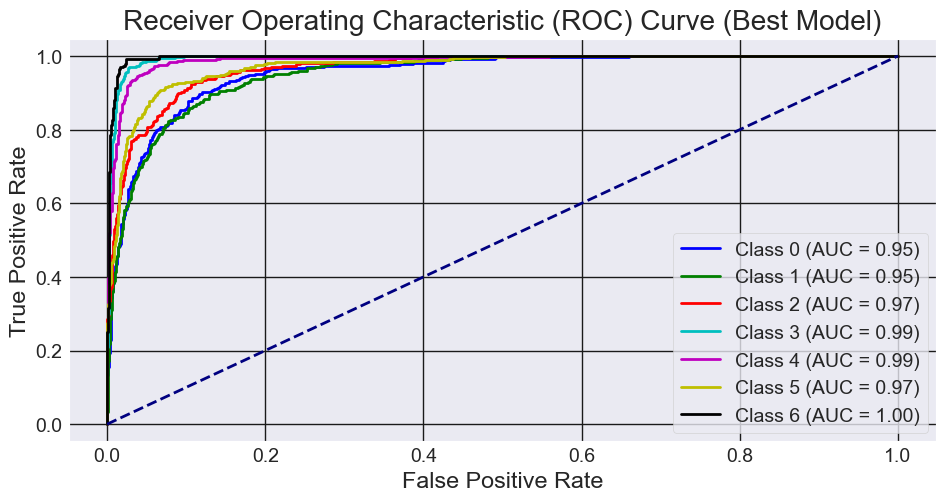

In [282]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the labels for each class
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Calculate ROC curves for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y_test))
probs_best = mlp.predict_proba(X_test)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], probs_best[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 5))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k'][:n_classes]
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Best Model)')
plt.legend(loc='lower right')
plt.show()


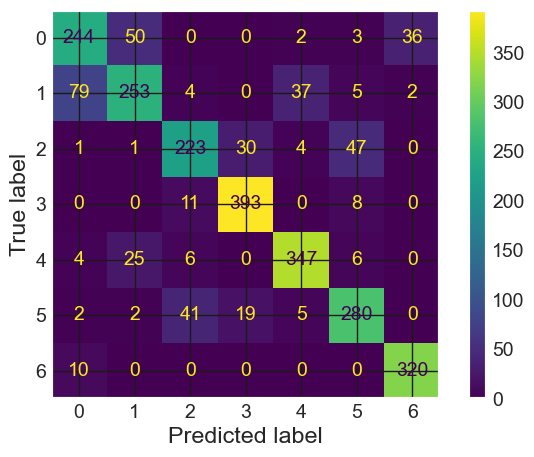

In [283]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test, y_predict)
ConfusionMatrixDisplay(confusion_matrix).plot()

<h1>Comparison

In [291]:
evalTable = pd.DataFrame()

evalTable['Models'] = ['Naive Bayes','MLP Classifier','stacking','bagging','adaboost']
evalTable['Accuracy'] = [accuracy1,accuracy2,0.71,0.88,0.59]
evalTable['Precision Score'] = [precision1,precision2,0.70,0.87,0.5]
evalTable['Recall Score'] =[recall1,recall2,0.71,0.86,0.59]


C:\Users\karth\AppData\Local\Temp\ipykernel_11488\246592502.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=evalTable['Models'], y=evalTable['Accuracy'], palette="rainbow")


Text(0.5, 1.0, 'Accuracy Score of Different Models')

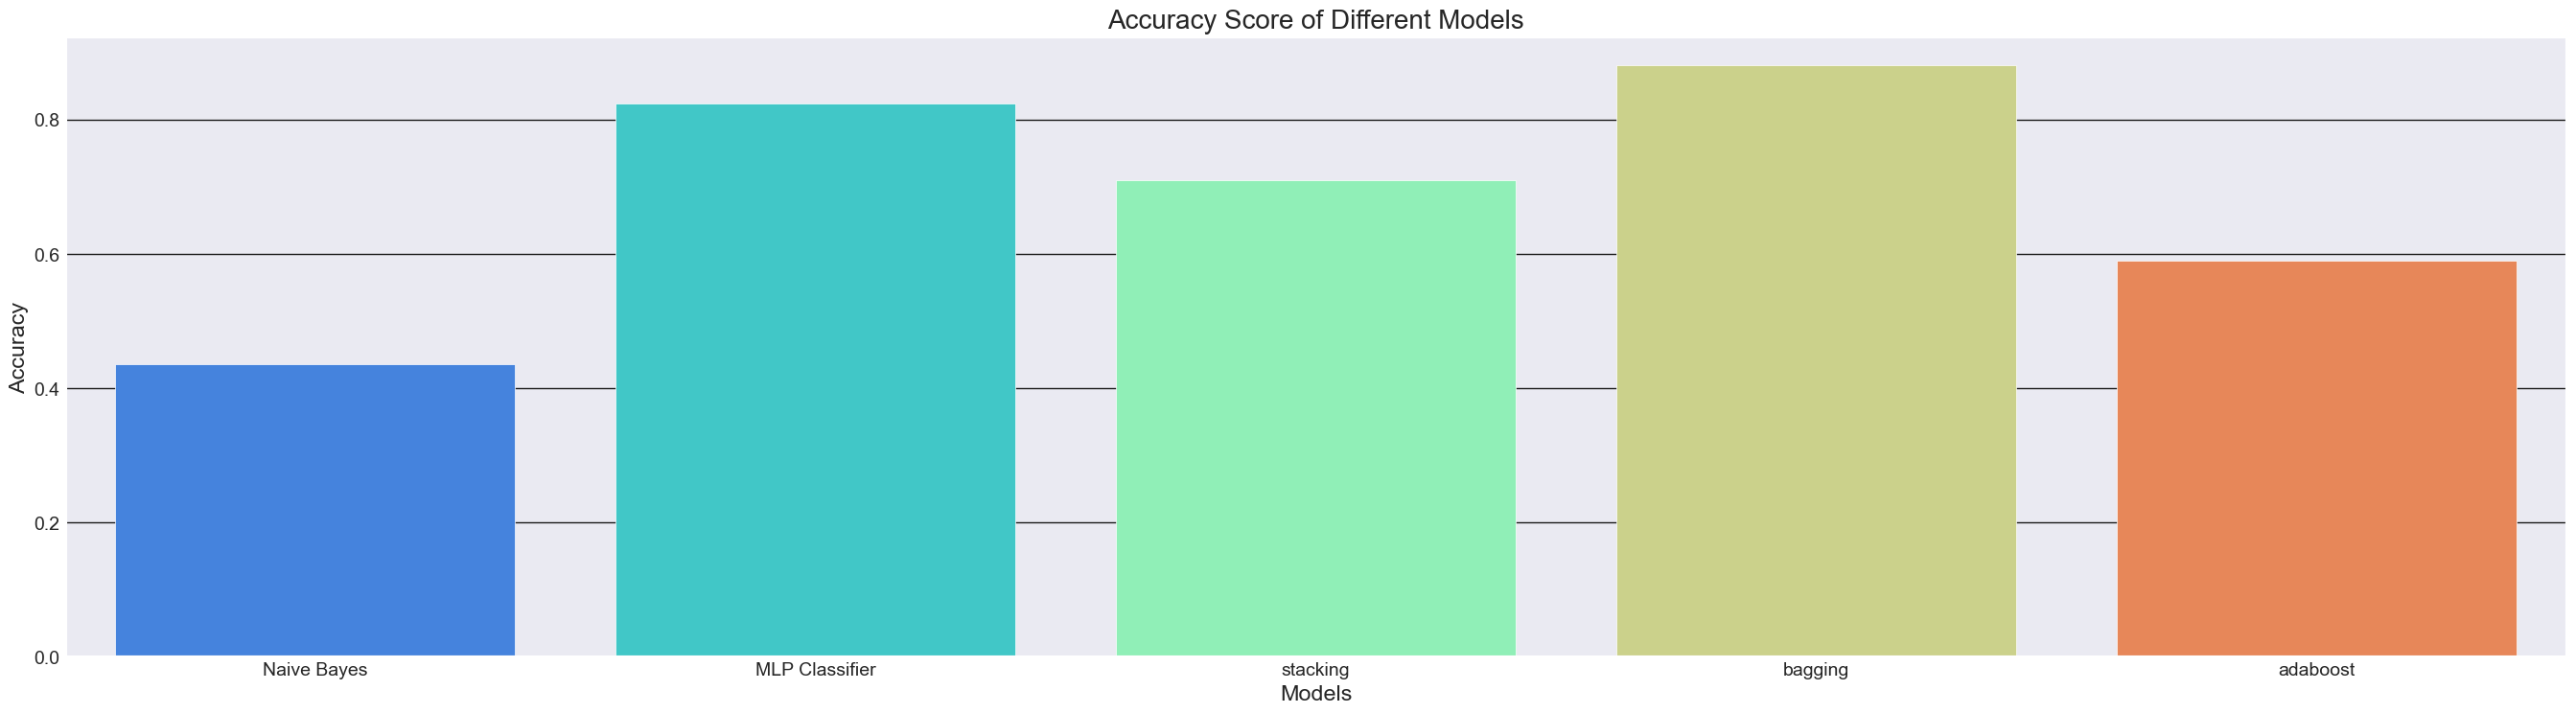

In [292]:
plt.figure(figsize=(30,8))
ax = sns.barplot(x=evalTable['Models'], y=evalTable['Accuracy'], palette="rainbow")
plt.title("Accuracy Score of Different Models", size=20)

Text(0.5, 1.0, 'Pearson Correlation of Features with Numeric Soil_Type')

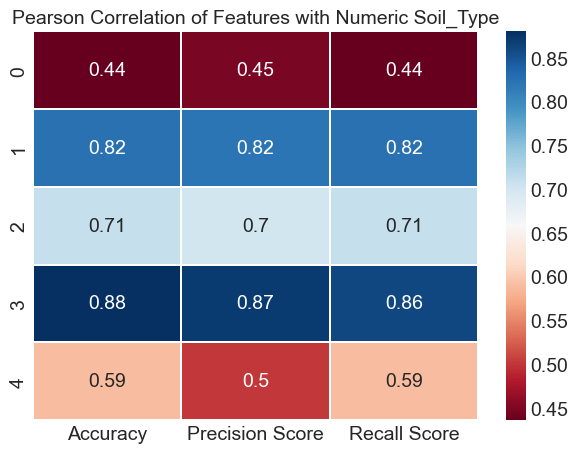

In [293]:
figsize=(16,14)

# plot the heatmap
colormap = plt.cm.RdBu
sns.heatmap(evalTable[['Accuracy', 'Precision Score', 'Recall Score']],linewidths=0.1, 
            square=False, cmap=colormap, linecolor='white', annot=True)
plt.title('Pearson Correlation of Features with Numeric Soil_Type', size=14)

<Axes: >

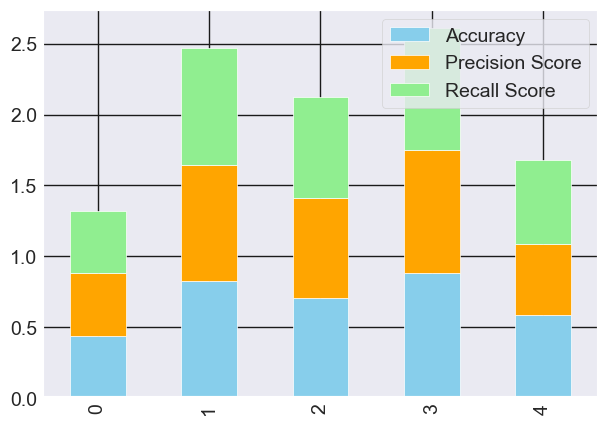

In [294]:
arr = evalTable['Models'].squeeze()
evalTable.plot(kind='bar', stacked=True, color=['skyblue', 'orange', 'lightgreen', 'pink'])